In [17]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn
import os
import numpy as np
from random import randrange
from scipy.optimize import curve_fit
from scipy.optimize import OptimizeWarning
from scipy.stats import chi2
import warnings
import sys
import colorcet as cc

sys.path.append(os.path.join(os.path.dirname(
    os.path.abspath(''))))
import common.plots as plots
import decomposition
import potential_data
import scaler
import potential_analyze
import fit

warnings.simplefilter("ignore", OptimizeWarning)
warnings.simplefilter("ignore", RuntimeWarning)

     space_size  time_size  potential       err
0             1          2   0.393207  0.000002
1             1          3   0.392943  0.000003
2             1          4   0.392860  0.000004
3             1          5   0.392829  0.000005
4             1          6   0.392815  0.000007
..          ...        ...        ...       ...
283          18         13   3.488232  1.303785
284          18         14  -2.707239  1.512804
285          18         15   3.022848  0.988983
286          18         16  -3.081524  0.961848
287          18         17   1.184027  3.657641

[288 rows x 4 columns]


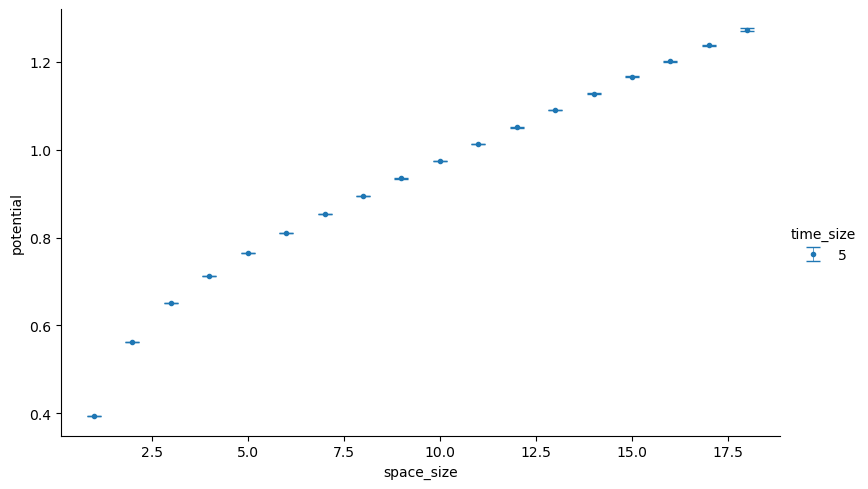

In [25]:
df = pd.read_csv('../../result/potential_gevp/fundamental/on-axis/su3/gluodynamics/36^4/beta6.1/original/HYP0_alpha=1_1_0.5_APE_alpha=0.6/potential.csv')
print(df)
# df = df[df['space_size'] == 16]
df = df[df['time_size'] == 5]
fg = seaborn.FacetGrid(data=df, hue='time_size', height=5,
                           aspect=1.6, legend_out=True)
fg.map(plt.errorbar, 'space_size', 'potential', 'err', mfc=None, fmt='o', ms=3, capsize=5, lw=0.5, ls=None).add_legend()

    space_size  time_size  potential
0            1          3   0.052453
1            1          4   0.052292
2            1          5   0.052230
3            1          6   0.052206
4            1          7   0.052190
5            2          3   0.117841
6            2          4   0.117202
7            2          5   0.116915
8            2          6   0.116776
9            2          7   0.116690
10           3          3   0.209567
11           3          4   0.208039
12           3          5   0.207234
13           3          6   0.206811
14           3          7   0.206513
15           4          3   0.281504
16           4          4   0.278875
17           4          5   0.277348
18           4          6   0.276470
19           4          7   0.275856
20           5          3   0.345403
21           5          4   0.341579
22           5          5   0.339210
23           5          6   0.337641
24           5          7   0.336561
25           6          3   0.404981
2

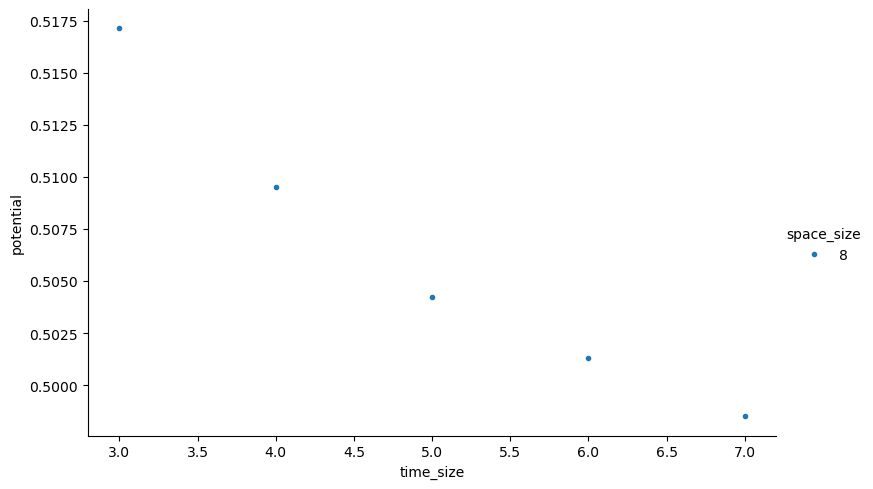

In [26]:
df = pd.read_csv('../../result/potential_gevp/wilson_loop/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv')
print(df)
df = df[df['space_size'] == 8]
fg = seaborn.FacetGrid(data=df, hue='space_size', height=5,
                           aspect=1.6, legend_out=True)
fg.map(plt.errorbar, 'time_size', 'potential', mfc=None, fmt='o', ms=3, capsize=5, lw=0.5, ls=None).add_legend()

          copy  smearing_step  r/a   T     aV(r)       err
beta                                                      
beta=6.0     1              0   15   1  0.079031  0.000122
beta=6.0     1              0   15   2  0.094230  0.000151
beta=6.0     1              0   15   3  0.104697  0.000173
beta=6.0     1              0   15   4  0.112688  0.000193
beta=6.0     1              0   15   5  0.119062  0.000211
...        ...            ...  ...  ..       ...       ...
beta=6.0     1             91   15  21  0.160110  0.006419
beta=6.0     1             91   15  22  0.156024  0.007779
beta=6.0     1             91   15  23  0.159772  0.009070
beta=6.0     1             91   15  24  0.145193  0.010168
beta=6.0     1             91   15  25  0.175643  0.011994

[275 rows x 6 columns]


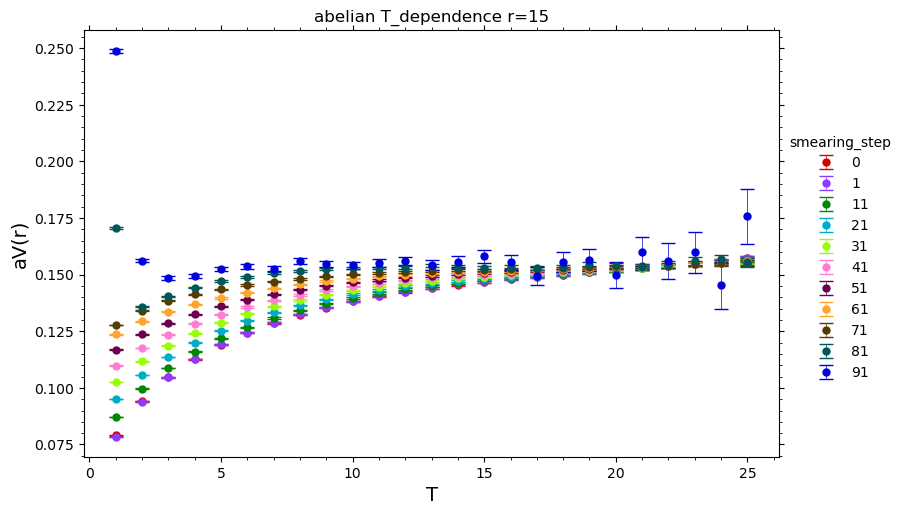

In [2]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/40^4/beta6.4/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.0'}, 'constraints': {'r/a': (15, 15), 'T': (1, 25), 'smearing_step': (0, 91), 'copy': (1, 1)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence'
image_name = f'potential_abelian_smearing'
data = potential_data.get_potantial_df(paths)
print(data)
# data = data[data['smearing_step'] == 30]
for r in data['r/a'].unique():
    plots.make_plot(data[data['r/a'] == r], coordinate, 'aV(r)', hue, 'T', 'aV(r)', f'abelian T_dependence r={r}', image_path, f'potential_abelian_smearing_r={r}', show_plot, err='err', color_palette=cc.glasbey)

          copy  smearing_step  r/a   T     aV(r)       err
beta                                                      
beta=6.0     1              0    6   1  0.138200  0.000068
beta=6.0     1              0    6   2  0.149875  0.000079
beta=6.0     1              0    6   3  0.158113  0.000089
beta=6.0     1              0    6   4  0.164493  0.000097
beta=6.0     1              0    6   5  0.169350  0.000104
...        ...            ...  ...  ..       ...       ...
beta=6.0     1             71    6  16  0.183602  0.000405
beta=6.0     1             71    6  17  0.183814  0.000458
beta=6.0     1             71    6  18  0.184291  0.000504
beta=6.0     1             71    6  19  0.184091  0.000594
beta=6.0     1             71    6  20  0.184229  0.000676

[180 rows x 6 columns]


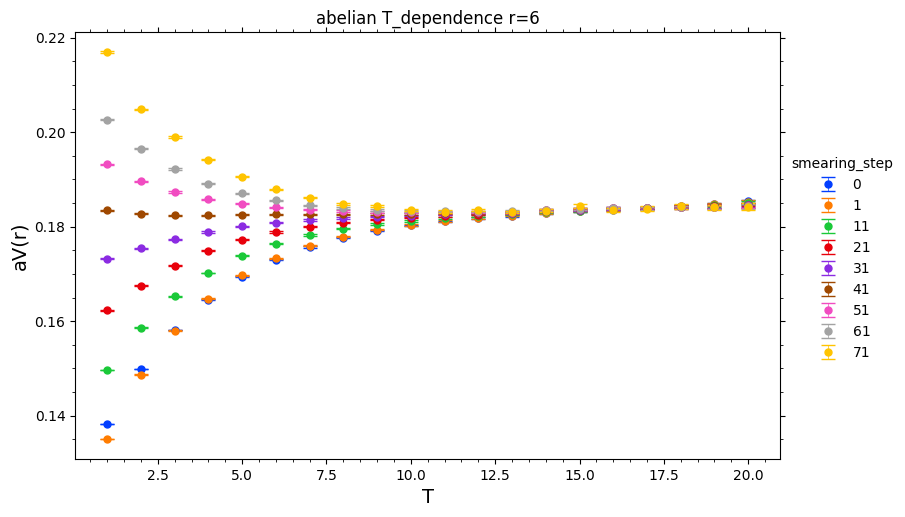

In [3]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.0'}, 'constraints': {'r/a': (6, 6), 'T': (1, 20), 'smearing_step': (0, 71), 'copy': (1, 1)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/32^4/beta6.0/T_dependence'
image_name = f'potential_abelian_smearing'
data = potential_data.get_potantial_df(paths)
print(data)
# data = data[data['smearing_step'] == 30]
for r in data['r/a'].unique():
    plots.make_plot(data[data['r/a'] == r], coordinate, 'aV(r)', hue, 'T', 'aV(r)', f'abelian T_dependence r={r}', image_path, f'potential_abelian_smearing_r={r}', show_plot, err='err')

          copy  smearing_step  r/a   T     aV(r)       err
beta                                                      
beta=6.0     1              0    1   1  0.016029  0.000046
beta=6.0     1              0    1   2  0.017224  0.000050
beta=6.0     1              0    1   3  0.017800  0.000052
beta=6.0     1              0    1   4  0.018152  0.000054
beta=6.0     1              0    1   5  0.018385  0.000054
...        ...            ...  ...  ..       ...       ...
beta=6.0     1             71    1  10  0.019125  0.000943
beta=6.0     1             71    1  11  0.018252  0.000898
beta=6.0     1             71    1  12  0.019474  0.000909
beta=6.0     1             71    1  13  0.016294  0.000916
beta=6.0     1             71    1  14  0.020054  0.000914

[126 rows x 6 columns]


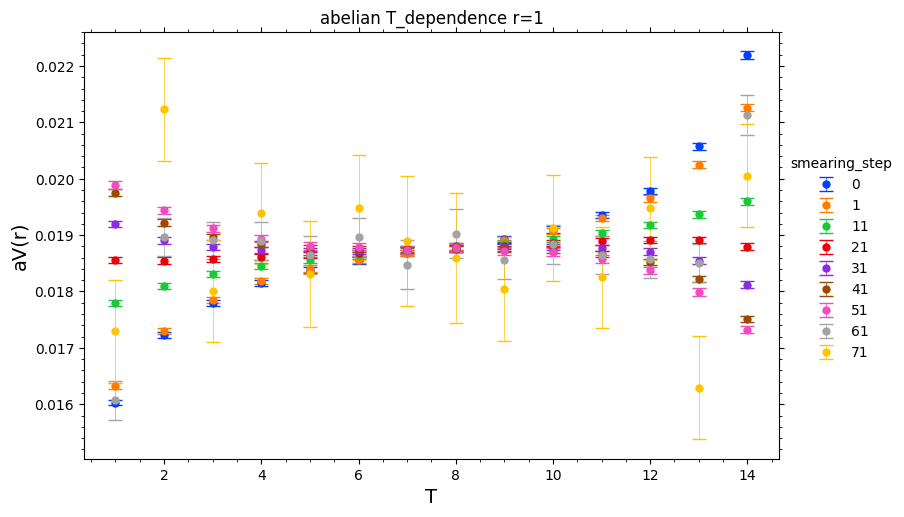

In [4]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.0'}, 'constraints': {'r/a': (1, 1), 'T': (1, 14), 'smearing_step': (0, 71), 'copy': (1, 1)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/16^4/beta6.0/T_dependence'
image_name = f'potential_abelian_smearing'
data = potential_data.get_potantial_df(paths)
print(data)
# data = data[data['smearing_step'] == 30]
for r in data['r/a'].unique():
    plots.make_plot(data[data['r/a'] == r], coordinate, 'aV(r)', hue, 'T', 'aV(r)', f'abelian T_dependence r={r}', image_path, f'potential_abelian_smearing_r={r}', show_plot, err='err')

          smearing_step  r/a  copy   T     aV(r)       err
beta                                                      
beta=6.0              0   12     1   1  1.099761  0.000353
beta=6.0              0   12     1   2  0.835077  0.000574
beta=6.0              0   12     1   3  0.762094  0.001004
beta=6.0              0   12     1   4  0.740977  0.001798
beta=6.0              0   12     1   5  0.734433  0.003524
beta=6.0              0   12     1   6  0.728959  0.006772
beta=6.0              0   12     1   7  0.733165  0.013706
beta=6.0              0   12     1   8  0.699271  0.026986
beta=6.0              0   12     1   9  0.780764  0.057134
beta=6.0              0   12     1  10  0.775371  0.121345
beta=6.0              0   12     1  11  0.566279  0.216985
beta=6.0              1   12     1   1  0.843259  0.000271
beta=6.0              1   12     1   2  0.768285  0.000361
beta=6.0              1   12     1   3  0.740248  0.000493
beta=6.0              1   12     1   4  0.731454  0.0007

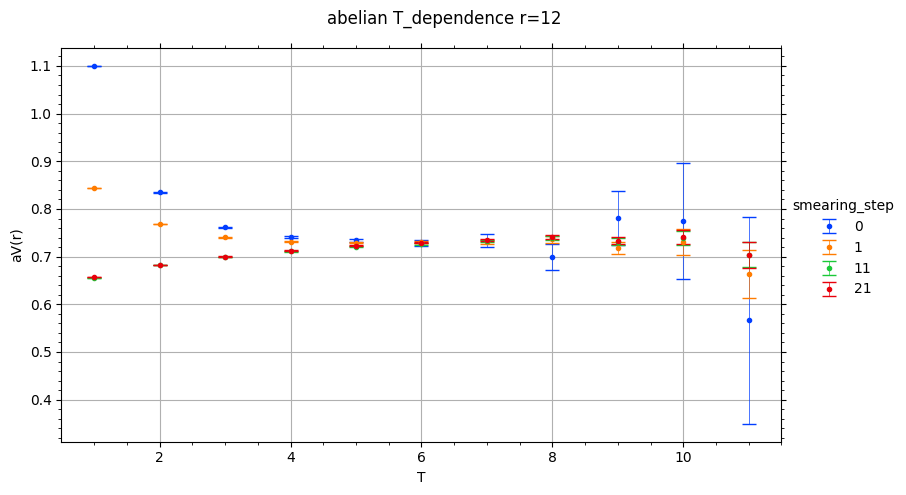

In [17]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_abelian.csv',
          'parameters': {'beta': 'beta=6.0'}, 'constraints': {'r/a': (12, 12), 'T': (1, 11), 'smearing_step': (0, 21), 'copy': (1, 1)}}]
image_path = f'../../images/potential/smearing/su3/gloudynamics/16^4/beta6.0/T_dependence'
image_name = f'potential_abelian_smearing'
data = potential_data.get_potantial_df(paths)
print(data)
# data = data[data['smearing_step'] == 30]
for r in data['r/a'].unique():
    plots.make_plot(data[data['r/a'] == r], coordinate, 'aV(r)', hue, 'T', 'aV(r)', f'abelian T_dependence r={r}', image_path, f'potential_abelian_smearing_r={r}', show_plot, err='err')

          smearing_step  r/a  copy   T     aV(r)       err
beta                                                      
beta=6.0              0   16     1   1  1.408015  0.015701
beta=6.0              0   16     1   2  1.023240  0.038046
beta=6.0              0   16     1   3  0.873570  0.088250
beta=6.0              0   16     1   4  0.735667  0.188871
beta=6.0              0   16     1   5  0.567102  0.363178
beta=6.0              0   16     1   6  0.338761  0.523815
beta=6.0              0   16     1   7  0.195822  0.729331
beta=6.0              0   16     1   8  0.083236  0.740329
beta=6.0              0   16     1   9  0.050804  1.243351
beta=6.0              0   16     1  10  0.012316  0.932228
beta=6.0              0   16     1  11  0.021473  0.027366
beta=6.0              0   16     1  12 -0.033846  0.037762
beta=6.0              0   16     1  13  0.020963  3.825164
beta=6.0              0   16     1  14 -0.017332  3.631684
beta=6.0              0   16     1  15  0.019982  0.0260

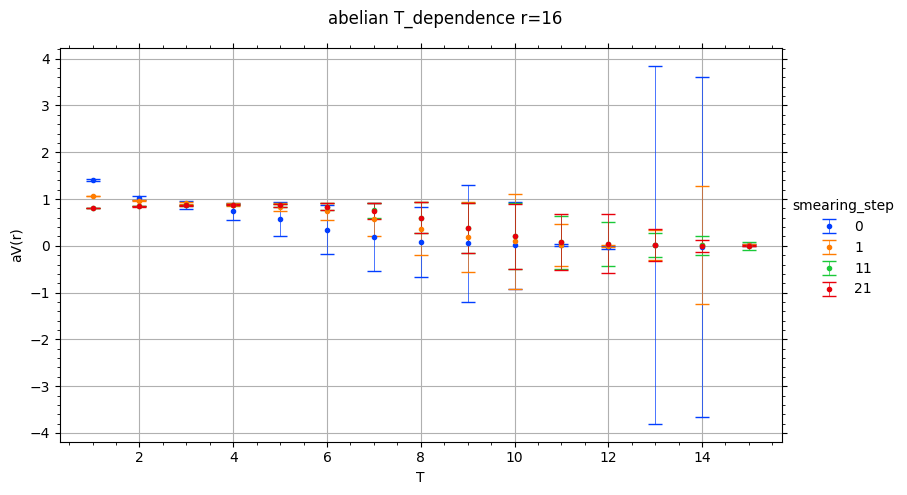

In [18]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_abelian.csv',
          'parameters': {'beta': 'beta=6.0'}, 'constraints': {'r/a': (16, 16), 'T': (1, 15), 'smearing_step': (0, 21), 'copy': (1, 1)}}]
image_path = f'../../images/potential/smearing/su3/gloudynamics/16^4/beta6.0/T_dependence'
image_name = f'potential_abelian_smearing'
data = potential_data.get_potantial_df(paths)
print(data)
# data = data[data['smearing_step'] == 30]
for r in data['r/a'].unique():
    plots.make_plot(data[data['r/a'] == r], coordinate, 'aV(r)', hue, 'T', 'aV(r)', f'abelian T_dependence r={r}', image_path, f'potential_abelian_smearing_r={r}', show_plot, err='err')

          smearing_step  r/a  copy   T     aV(r)       err
beta                                                      
beta=6.0              0   14     1   1  1.071767  0.000292
beta=6.0              0   14     1   2  0.771468  0.000459
beta=6.0              0   14     1   3  0.685471  0.000745
beta=6.0              0   14     1   4  0.660066  0.001235
beta=6.0              0   14     1   5  0.646414  0.002192
beta=6.0              0   14     1   6  0.643406  0.003736
beta=6.0              0   14     1   7  0.638820  0.007054
beta=6.0              0   14     1   8  0.665168  0.012897
beta=6.0              0   14     1   9  0.637116  0.024344
beta=6.0              0   14     1  10  0.639473  0.045505
beta=6.0              0   14     1  11  0.624033  0.084831
beta=6.0              0   14     1  12  0.838581  0.185776
beta=6.0              0   14     1  13  0.699880  0.378620
beta=6.0              1   14     1   1  0.792305  0.000217
beta=6.0              1   14     1   2  0.699686  0.0002

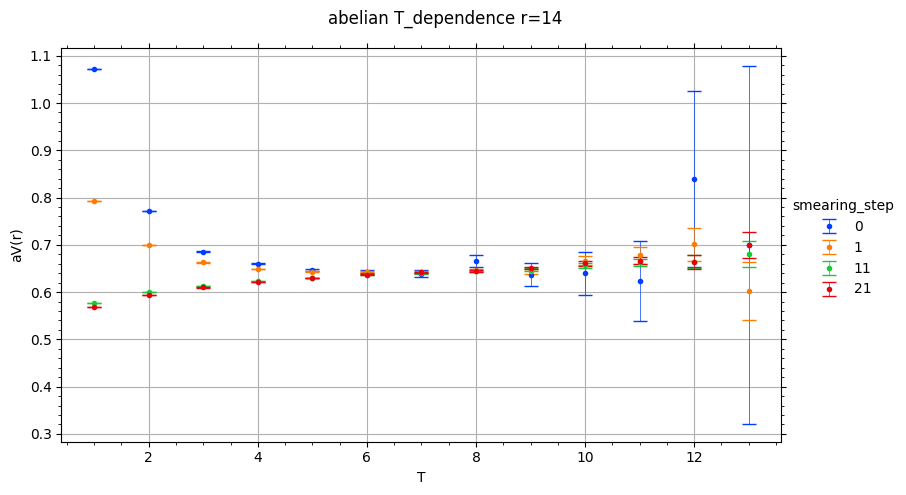

In [19]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/28^4/beta6.1/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_abelian.csv',
          'parameters': {'beta': 'beta=6.0'}, 'constraints': {'r/a': (14, 14), 'T': (1, 13), 'smearing_step': (0, 21), 'copy': (1, 1)}}]
image_path = f'../../images/potential/smearing/su3/gloudynamics/16^4/beta6.0/T_dependence'
image_name = f'potential_abelian_smearing'
data = potential_data.get_potantial_df(paths)
print(data)
# data = data[data['smearing_step'] == 30]
for r in data['r/a'].unique():
    plots.make_plot(data[data['r/a'] == r], coordinate, 'aV(r)', hue, 'T', 'aV(r)', f'abelian T_dependence r={r}', image_path, f'potential_abelian_smearing_r={r}', show_plot, err='err')

          smearing_step  r/a  copy   T     aV(r)       err
beta                                                      
beta=6.0              0   16     1   1  1.054410  0.000310
beta=6.0              0   16     1   2  0.721946  0.000478
beta=6.0              0   16     1   3  0.624764  0.000757
beta=6.0              0   16     1   4  0.586690  0.001162
beta=6.0              0   16     1   5  0.576804  0.001829
beta=6.0              0   16     1   6  0.574731  0.003103
beta=6.0              0   16     1   7  0.561798  0.005064
beta=6.0              0   16     1   8  0.580222  0.008629
beta=6.0              0   16     1   9  0.551101  0.014941
beta=6.0              0   16     1  10  0.593006  0.026113
beta=6.0              0   16     1  11  0.559838  0.044589
beta=6.0              0   16     1  12  0.645834  0.083598
beta=6.0              0   16     1  13  0.426943  0.134232
beta=6.0              0   16     1  14  0.676183  0.253047
beta=6.0              0   16     1  15  0.155339  0.3283

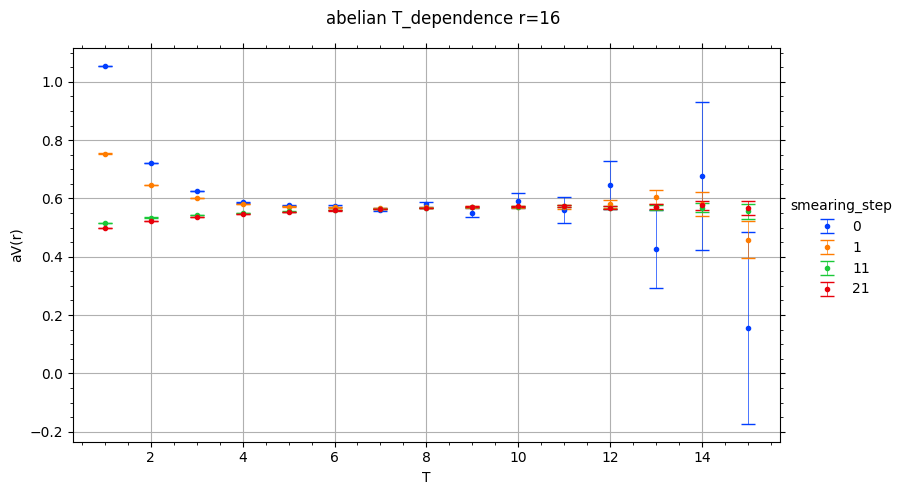

In [20]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^4/beta6.2/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_abelian.csv',
          'parameters': {'beta': 'beta=6.0'}, 'constraints': {'r/a': (16, 16), 'T': (1, 15), 'smearing_step': (0, 21), 'copy': (1, 1)}}]
image_path = f'../../images/potential/smearing/su3/gloudynamics/16^4/beta6.0/T_dependence'
image_name = f'potential_abelian_smearing'
data = potential_data.get_potantial_df(paths)
print(data)
# data = data[data['smearing_step'] == 30]
for r in data['r/a'].unique():
    plots.make_plot(data[data['r/a'] == r], coordinate, 'aV(r)', hue, 'T', 'aV(r)', f'abelian T_dependence r={r}', image_path, f'potential_abelian_smearing_r={r}', show_plot, err='err')

          smearing_step  r/a  copy   T     aV(r)       err
beta                                                      
beta=6.0              0   18     1   1  1.043627  0.000420
beta=6.0              0   18     1   2  0.681873  0.000627
beta=6.0              0   18     1   3  0.576546  0.000937
beta=6.0              0   18     1   4  0.533890  0.001353
beta=6.0              0   18     1   5  0.520287  0.002099
...                 ...  ...   ...  ..       ...       ...
beta=6.0             21   18     1  13  0.504705  0.004563
beta=6.0             21   18     1  14  0.501783  0.006897
beta=6.0             21   18     1  15  0.502850  0.010870
beta=6.0             21   18     1  16  0.515370  0.017724
beta=6.0             21   18     1  17  0.509441  0.027758

[68 rows x 6 columns]


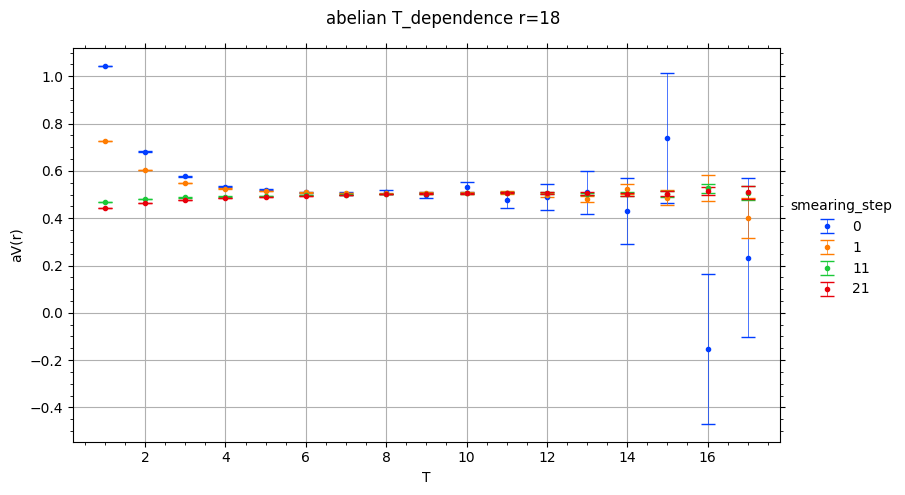

In [21]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_abelian.csv',
          'parameters': {'beta': 'beta=6.0'}, 'constraints': {'r/a': (18, 18), 'T': (1, 17), 'smearing_step': (0, 21), 'copy': (1, 1)}}]
image_path = f'../../images/potential/smearing/su3/gloudynamics/16^4/beta6.0/T_dependence'
image_name = f'potential_abelian_smearing'
data = potential_data.get_potantial_df(paths)
print(data)
# data = data[data['smearing_step'] == 30]
for r in data['r/a'].unique():
    plots.make_plot(data[data['r/a'] == r], coordinate, 'aV(r)', hue, 'T', 'aV(r)', f'abelian T_dependence r={r}', image_path, f'potential_abelian_smearing_r={r}', show_plot, err='err')

          smearing_step  r/a  copy   T     aV(r)       err
beta                                                      
beta=6.0              1    1     1   1  0.121297  0.000010
beta=6.0              1    1     1   2  0.119966  0.000011
beta=6.0              1    1     1   3  0.119454  0.000012
beta=6.0              1    1     1   4  0.119246  0.000013
beta=6.0              1    1     1   5  0.119157  0.000013
beta=6.0              1    1     1   6  0.119109  0.000014
beta=6.0              1    1     1   7  0.119090  0.000015
beta=6.0              1    1     1   8  0.119082  0.000015
beta=6.0              1    1     1   9  0.119070  0.000016
beta=6.0              1    1     1  10  0.119070  0.000017
beta=6.0              1    1     1  11  0.119072  0.000018
beta=6.0              1    1     1  12  0.119066  0.000020
beta=6.0              1    1     1  13  0.119073  0.000021
beta=6.0              1    1     1  14  0.119080  0.000022
beta=6.0              1    1     1  15  0.119079  0.0000

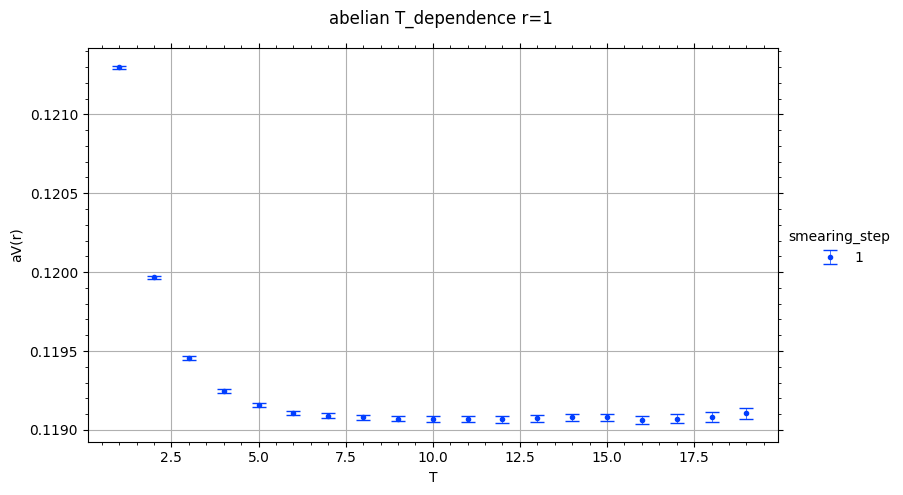

In [37]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/40^4/beta6.4/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_abelian.csv',
          'parameters': {'beta': 'beta=6.0'}, 'constraints': {'r/a': (1, 1), 'T': (1, 19), 'smearing_step': (1, 1), 'copy': (1, 1)}}]
image_path = f'../../images/potential/smearing/su3/gloudynamics/16^4/beta6.0/T_dependence'
image_name = f'potential_abelian_smearing'
data = potential_data.get_potantial_df(paths)
print(data)
# data = data[data['smearing_step'] == 30]
for r in data['r/a'].unique():
    plots.make_plot(data[data['r/a'] == r], coordinate, 'aV(r)', hue, 'T', 'aV(r)', f'abelian T_dependence r={r}', image_path, f'potential_abelian_smearing_r={r}', show_plot, err='err')

      smearing_step  r/a  copy  T     aV(r)       err
beta                                                 
6.0               0    1     1  1  0.175220  0.000064
6.0               0    1     1  2  0.166754  0.000071
6.0               0    1     1  3  0.164994  0.000076
6.0               0    1     1  4  0.164579  0.000083
6.0               0    1     1  5  0.164461  0.000089
...             ...  ...   ... ..       ...       ...
6.0               0    8    19  3  0.529983  0.001239
6.0               0    8    19  4  0.514612  0.001595
6.0               0    8    19  5  0.505013  0.002369
6.0               0    8    19  6  0.504386  0.003329
6.0               0    8    19  7  0.505988  0.005290

[1064 rows x 6 columns]
      r/a  smearing_step  copy     T     aV(r)       err
beta                                                    
6.0     1              0     1  None  0.164452  0.000057
6.0     1              0     2  None  0.163649  0.000056
6.0     1              0     3  None  0.16329

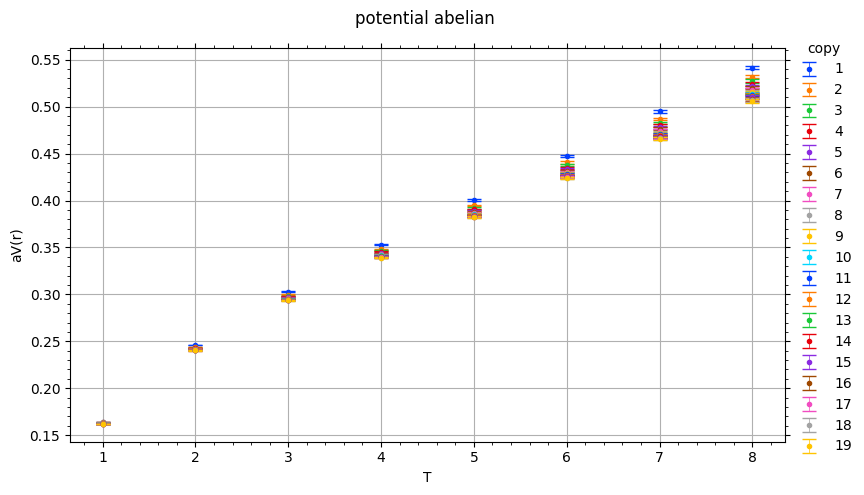

In [30]:
show_plot = True
coordinate = 'r/a'
hue = 'copy'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/40^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_abelian.csv',
          'parameters': {'beta': 6.0}, 'constraints': {'r/a': (20, 20), 'T': (1, 19), 'smearing_step': (0, 0)}}]
image_path = f'../../images/potential/su3/gluodynamics/'
image_name = f'copy_comparison'
df = potential_data.get_potantial_df(paths)
print(df)
df = df.groupby(df.index.names + ['r/a', 'smearing_step', 'copy']).apply(fit.potential_fit_T_range, 5).reset_index(level=['r/a', 'smearing_step', 'copy']).reset_index(level=-1, drop=True)
print(df)
plots.make_plot(df, 'r/a', 'aV(r)', 'copy', 'T', 'aV(r)', 'potential abelian', image_path, f'potential_abelian', show_plot, err='err')

      smearing_step  r/a  copy  T     aV(r)       err
beta                                                 
6.0               0    1     1  1  0.175220  0.000064
6.0               0    1     1  2  0.166754  0.000071
6.0               0    1     1  3  0.164994  0.000076
6.0               0    1     1  4  0.164579  0.000083
6.0               0    1     1  5  0.164461  0.000089
...             ...  ...   ... ..       ...       ...
6.0              11    8     1  3  0.527455  0.001111
6.0              11    8     1  4  0.533821  0.001301
6.0              11    8     1  5  0.536914  0.001548
6.0              11    8     1  6  0.538800  0.001914
6.0              11    8     1  7  0.537035  0.002505

[168 rows x 6 columns]
      r/a  smearing_step  copy     T     aV(r)       err
beta                                                    
6.0     1              0     1  None  0.164452  0.000057
6.0     1              1     1  None  0.164432  0.000063
6.0     1             11     1  None  0.164436

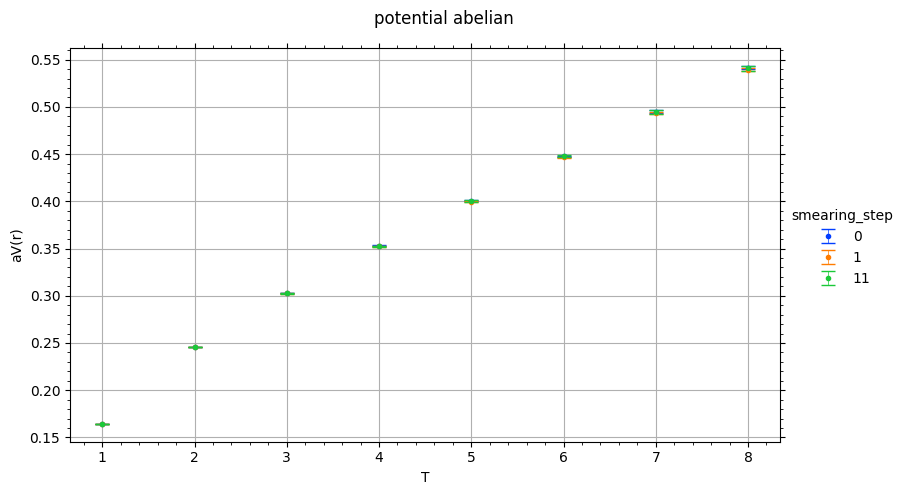

                               V0    V0_err     alpha  alpha_err     sigma  \
beta smearing_step copy                                                      
6.0  0             1     0.194698  0.000755 -0.074466   0.000584  0.044218   
                   1     0.194384  0.000683 -0.074240   0.000537  0.044307   
                   1     0.194149  0.000643 -0.074070   0.000510  0.044373   
                   1     0.195344  0.002521 -0.075651   0.003607  0.044169   
                   1     0.194098  0.002247 -0.073993   0.003271  0.044380   
                   1     0.183970  0.006381 -0.052574   0.013047  0.045463   
     1             1     0.195386  0.000755 -0.074882   0.000597  0.043925   
                   1     0.195057  0.000677 -0.074640   0.000545  0.044014   
                   1     0.194761  0.000625 -0.074422   0.000509  0.044092   
                   1     0.196253  0.002283 -0.076448   0.003339  0.043847   
                   1     0.194816  0.001978 -0.074507   0.002963

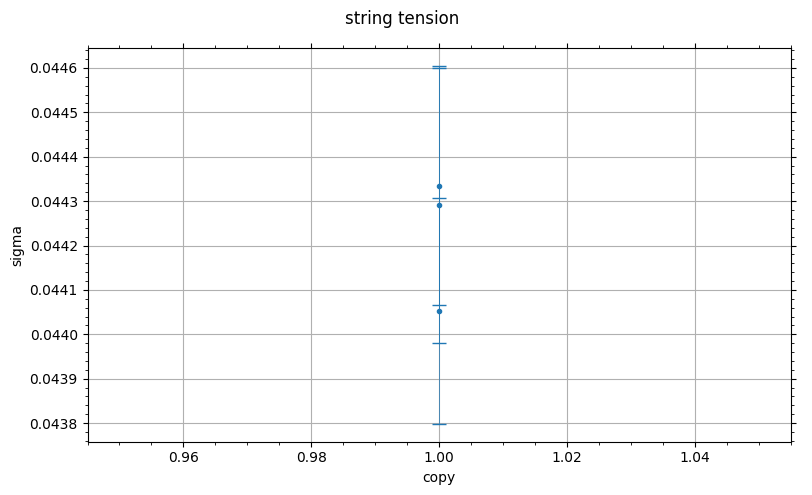

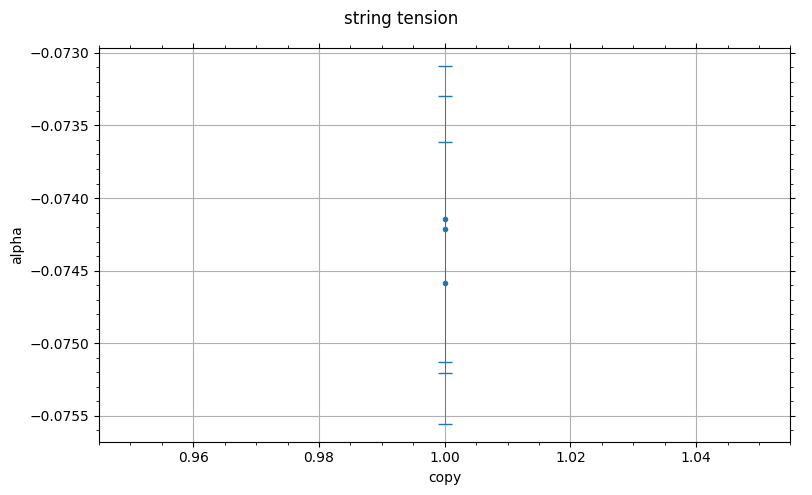

In [28]:
show_plot = True
coordinate = 'r/a'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_abelian.csv',
          'parameters': {'beta': 6.0}, 'constraints': {'r/a': (1, 8), 'T': (1, 7), 'smearing_step': (0, 11), 'copy': (1, 1)}}]
image_path = f'../../images/potential/su3/gluodynamics/'
image_name = f'smearing_comparison'
df = potential_data.get_potantial_df(paths)
print(df)
df = df.groupby(df.index.names + ['r/a', 'smearing_step', 'copy']).apply(fit.potential_fit_T_range, 5).reset_index(level=['r/a', 'smearing_step', 'copy']).reset_index(level=-1, drop=True)
print(df)
plots.make_plot(df, 'r/a', 'aV(r)', 'smearing_step', 'T', 'aV(r)', 'potential abelian', image_path, f'potential_abelian', show_plot, err='err')
df_fit = df.groupby(df.index.names + ['smearing_step', 'copy']).apply(fit.make_fit_range, fit.func_cornell, 6, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err').reset_index(level=-1, drop=True)
print(df_fit)
df_fit = df_fit.groupby(df_fit.index.names).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a').reset_index(level=-1, drop=True).reset_index(level=['smearing_step', 'copy'])
print(df_fit)
df_curves = df_fit.groupby(df_fit.index.names + ['smearing_step', 'copy']).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma']).reset_index(level=-1, drop=True).reset_index(level=['smearing_step', 'copy'])
print(df_curves)

plots.make_plot(df_fit, 'copy', 'sigma', None, 'copy', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err')
plots.make_plot(df_fit, 'copy', 'alpha', None, 'copy', 'alpha', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='alpha_err')

          smearing_step  r/a  copy   T     aV(r)       err
beta                                                      
beta=6.0              0   16     1   1  0.853328  0.000307
beta=6.0              0   16     1   2  0.547256  0.000410
beta=6.0              0   16     1   3  0.454909  0.000498
beta=6.0              0   16     1   4  0.420765  0.000668
beta=6.0              0   16     1   5  0.405443  0.000916
...                 ...  ...   ...  ..       ...       ...
beta=6.0             51   16     1  11  0.380726  0.019862
beta=6.0             51   16     1  12  0.465953  0.029574
beta=6.0             51   16     1  13  0.350014  0.042408
beta=6.0             51   16     1  14  0.343832  0.059626
beta=6.0             51   16     1  15  0.306165  0.080426

[105 rows x 6 columns]


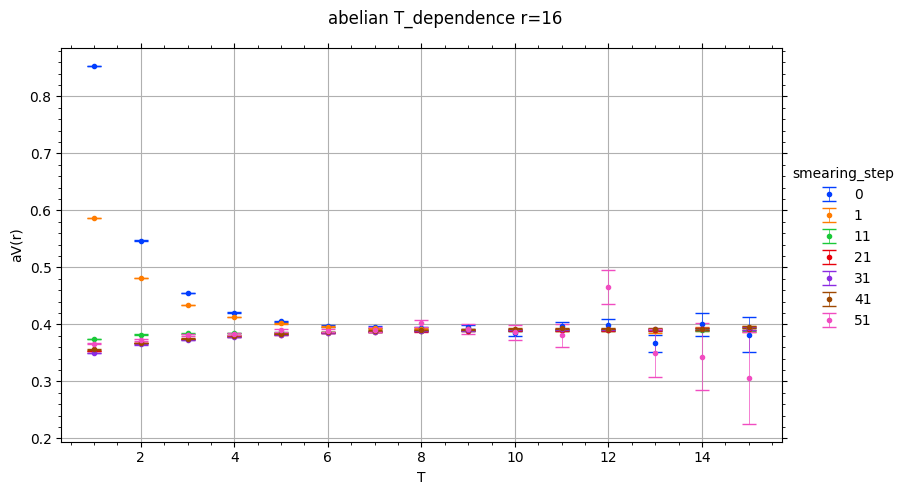

In [9]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/40^4/beta6.4/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_abelian.csv',
          'parameters': {'beta': 'beta=6.0'}, 'constraints': {'r/a': (16, 16), 'T': (1, 15), 'smearing_step': (0, 51), 'copy': (1, 1)}}]
image_path = f'../../images/potential/smearing/su3/gloudynamics/16^4/beta6.0/T_dependence'
image_name = f'potential_abelian_smearing'
data = potential_data.get_potantial_df(paths)
print(data)
# data = data[data['smearing_step'] == 30]
for r in data['r/a'].unique():
    plots.make_plot(data[data['r/a'] == r], coordinate, 'aV(r)', hue, 'T', 'aV(r)', f'abelian T_dependence r={r}', image_path, f'potential_abelian_smearing_r={r}', show_plot, err='err')

                    r/a  copy  T     aV(r)       err  bin_size
beta smearing_step                                            
6.0  0                1     1  1  0.175247  0.000064         1
     0                1     1  2  0.166782  0.000071         1
     0                1     1  3  0.165021  0.000076         1
     0                1     1  4  0.164605  0.000083         1
     0                1     1  5  0.164490  0.000088         1
...                 ...   ... ..       ...       ...       ...
     0                8     1  3  0.561544  0.001736         4
     0                8     1  4  0.547937  0.002230         4
     0                8     1  5  0.541588  0.002971         4
     0                8     1  6  0.540235  0.004190         4
     0                8     1  7  0.544762  0.006428         4

[224 rows x 6 columns]
                             r/a         V     V_err         a     a_err  \
beta smearing_step bin_size                                                
6.0  

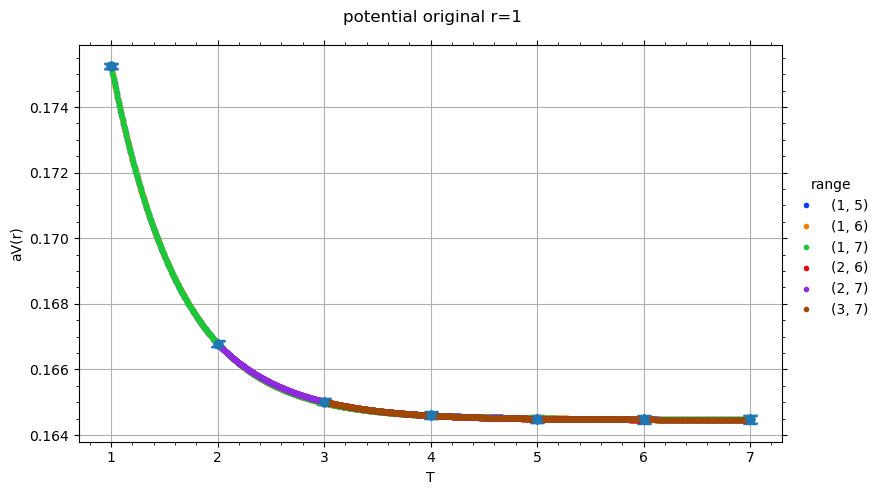

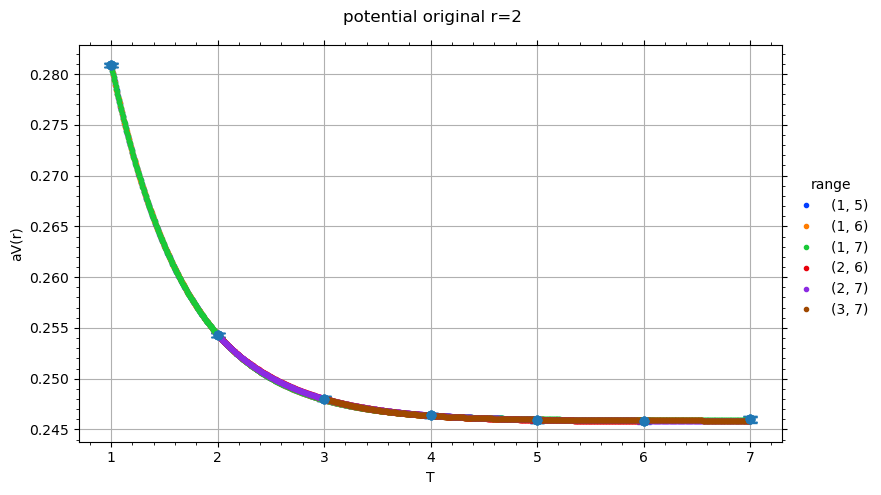

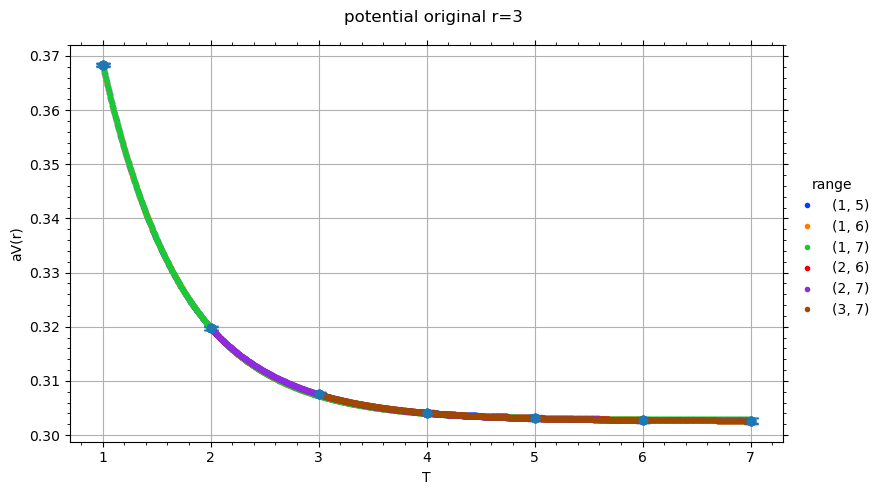

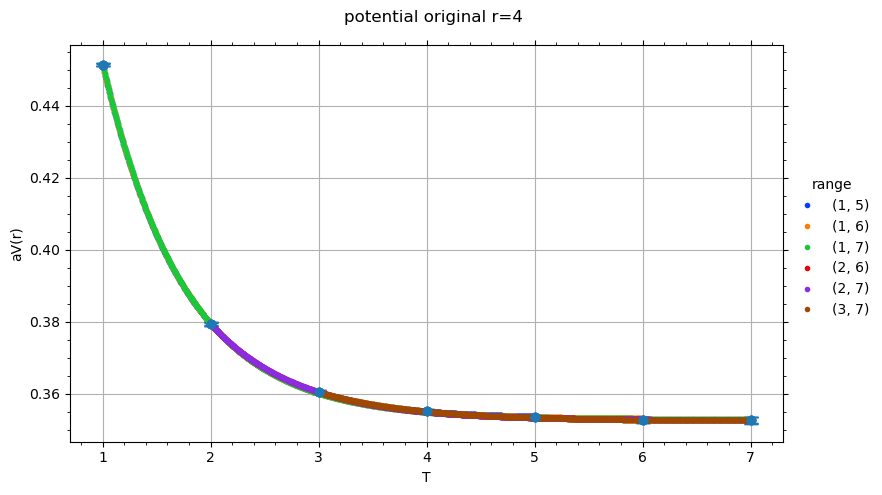

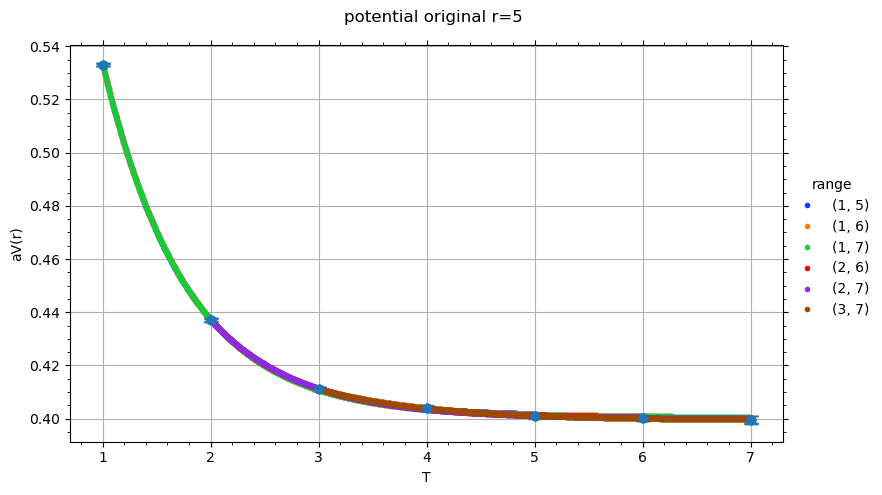

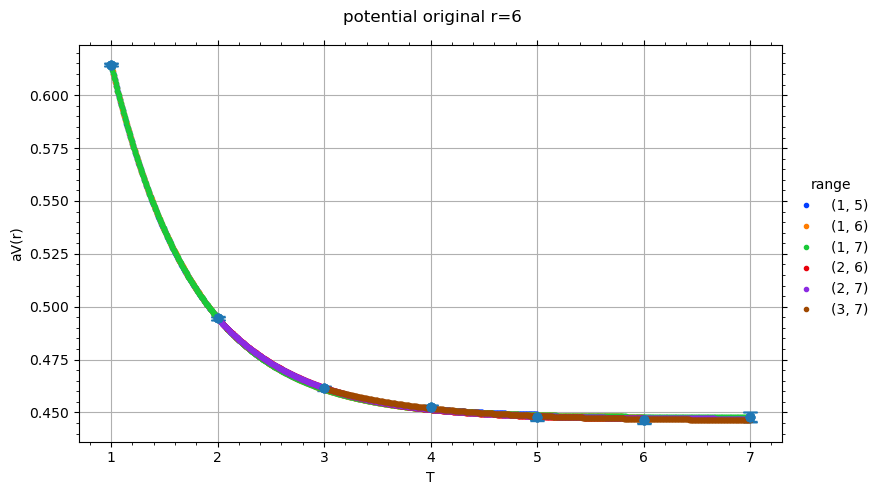

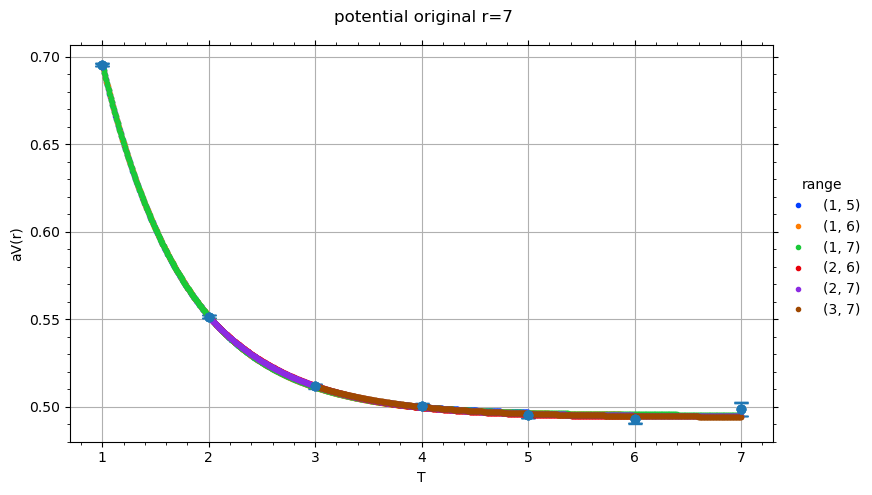

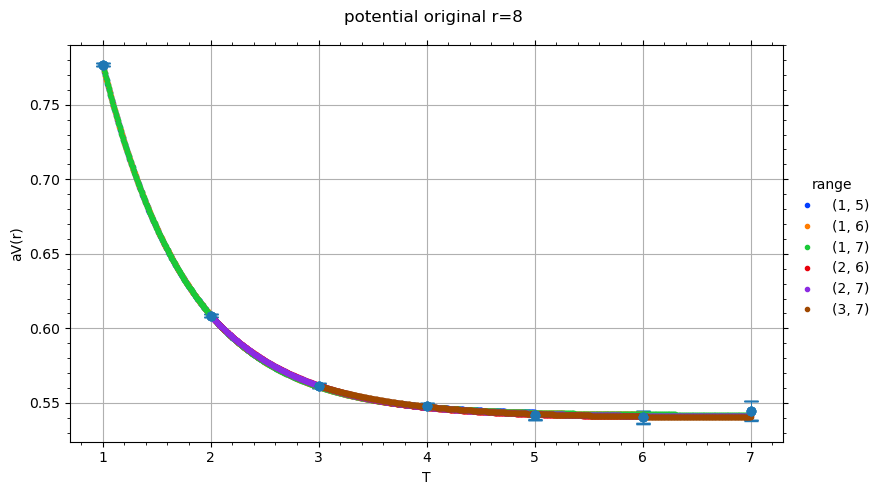

In [2]:
show_plot = True
paths = [{'path': '../../result/smearing/binning/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_abelian.csv',
          'parameters': {'beta': 6.0}, 'constraints': {'r/a': (1, 8), 'T': (1, 7), 'smearing_step': (0, 0), 'copy': (1, 1)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/16^4/beta6.0/T_fit/abelian'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['smearing_step'])
print(df)
df_fit = df.groupby(df.index.names + ['r/a', 'bin_size']).apply(fit.make_fit_range, fit.func_exponent, 5, ['V', 'a', 'b'], 'T', 'aV(r)', err_col='err').reset_index(level=-1, drop=True).reset_index(level='r/a')
print(df_fit)
df_curve = df_fit.groupby(df.index.names + ['r/a', 'T_min', 'T_max']).apply(fit.make_fit_curve, fit.func_exponent, 'T', 'aV(r)', ['V', 'a', 'b']).reset_index(level=-1, drop=True).reset_index(level=['r/a', 'T_min', 'T_max'])
df_curve['range'] = '(' + df_curve['T_min'].astype(str) + ', ' + df_curve['T_max'].astype(str) + ')'
print(df_curve)
# df_curve['hue'] = 'T_fit'
# for r in df['r/a'].unique():
#     plots.plot_potential_single(df[df['r/a'] == r], 'T', 'aV(r)', 'err', 'range', 'T', 'aV(r)', 'potential original', image_path, f'potential_original_r=18', show_plot, df_fits=df_curve[df_curve['r/a'] == r])
for r in df['r/a'].unique():
    fg = plots.plot_potential_single(df_curve[df_curve['r/a'] == r], 'T', 'aV(r)', 'range', 'T', 'aV(r)', f'potential original r={r}', image_path, f'potential_original_r={r}', False)
    fg.ax.errorbar(df[df['r/a'] == r]['T'], df[df['r/a'] == r]['aV(r)'], yerr=df[df['r/a'] == r]['err'], mfc=None, fmt='o', ms=6, capsize=5, lw=0.5, ls=None)

      HYP  r/a     T     aV(r)       err
beta                                    
6.0     0    1  None  0.411112  0.000146
6.0     0    2  None  0.597377  0.000701
6.0     0    3  None  0.699247  0.001918
6.0     0    4  None  0.774019  0.002754
6.0     0    5  None  0.843598  0.003394
6.0     0    6  None  0.897539  0.009013
6.0     0    7  None  0.956854  0.010586
6.0     0    8  None  1.017136  0.012036
6.0     1    1  None  0.052326  0.000094
6.0     1    2  None  0.116959  0.000350
6.0     1    3  None  0.207178  0.000961
6.0     1    4  None  0.276867  0.001998
6.0     1    5  None  0.338066  0.003639
6.0     1    6  None  0.394942  0.005841
6.0     1    7  None  0.450982  0.008128
6.0     1    8  None  0.506899  0.009489
      HYP        V0    V0_err     alpha  alpha_err     sigma  sigma_err  \
beta                                                                      
6.0     0  0.620454  0.008754 -0.263627   0.006774  0.054545   0.002123   
6.0     1  0.141387  0.012883 -0.2458

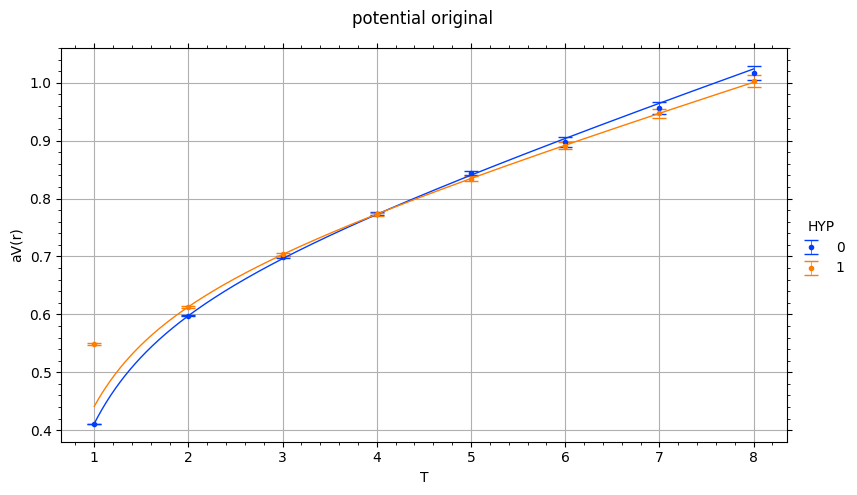

In [2]:
show_plot = True
coordinate = 'r/a'
hue = 'beta'
groupby = []
paths = [{'path': '../../result/smearing/binning/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'beta': 6.0, 'HYP': 0}, 'constraints': {'r/a': (1, 8), 'T': (1, 7), 'smearing_step': (30, 30), 'bin_size': (103, 103)}},
          {'path': '../../result/smearing/binning/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'beta': 6.0, 'HYP': 1}, 'constraints': {'r/a': (1, 8), 'T': (1, 7), 'smearing_step': (30, 30), 'bin_size': (103, 103)}}]
image_path = f'../../images/potential/su3/gluodynamics/'
image_name = f'beta_comparison'
df = potential_data.get_potantial_df(paths)
df = df.groupby(df.index.names + ['r/a']).apply(fit.potential_fit_T_range, 5).reset_index(level=['r/a', 'HYP']).reset_index(level=-1, drop=True)
print(df)
df_fit = df.groupby(df.index.names + ['HYP']).apply(fit.make_fit_range, fit.func_cornell, 6, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err').reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(df_fit.index.names).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a').reset_index(level=-1, drop=True).reset_index(level=['HYP'])
df_curves = df_fit.groupby(df_fit.index.names + ['HYP']).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma']).reset_index(level=-1, drop=True).reset_index(level=['HYP'])
print(df_fit)
print(df_fit.loc[df_fit['HYP'] == 1, ['V0', 'alpha', 'sigma']].values[0])
V, V_err = fit.fit_curve_shift(df[df['HYP'] == 0], df_fit.loc[df_fit['HYP'] == 1, ['V0', 'alpha', 'sigma']].values[0], 'r/a', 'aV(r)', 'err', fit.func_cornell)
print(V, V_err)
df.loc[df['HYP'] == 1, 'aV(r)'] = df.loc[df['HYP'] == 1, 'aV(r)'] + V
df.loc[df['HYP'] == 1, 'err'] = np.sqrt(df.loc[df['HYP'] == 1, 'err'] ** 2 + V_err ** 2)
print(df)
df_curves.loc[df_curves['HYP'] == 1, 'aV(r)'] = df_curves.loc[df_curves['HYP'] == 1, 'aV(r)'] + V
plots.plot_potential_single(df, 'r/a', 'aV(r)', 'HYP', 'T', 'aV(r)', 'potential original', image_path, f'potential_monopole', show_plot, err='err', df_fits=df_curves)
# df_fit = df.groupby(df.index.names).apply(fit.make_fit_range, fit.func_cornell, 6, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err').reset_index(level=-1, drop=True)
# print(df_fit)
# df_fit = df_fit.groupby(df_fit.index.names).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a').reset_index(level=-1, drop=True).reset_index(level=['bin_size'])
# print(df_fit)
# df_curves = df_fit.groupby(df_fit.index.names + ['bin_size']).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma']).reset_index(level=-1, drop=True).reset_index(level=['bin_size'])

      r/a  bin_size     T     aV(r)       err
beta                                         
6.0     1       103  None  0.411112  0.000146
6.0     2       103  None  0.597377  0.000701
6.0     3       103  None  0.699247  0.001918
6.0     4       103  None  0.774019  0.002754
6.0     5       103  None  0.843598  0.003394
6.0     6       103  None  0.897539  0.009013
6.0     7       103  None  0.956854  0.010586
6.0     8       103  None  1.017136  0.012036


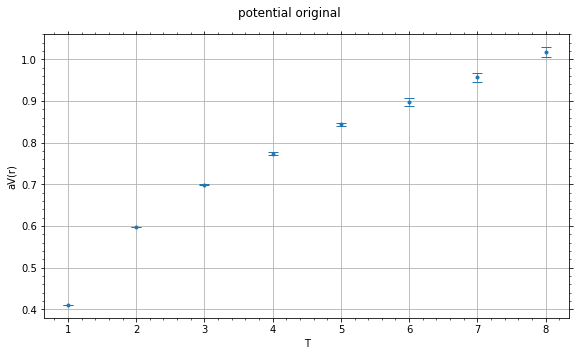

                     V0    V0_err     alpha  alpha_err     sigma  sigma_err  \
beta bin_size                                                                 
6.0  103       0.617230  0.004290 -0.261785   0.003216  0.055665   0.001143   
     103       0.618828  0.004037 -0.262912   0.003049  0.055194   0.001060   
     103       0.619927  0.003793 -0.263693   0.002887  0.054874   0.000980   
     103       0.650658  0.018676 -0.308262   0.026158  0.050423   0.002931   
     103       0.649585  0.015946 -0.306830   0.022713  0.050603   0.002436   
     103       0.650596  0.041600 -0.308956   0.083950  0.050492   0.004867   

               chi_square   p_value  r/a_min  r/a_max      w_V0   w_alpha  \
beta bin_size                                                               
6.0  103         1.435242  0.487912        1        6  0.192093  0.202548   
     103         1.361586  0.714563        1        7  0.317628  0.330019   
     103         1.179087  0.881530        1        8  0.44

In [18]:
show_plot = True
coordinate = 'r/a'
hue = 'beta'
groupby = []
paths = [{'path': '../../result/smearing/binning/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'beta': 6.0}, 'constraints': {'r/a': (1, 8), 'T': (1, 7), 'smearing_step': (30, 30), 'bin_size': (103, 103)}}]
image_path = f'../../images/potential/su3/gluodynamics/'
image_name = f'beta_comparison'
df = potential_data.get_potantial_df(paths)
df = df.groupby(df.index.names + ['r/a', 'bin_size']).apply(fit.potential_fit_T_range, 5).reset_index(level=['r/a', 'bin_size']).reset_index(level=-1, drop=True)
print(df)
plots.plot_potential_single(df, 'r/a', 'aV(r)', None, 'T', 'aV(r)', 'potential original', image_path, f'potential_monopole', show_plot, err='err')
df_fit = df.groupby(df.index.names + ['bin_size']).apply(fit.make_fit_range, fit.func_cornell, 6, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err').reset_index(level=-1, drop=True)
print(df_fit)
df_fit = df_fit.groupby(df_fit.index.names).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a').reset_index(level=-1, drop=True).reset_index(level=['bin_size'])
print(df_fit)
df_curves = df_fit.groupby(df_fit.index.names + ['bin_size']).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma']).reset_index(level=-1, drop=True).reset_index(level=['bin_size'])

      r/a  bin_size  copy     T     aV(r)       err
beta                                               
6.0     1         1     1  None  0.404798  0.000125
6.0     1         1     2  None  0.404682  0.000124
6.0     1         1     3  None  0.404677  0.000163
6.0     1         1     4  None  0.404661  0.000195
6.0     1         1     5  None  0.404825  0.000142
...   ...       ...   ...   ...       ...       ...
6.0     8         1    15  None  0.720151  0.004289
6.0     8         1    16  None  0.720862  0.003901
6.0     8         1    17  None  0.719744  0.004432
6.0     8         1    18  None  0.720938  0.004172
6.0     8         1    19  None  0.720901  0.004120

[152 rows x 6 columns]


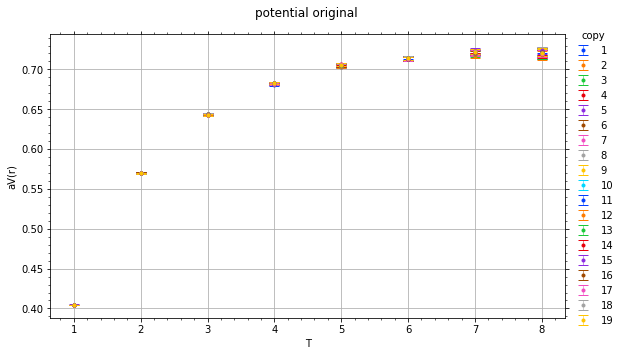

                          V0    V0_err     alpha  alpha_err     sigma  \
beta bin_size copy                                                      
6.0  1        1     0.698538  0.001983 -0.307183   0.001553  0.013407   
              1     0.704549  0.001822 -0.311530   0.001446  0.011730   
              1     0.712433  0.001640 -0.317292   0.001324  0.009588   
              1     0.797195  0.007070 -0.449600   0.010283 -0.001224   
              1     0.804777  0.005767 -0.459929   0.008642 -0.002452   
...                      ...       ...       ...        ...       ...   
              19    0.714706  0.002583 -0.320205   0.002105  0.010162   
              19    0.721903  0.002402 -0.325693   0.001976  0.008440   
              19    0.809736  0.007810 -0.470133   0.011818 -0.002574   
              19    0.816847  0.006835 -0.480015   0.010587 -0.003700   
              19    0.865875  0.016433 -0.590617   0.035335 -0.008675   

                    sigma_err  chi_square       p_

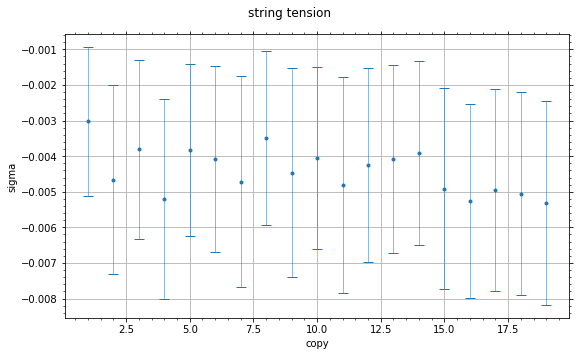

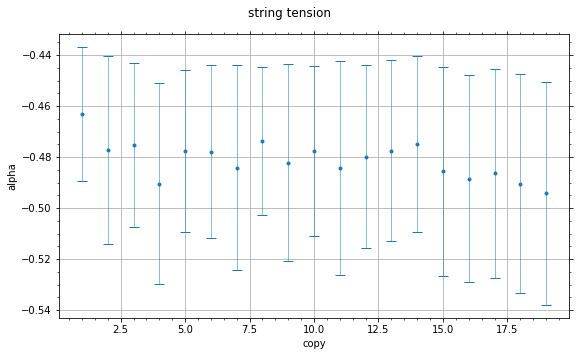

In [7]:
show_plot = True
coordinate = 'r/a'
hue = 'beta'
groupby = []
paths = [{'path': '../../result/smearing/binning/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_monopoless.csv',
          'parameters': {'beta': 6.0}, 'constraints': {'r/a': (1, 8), 'T': (1, 7), 'smearing_step': (30, 30), 'bin_size': (1, 1)}}]
image_path = f'../../images/potential/su3/gluodynamics/'
image_name = f'beta_comparison'
df = potential_data.get_potantial_df(paths)
df = df.groupby(df.index.names + ['r/a', 'bin_size', 'copy']).apply(fit.potential_fit_T_range, 5).reset_index(level=['r/a', 'bin_size', 'copy']).reset_index(level=-1, drop=True)
print(df)
plots.plot_potential_single(df, 'r/a', 'aV(r)', 'copy', 'T', 'aV(r)', 'potential original', image_path, f'potential_monopole', show_plot, err='err')
df_fit = df.groupby(df.index.names + ['bin_size', 'copy']).apply(fit.make_fit_range, fit.func_cornell, 6, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err').reset_index(level=-1, drop=True)
print(df_fit)
df_fit = df_fit.groupby(df_fit.index.names).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a').reset_index(level=-1, drop=True).reset_index(level=['bin_size', 'copy'])
print(df_fit)
df_curves = df_fit.groupby(df_fit.index.names + ['bin_size', 'copy']).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma']).reset_index(level=-1, drop=True).reset_index(level=['bin_size', 'copy'])
print(df_curves)

plots.plot_potential_single(df_fit, 'copy', 'sigma', None, 'copy', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err')
plots.plot_potential_single(df_fit, 'copy', 'alpha', None, 'copy', 'alpha', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='alpha_err')

                    r/a  copy  T     aV(r)       err  bin_size
beta smearing_step                                            
6.0  30               1     1  1  0.414682  0.000065         1
     30               1     1  2  0.407681  0.000081         1
     30               1     1  3  0.405715  0.000100         1
     30               1     1  4  0.405128  0.000125         1
     30               1     1  5  0.404741  0.000167         1
     30               1     1  6  0.404883  0.000227         1
     30               1     1  7  0.404548  0.000325         1
     30               2     1  1  0.590794  0.000124         1
     30               2     1  2  0.578358  0.000171         1
     30               2     1  3  0.573421  0.000224         1
     30               2     1  4  0.571537  0.000303         1
     30               2     1  5  0.570244  0.000475         1
     30               2     1  6  0.570254  0.000764         1
     30               2     1  7  0.570233  0.001294   

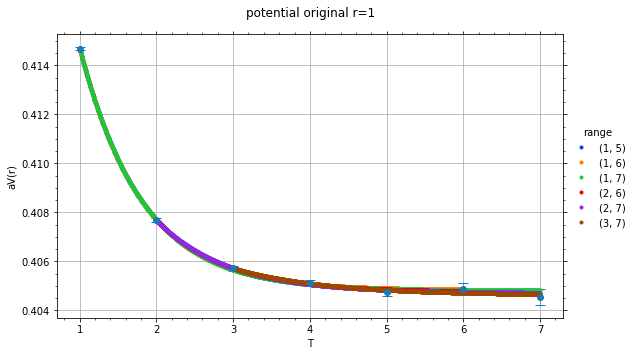

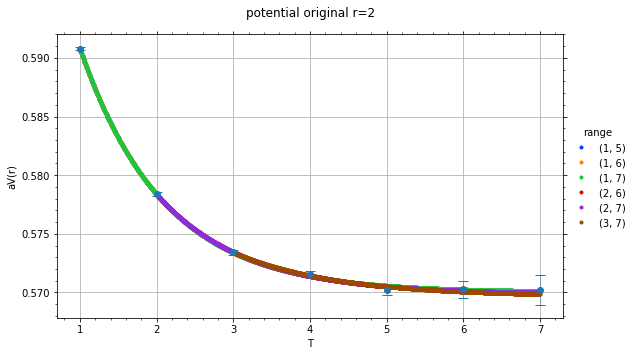

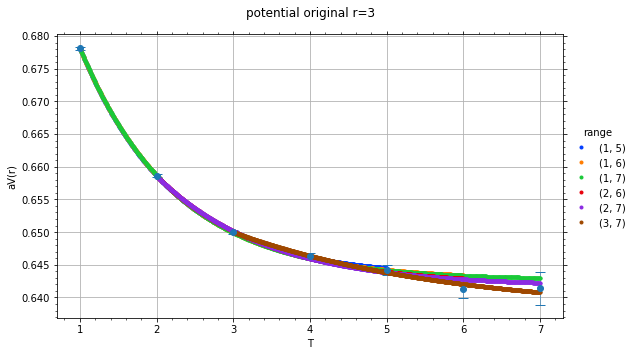

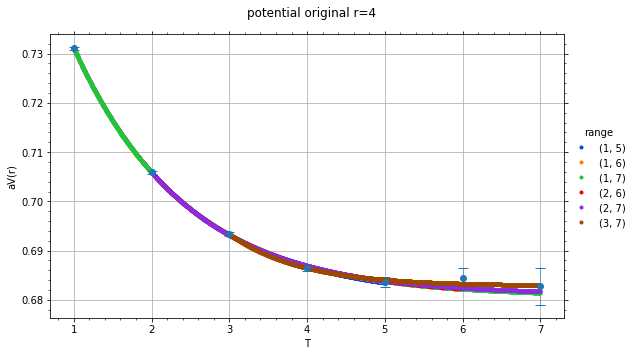

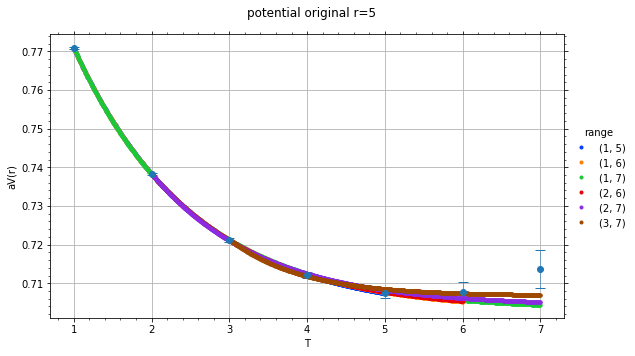

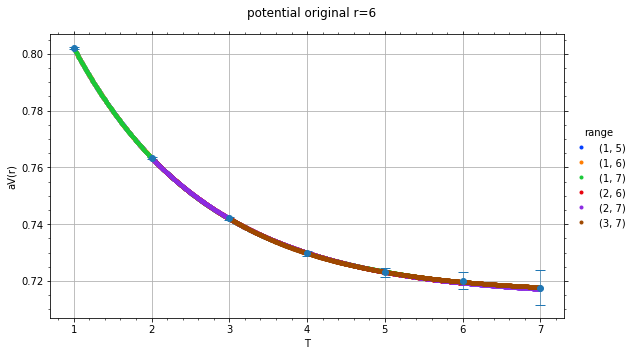

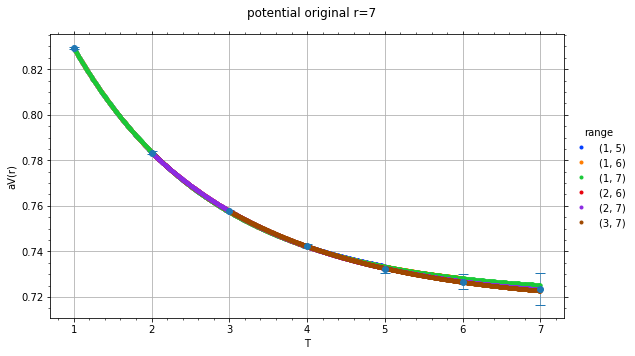

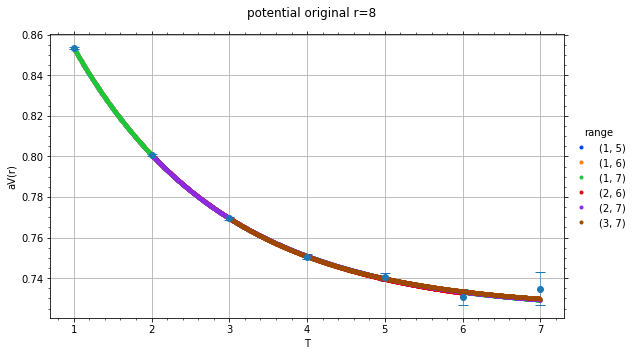

In [4]:
show_plot = True
paths = [{'path': '../../result/smearing/binning/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_monopoless.csv',
          'parameters': {'beta': 6.0}, 'constraints': {'r/a': (1, 8), 'T': (1, 7), 'smearing_step': (30, 30), 'bin_size': (1, 1), 'copy': (1, 1)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/16^4/beta6.0/T_fit/original'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['smearing_step'])
print(df)
df_fit = df.groupby(df.index.names + ['r/a', 'bin_size']).apply(fit.make_fit_range, fit.func_exponent, 5, ['V', 'a', 'b'], 'T', 'aV(r)', err_col='err').reset_index(level=-1, drop=True).reset_index(level='r/a')
print(df_fit)
df_curve = df_fit.groupby(df.index.names + ['r/a', 'T_min', 'T_max']).apply(fit.make_fit_curve, fit.func_exponent, 'T', 'aV(r)', ['V', 'a', 'b']).reset_index(level=-1, drop=True).reset_index(level=['r/a', 'T_min', 'T_max'])
df_curve['range'] = '(' + df_curve['T_min'].astype(str) + ', ' + df_curve['T_max'].astype(str) + ')'
print(df_curve)
# df_curve['hue'] = 'T_fit'
# for r in df['r/a'].unique():
#     plots.plot_potential_single(df[df['r/a'] == r], 'T', 'aV(r)', 'err', 'range', 'T', 'aV(r)', 'potential original', image_path, f'potential_original_r=18', show_plot, df_fits=df_curve[df_curve['r/a'] == r])
for r in df['r/a'].unique():
    fg = plots.plot_potential_single(df_curve[df_curve['r/a'] == r], 'T', 'aV(r)', 'range', 'T', 'aV(r)', f'potential original r={r}', image_path, f'potential_original_r={r}', False)
    fg.ax.errorbar(df[df['r/a'] == r]['T'], df[df['r/a'] == r]['aV(r)'], yerr=df[df['r/a'] == r]['err'], mfc=None, fmt='o', ms=6, capsize=5, lw=0.5, ls=None)

      r/a  bin_size  copy     T     aV(r)       err
beta                                               
6.0     1       103     1  None  0.018743  0.000113
6.0     1       103     2  None  0.018092  0.000090
6.0     1       103     3  None  0.017712  0.000090
6.0     1       103     4  None  0.017492  0.000051
6.0     1       103     5  None  0.017341  0.000058
...   ...       ...   ...   ...       ...       ...
6.0     8       103    15  None  0.240529  0.006957
6.0     8       103    16  None  0.239032  0.006450
6.0     8       103    17  None  0.237639  0.006156
6.0     8       103    18  None  0.236614  0.004239
6.0     8       103    19  None  0.235870  0.005645

[152 rows x 6 columns]


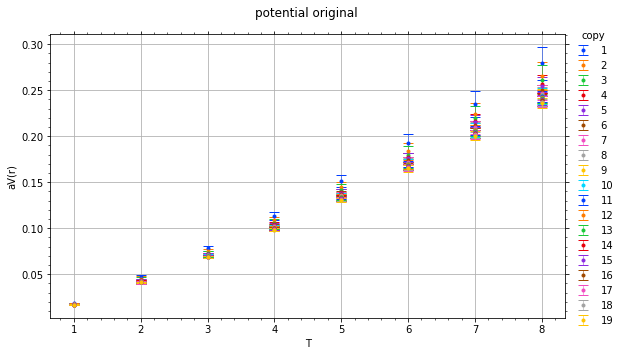

                          V0    V0_err     alpha  alpha_err     sigma  \
beta bin_size copy                                                      
6.0  103      1    -0.038936  0.010243  0.020608   0.007982  0.037071   
              1    -0.041911  0.009311  0.022828   0.007319  0.037827   
              1    -0.044720  0.008580  0.024937   0.006796  0.038527   
              1    -0.067307  0.026733  0.062344   0.039674  0.041444   
              1    -0.071523  0.023334  0.068037   0.035548  0.042159   
...                      ...       ...       ...        ...       ...   
              19   -0.033961  0.003381  0.018353   0.002677  0.032278   
              19   -0.035984  0.003080  0.019883   0.002460  0.032772   
              19   -0.052844  0.009488  0.048349   0.014333  0.034907   
              19   -0.055185  0.008190  0.051547   0.012753  0.035298   
              19   -0.073073  0.020969  0.089518   0.042916  0.037205   

                    sigma_err  chi_square   p_valu

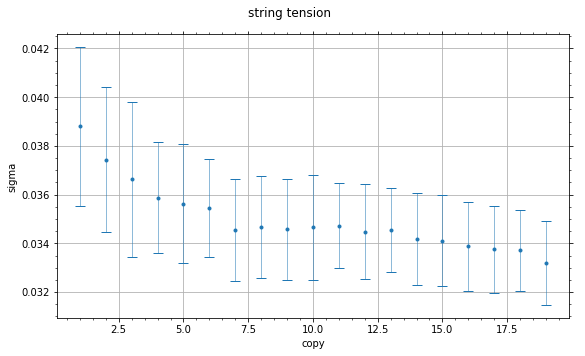

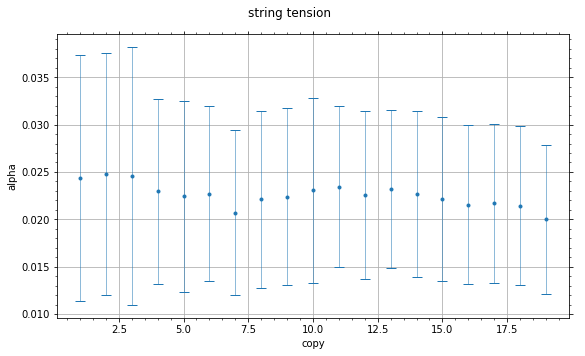

In [17]:
show_plot = True
coordinate = 'r/a'
hue = 'beta'
groupby = []
paths = [{'path': '../../result/smearing/binning/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_monopole.csv',
          'parameters': {'beta': 6.0}, 'constraints': {'r/a': (1, 8), 'T': (1, 7), 'smearing_step': (30, 30), 'bin_size': (103, 103)}}]
image_path = f'../../images/potential/su3/gluodynamics/'
image_name = f'beta_comparison'
df = potential_data.get_potantial_df(paths)
df = df.groupby(df.index.names + ['r/a', 'bin_size', 'copy']).apply(fit.potential_fit_T_range, 5).reset_index(level=['r/a', 'bin_size', 'copy']).reset_index(level=-1, drop=True)
print(df)
plots.plot_potential_single(df, 'r/a', 'aV(r)', 'copy', 'T', 'aV(r)', 'potential original', image_path, f'potential_monopole', show_plot, err='err')
df_fit = df.groupby(df.index.names + ['bin_size', 'copy']).apply(fit.make_fit_range, fit.func_cornell, 6, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err').reset_index(level=-1, drop=True)
print(df_fit)
df_fit = df_fit.groupby(df_fit.index.names).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a').reset_index(level=-1, drop=True).reset_index(level=['bin_size', 'copy'])
print(df_fit)
df_curves = df_fit.groupby(df_fit.index.names + ['bin_size', 'copy']).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma']).reset_index(level=-1, drop=True).reset_index(level=['bin_size', 'copy'])
print(df_curves)

plots.plot_potential_single(df_fit, 'copy', 'sigma', None, 'copy', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err')
plots.plot_potential_single(df_fit, 'copy', 'alpha', None, 'copy', 'alpha', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='alpha_err')

                    r/a  copy  T     aV(r)       err  bin_size
beta smearing_step                                            
6.0  30               1     2  1  0.018303  0.000057         1
     30               1     2  2  0.018143  0.000056         1
     30               1     2  3  0.018099  0.000055         1
     30               1     2  4  0.018082  0.000055         1
     30               1     2  5  0.018082  0.000055         1
     30               1     2  6  0.018099  0.000055         1
     30               1     2  7  0.018124  0.000056         1
     30               2     2  1  0.044122  0.000147         1
     30               2     2  2  0.044326  0.000147         1
     30               2     2  3  0.044458  0.000148         1
     30               2     2  4  0.044546  0.000149         1
     30               2     2  5  0.044625  0.000151         1
     30               2     2  6  0.044731  0.000152         1
     30               2     2  7  0.044843  0.000154   

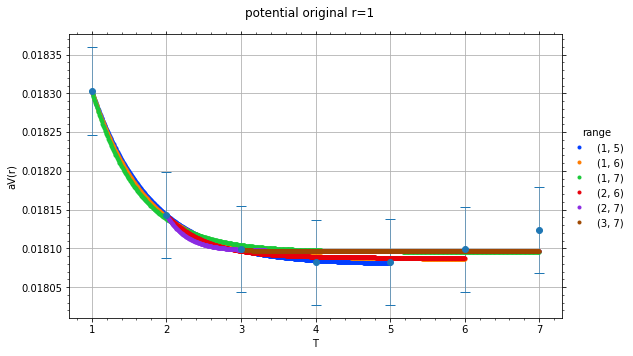

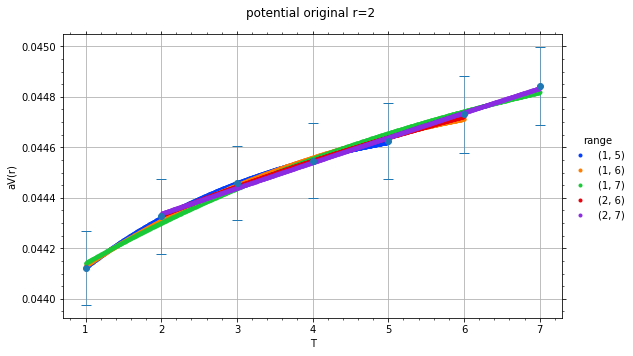

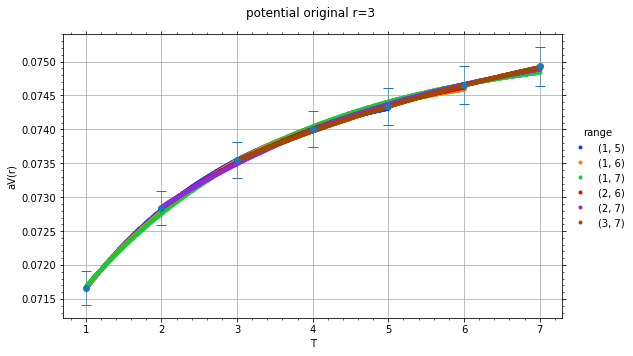

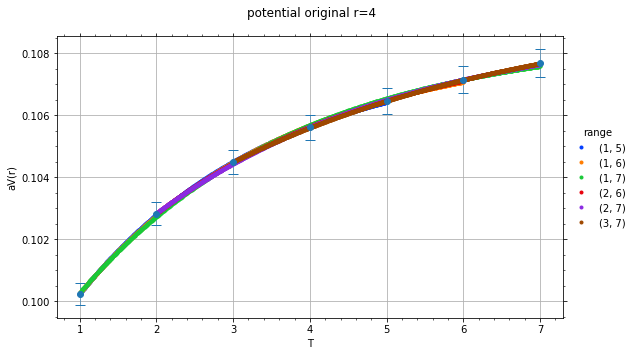

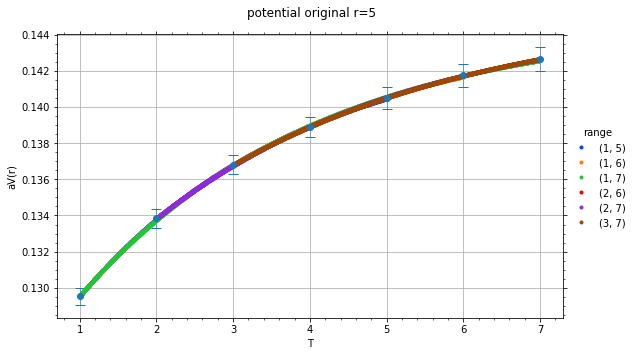

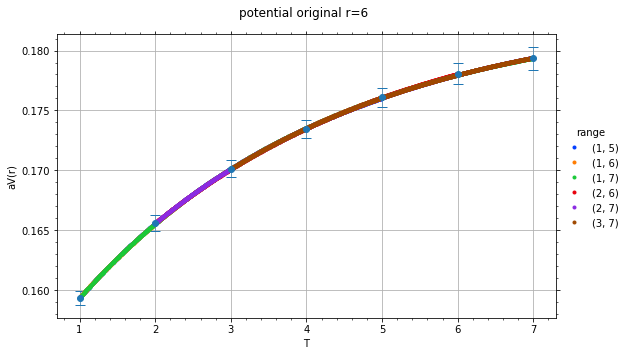

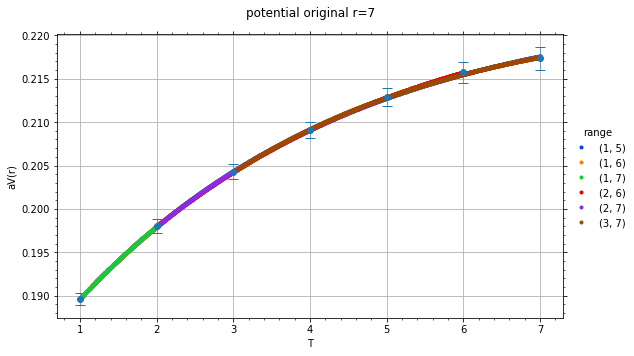

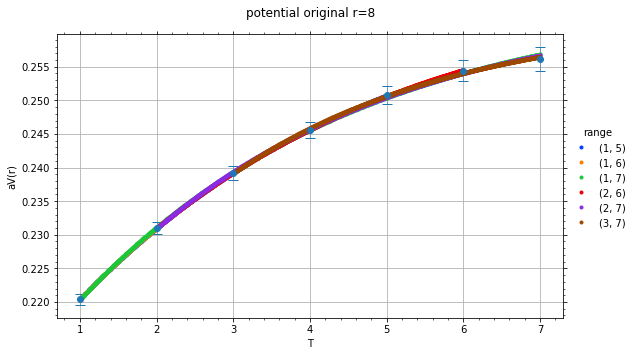

In [4]:
show_plot = True
paths = [{'path': '../../result/smearing/binning/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_monopole.csv',
          'parameters': {'beta': 6.0}, 'constraints': {'r/a': (1, 8), 'T': (1, 7), 'smearing_step': (30, 30), 'bin_size': (1, 1), 'copy': (2, 2)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/16^4/beta6.0/T_fit/original'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['smearing_step'])
print(df)
df_fit = df.groupby(df.index.names + ['r/a', 'bin_size']).apply(fit.make_fit_range, fit.func_exponent, 5, ['V', 'a', 'b'], 'T', 'aV(r)', err_col='err').reset_index(level=-1, drop=True).reset_index(level='r/a')
print(df_fit)
df_curve = df_fit.groupby(df.index.names + ['r/a', 'T_min', 'T_max']).apply(fit.make_fit_curve, fit.func_exponent, 'T', 'aV(r)', ['V', 'a', 'b']).reset_index(level=-1, drop=True).reset_index(level=['r/a', 'T_min', 'T_max'])
df_curve['range'] = '(' + df_curve['T_min'].astype(str) + ', ' + df_curve['T_max'].astype(str) + ')'
print(df_curve)
# df_curve['hue'] = 'T_fit'
# for r in df['r/a'].unique():
#     plots.plot_potential_single(df[df['r/a'] == r], 'T', 'aV(r)', 'err', 'range', 'T', 'aV(r)', 'potential original', image_path, f'potential_original_r=18', show_plot, df_fits=df_curve[df_curve['r/a'] == r])
for r in df['r/a'].unique():
    fg = plots.plot_potential_single(df_curve[df_curve['r/a'] == r], 'T', 'aV(r)', 'range', 'T', 'aV(r)', f'potential original r={r}', image_path, f'potential_original_r={r}', False)
    fg.ax.errorbar(df[df['r/a'] == r]['T'], df[df['r/a'] == r]['aV(r)'], yerr=df[df['r/a'] == r]['err'], mfc=None, fmt='o', ms=6, capsize=5, lw=0.5, ls=None)

                  r/a  copy  T     aV(r)       err
Nt smearing_step                                  
18 31               1     0  1  0.075556  0.000014
   31               1     0  2  0.070102  0.000014
   31               1     0  3  0.068810  0.000014
   31               1     0  4  0.068356  0.000013
   31               1     0  5  0.068175  0.000013
...               ...   ... ..       ...       ...
12 31              25     0  1  1.548435  0.001604
   31              25     0  2  1.297158  0.003747
   31              25     0  3  1.102257  0.009047
   31              25     0  4  0.923230  0.019687
   31              25     0  5  0.680440  0.036050

[747 rows x 5 columns]


/home/ilya/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ilya/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ilya/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ilya/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ilya/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the 

                 Nt  r/a     T     aV(r)       err
smearing_step                                     
31            0  12    1  None  0.067709  0.000007
              0  12    2  None  0.143788  0.000026
              0  12    3  None  0.242980  0.000074
              0  12    4  None  0.307946  0.000159
              0  12    5  None  0.356359  0.000289
...              ..  ...   ...       ...       ...
              0  18   28  None  1.306378  0.141647
              0  18   29  None  1.398644  0.126121
              0  18   30  None  1.451910  0.152294
              0  18   31  None  1.412117  0.258138
              0  18   32  None  1.289693  0.561366

[113 rows x 5 columns]


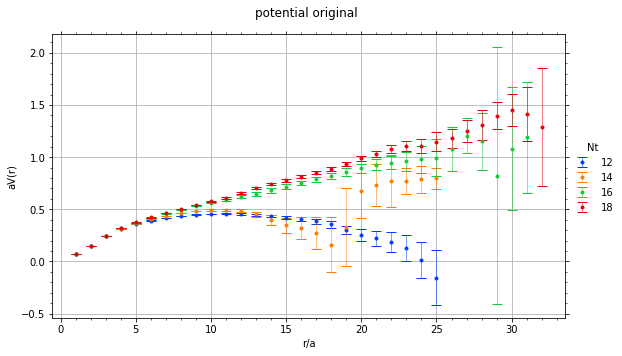

In [6]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt18/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 18}, 'constraints': {'r/a': (1, 32), 'T': (1, 8), 'smearing_step': (31, 31)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt16/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 16}, 'constraints': {'r/a': (1, 32), 'T': (1, 7), 'smearing_step': (31, 31)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt14/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 14}, 'constraints': {'r/a': (1, 25), 'T': (1, 6), 'smearing_step': (31, 31)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt12/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 12}, 'constraints': {'r/a': (1, 25), 'T': (1, 5), 'smearing_step': (31, 31)}}]
image_path = f'../../images/potential/smearing/su3/gloudynamics/nt18/potential_original'
image_name = f'potential_original'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['smearing_step'])
print(df)
df = df.groupby(df.index.names + ['r/a']).apply(fit.potential_fit_T_range, 4).reset_index(level=['r/a', 'Nt'])
print(df)
plots.plot_potential_single(df, 'r/a', 'aV(r)', 'Nt', 'r/a', 'aV(r)', 'potential original', image_path, f'potential_original_r=18', show_plot, err='err')

/home/ilya/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


                  r/a         V      V_err          a      a_err         b  \
Nt smearing_step                                                             
18 31               1  0.068013   0.000006   0.027494   0.000137  1.312799   
   31               1  0.067967   0.000005   0.026935   0.000123  1.286586   
   31               1  0.067871   0.000008   0.014872   0.000380  0.984308   
   31               2  0.145115   0.000024   0.061378   0.000239  1.034391   
   31               2  0.144949   0.000019   0.060476   0.000215  1.012677   
...               ...       ...        ...        ...        ...       ...   
   31              28 -0.619297   5.801303   2.514403   5.637024  0.082699   
   31              30 -1.593974   3.863178   3.717997   3.835038  0.074216   
   31              31 -9.538948  53.659502  11.713969  53.625623  0.022630   
   31              31 -6.196766  23.192419   8.374639  23.162059  0.032148   
   31              32 -9.933987  58.340863  12.174648  58.303913

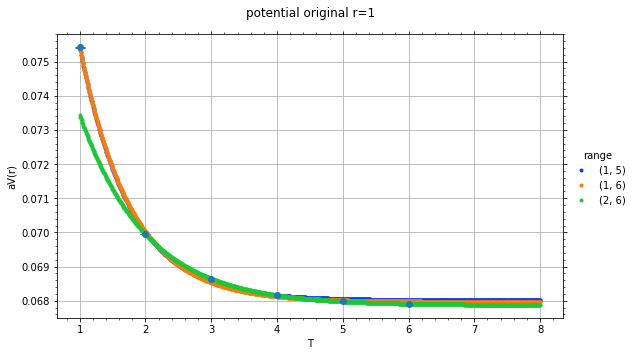

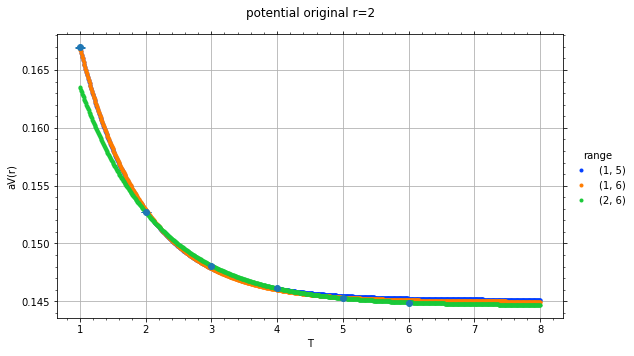

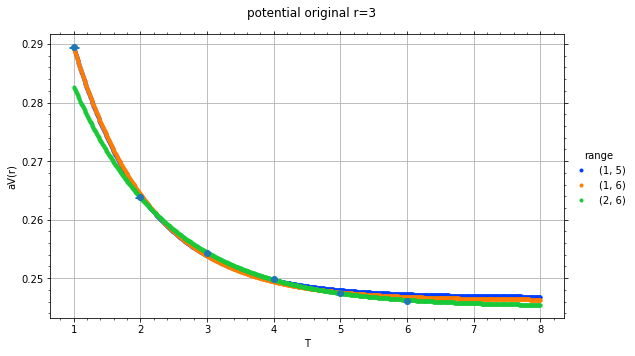

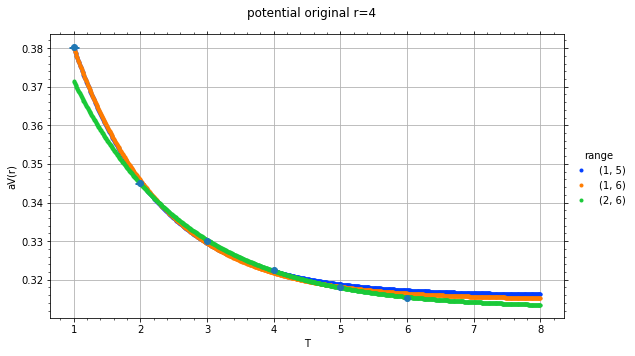

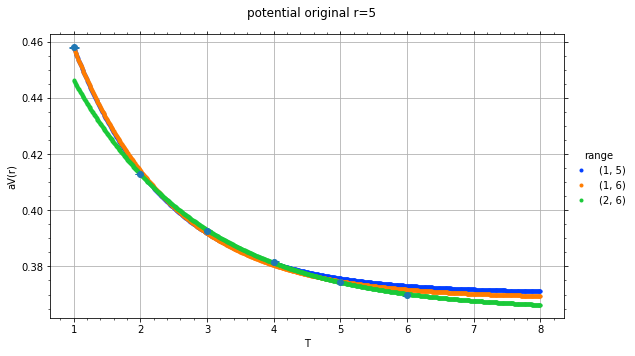

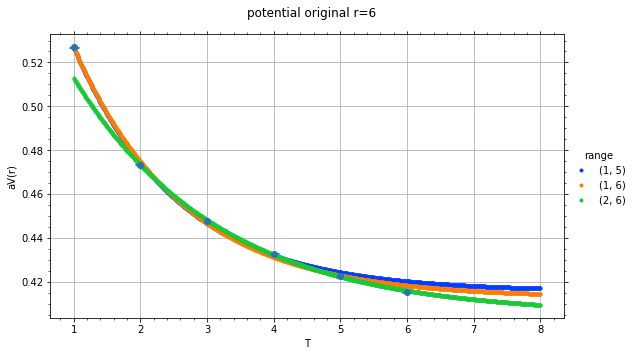

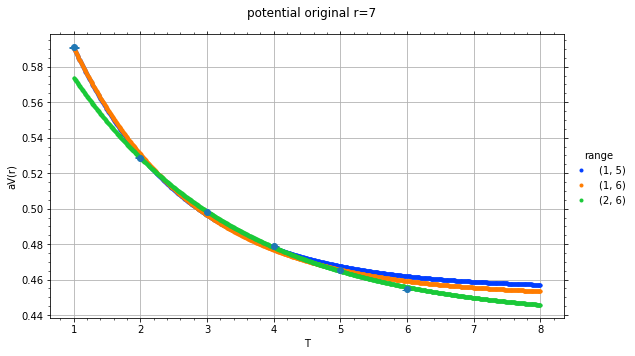

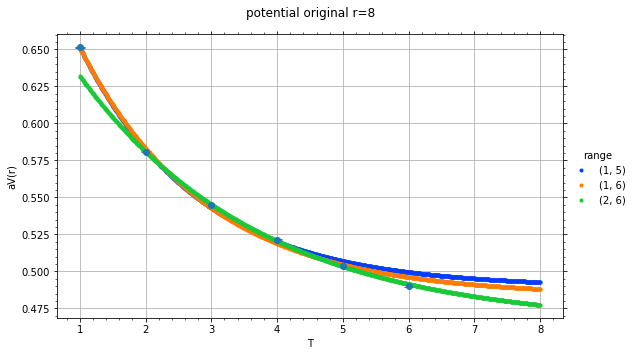

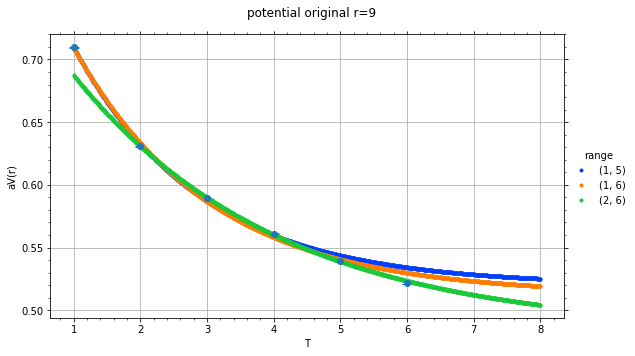

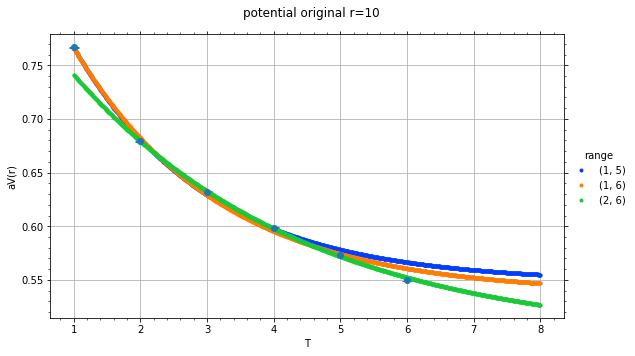

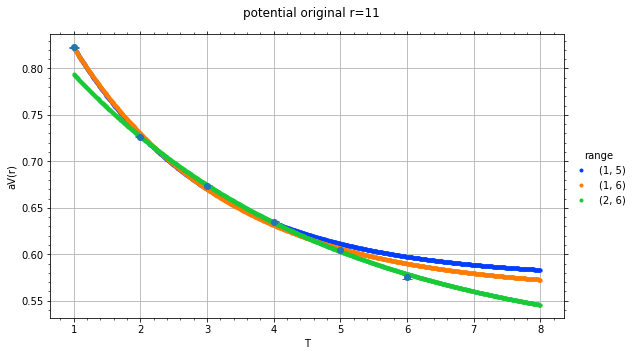

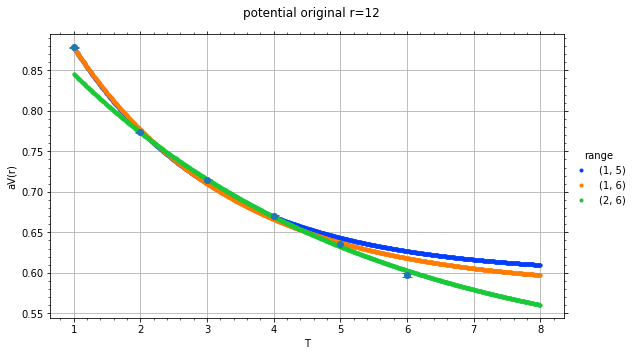

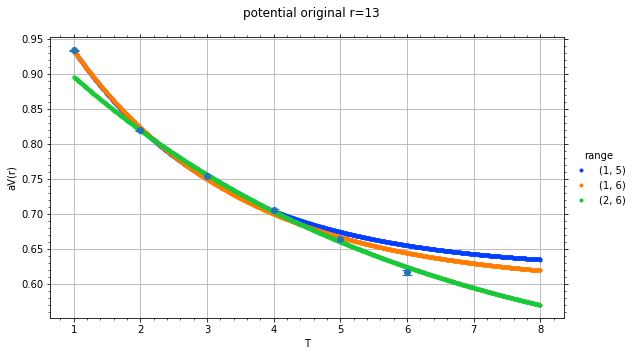

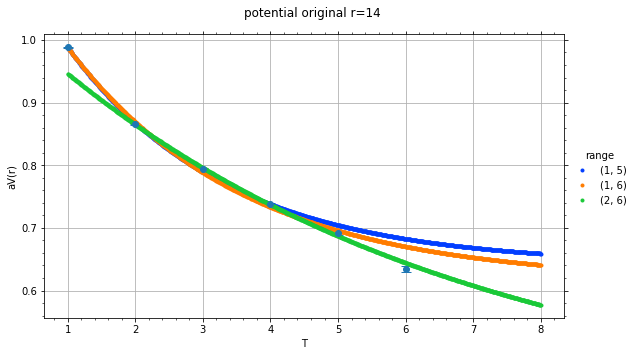

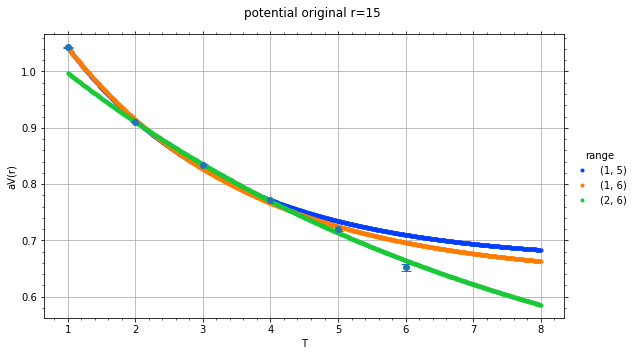

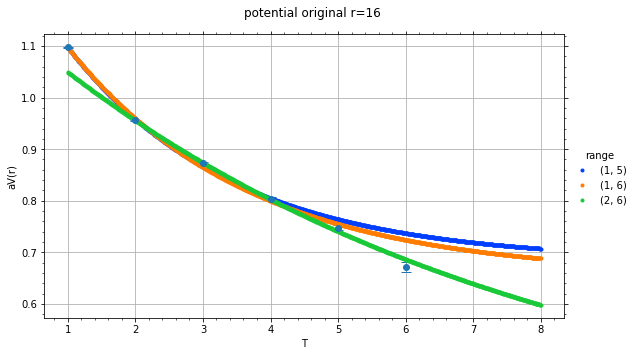

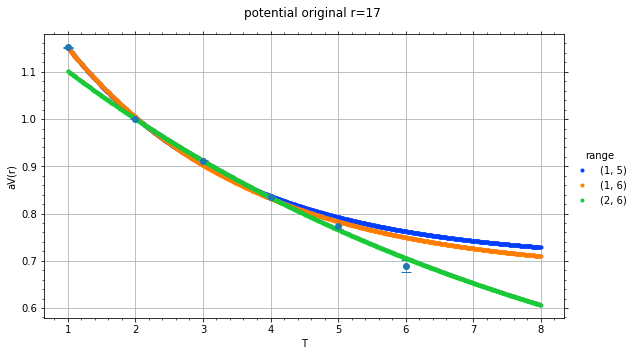

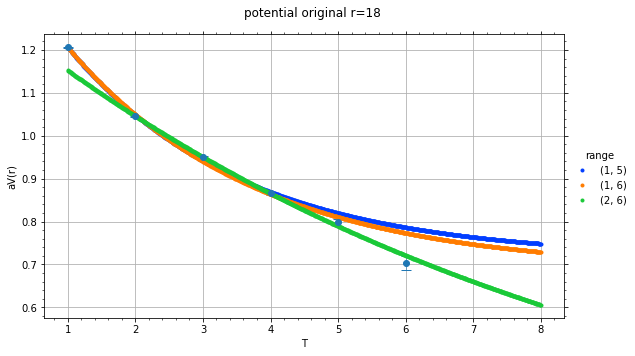

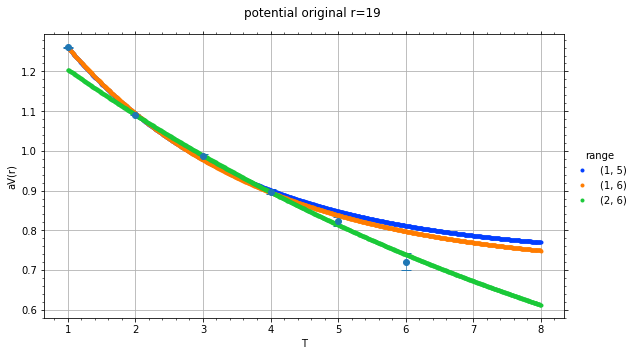

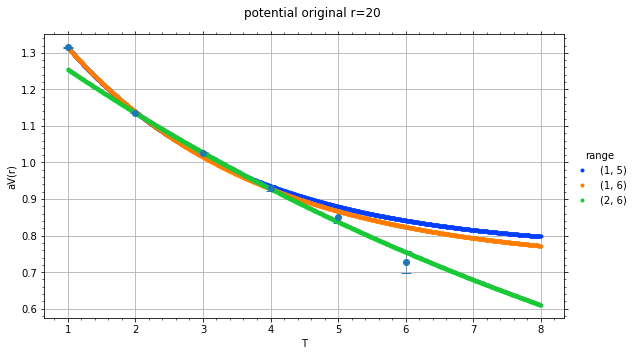

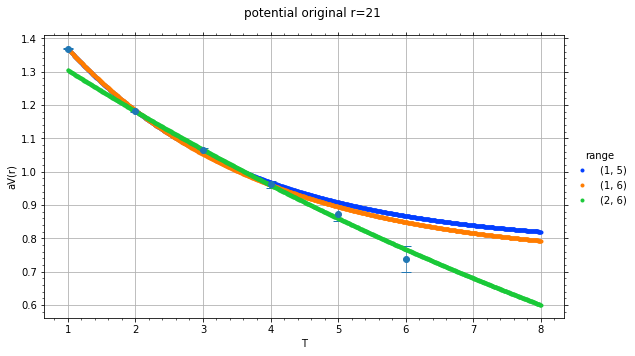

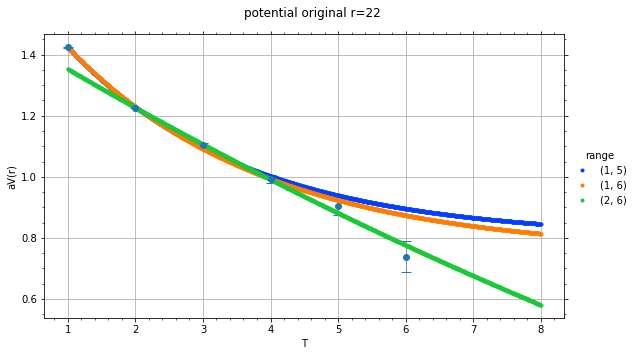

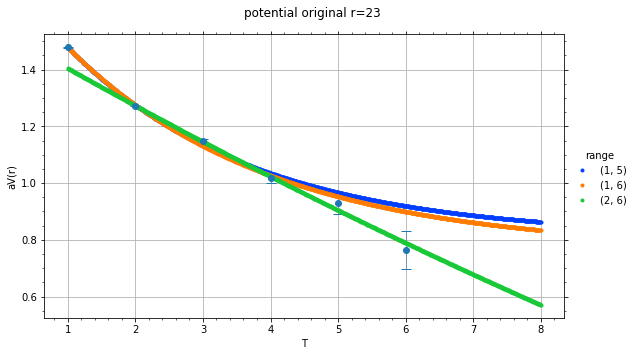

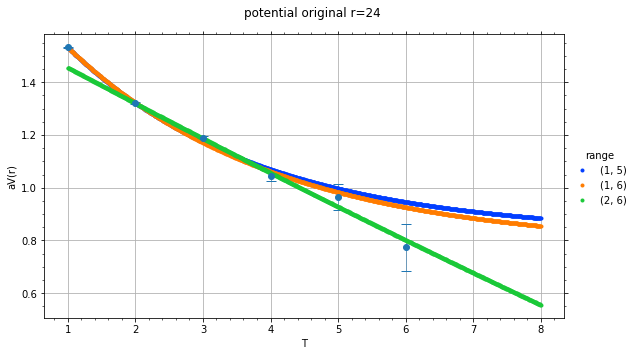

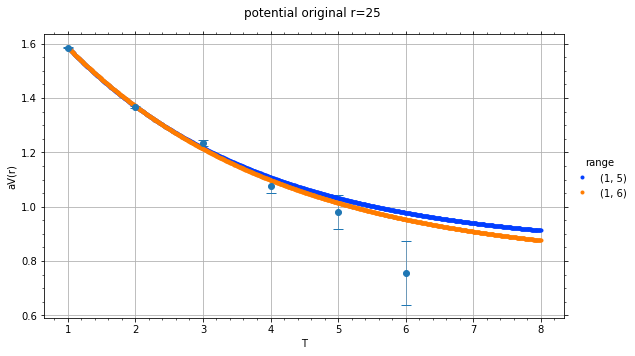

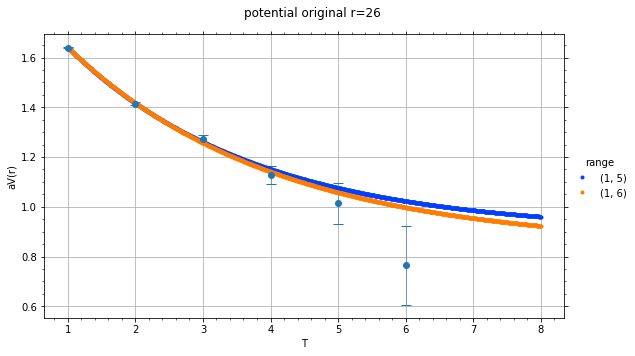

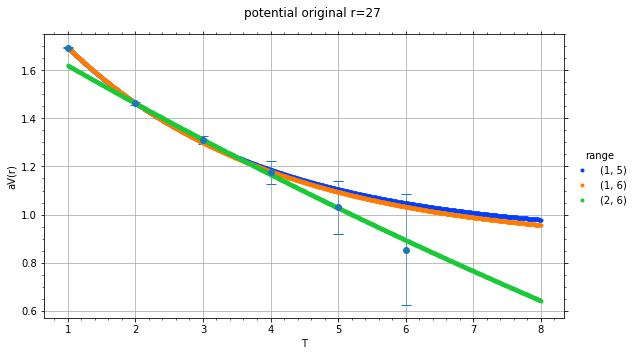

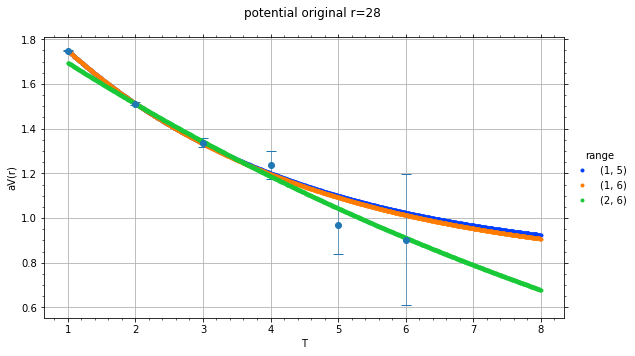

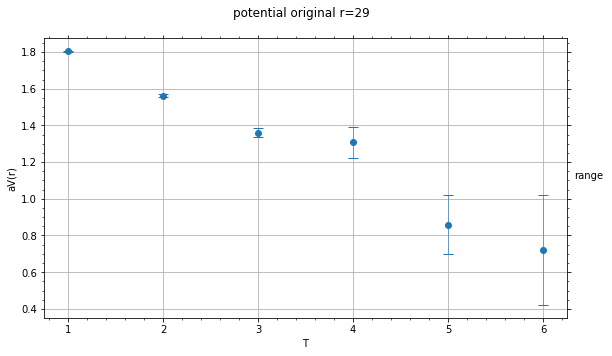

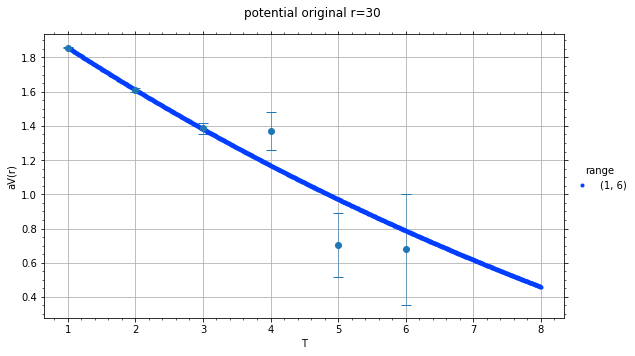

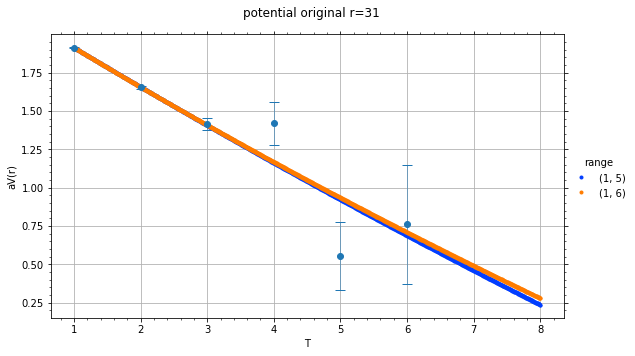

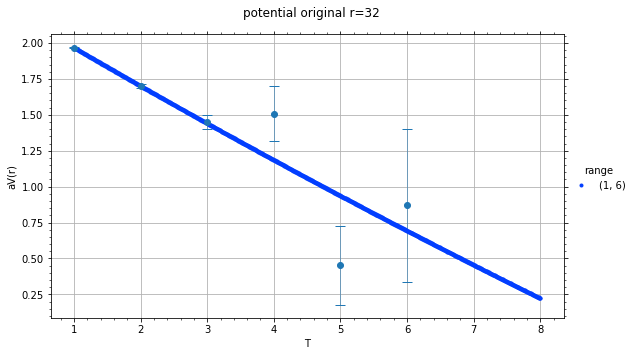

In [11]:
show_plot = True
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt14/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 18}, 'constraints': {'r/a': (1, 32), 'T': (1, 6), 'smearing_step': (31, 31)}}]
image_path = f'../../images/potential/smearing/su3/QCD/140MeV/nt14/T_fit/original'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['smearing_step'])
# df_fit = df.groupby(df.index.names + ['r/a']).apply(fit.make_fit, (1, 8), fit.func_exponent, ['V', 'a', 'b'], 'T', 'aV(r)', err_col='err')
df_fit = df.groupby(df.index.names + ['r/a']).apply(fit.make_fit_range, (1, 6), fit.func_exponent, 4, ['V', 'a', 'b'], 'T', 'aV(r)', err_col='err').reset_index(level=-1, drop=True).reset_index(level='r/a')
print(df_fit)
df_curve = df_fit.groupby(df.index.names + ['r/a', 'range']).apply(fit.make_fit_curve, fit.func_exponent, (1, 8), 'T', 'aV(r)', ['V', 'a', 'b']).reset_index(level=['r/a', 'range'])
print(df_curve)
df['range'] = 'data'
# df_curve['hue'] = 'T_fit'
# for r in df['r/a'].unique():
#     plots.plot_potential_single(df[df['r/a'] == r], 'T', 'aV(r)', 'err', 'range', 'T', 'aV(r)', 'potential original', image_path, f'potential_original_r=18', show_plot, df_fits=df_curve[df_curve['r/a'] == r])
for r in df['r/a'].unique():
    fg = plots.plot_potential_single(df_curve[df_curve['r/a'] == r], 'T', 'aV(r)', 'range', 'T', 'aV(r)', f'potential original r={r}', image_path, f'potential_original_r=18', False)
    fg.ax.errorbar(df[df['r/a'] == r]['T'], df[df['r/a'] == r]['aV(r)'], yerr=df[df['r/a'] == r]['err'], mfc=None, fmt='o', ms=6, capsize=5, lw=0.5, ls=None)
    plt.show()

                  r/a         V     V_err         a     a_err         b  \
Nt smearing_step                                                          
18 31               1  0.068201  0.000010  0.027714  0.000237  1.327440   
   31               1  0.068164  0.000008  0.027237  0.000215  1.305391   
   31               1  0.068139  0.000007  0.026912  0.000202  1.290305   
   31               1  0.068121  0.000006  0.026675  0.000194  1.279256   
   31               1  0.068077  0.000013  0.015155  0.000702  1.006714   
...               ...       ...       ...       ...       ...       ...   
   31              31  1.338137  0.313543  1.041431  0.155291  0.529707   
   31              32  1.392146  0.368328  1.069253  0.162942  0.552755   
   31              32  1.008989  0.909264  1.345943  0.788335  0.298800   
   31              32  1.049195  0.830731  1.311406  0.707169  0.313907   
   31              32  1.049195  0.830731  1.311406  0.707169  0.313907   

                     b_e

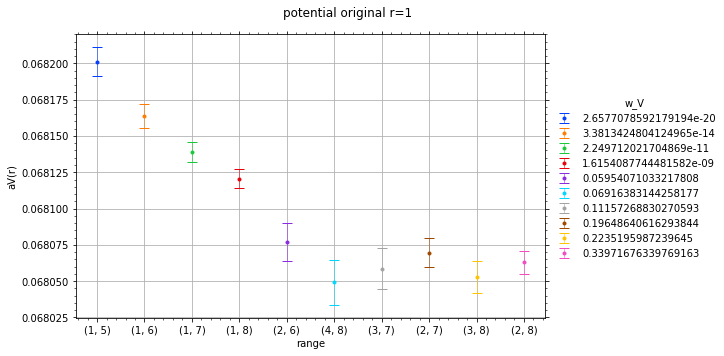

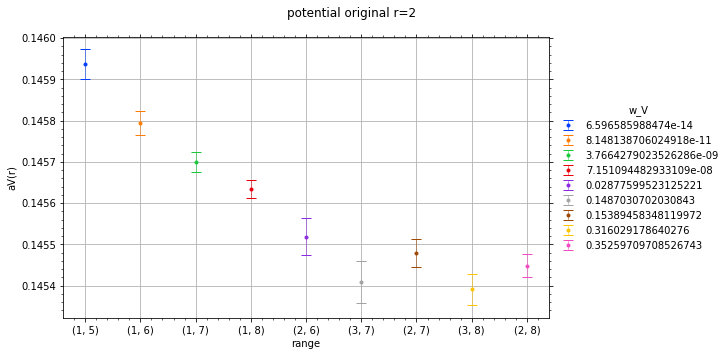

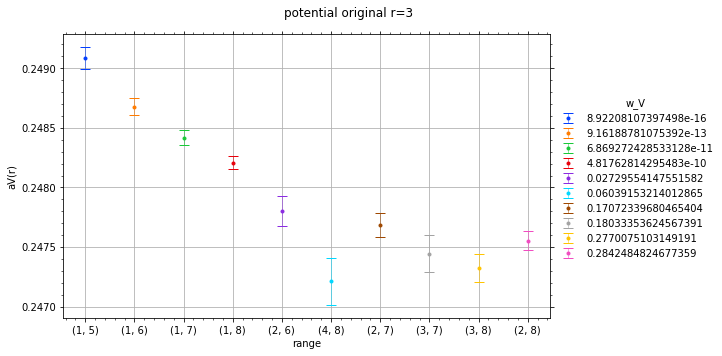

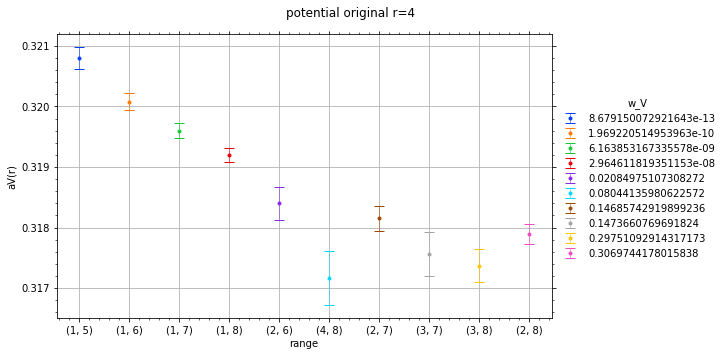

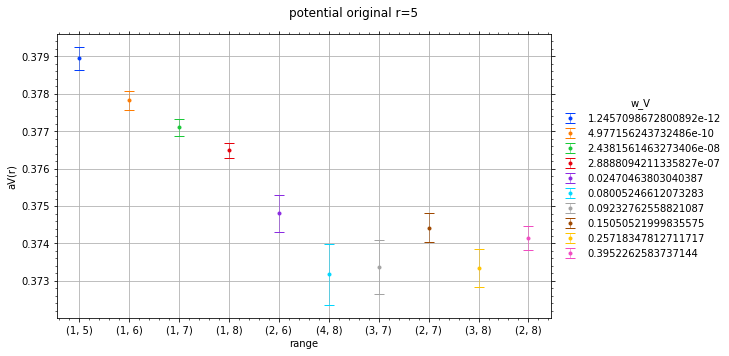

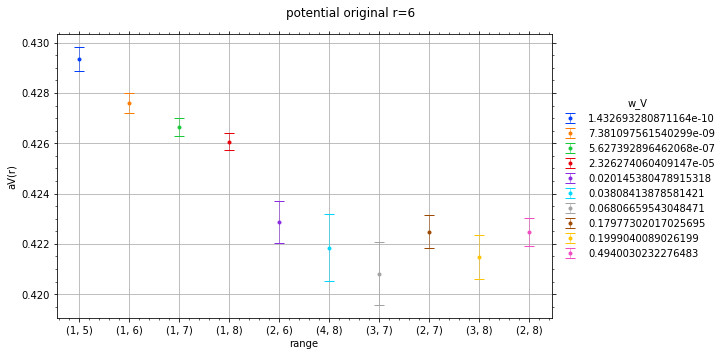

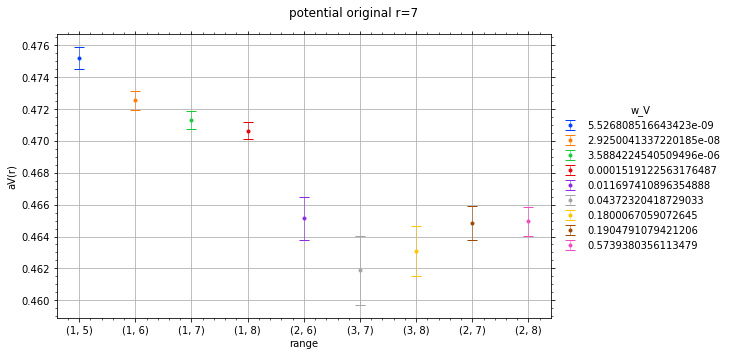

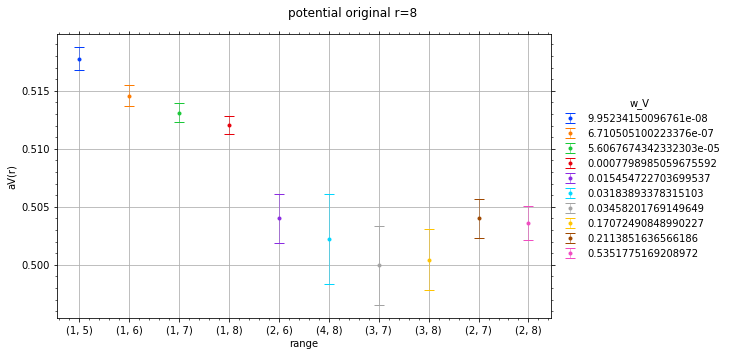

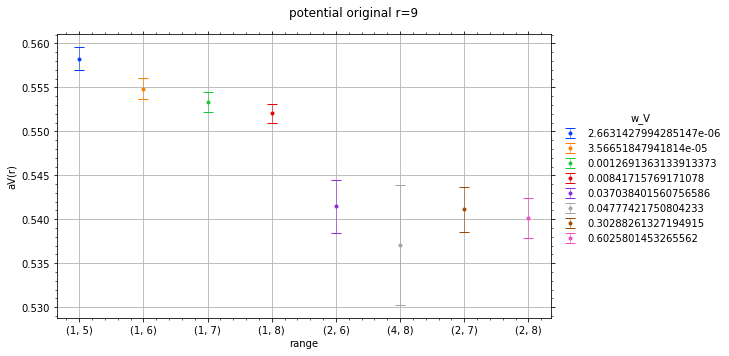

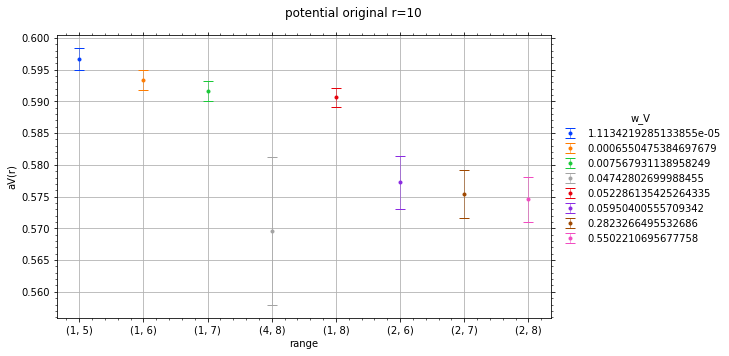

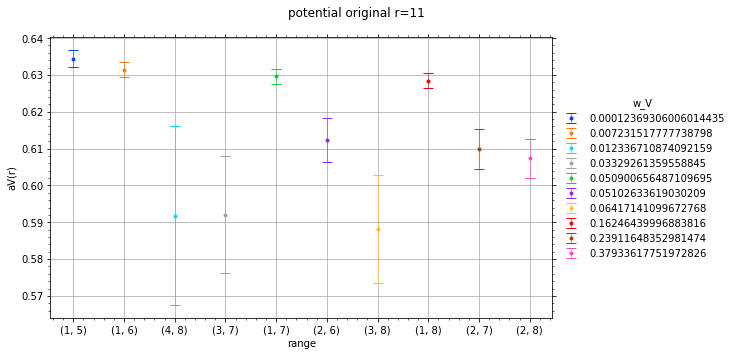

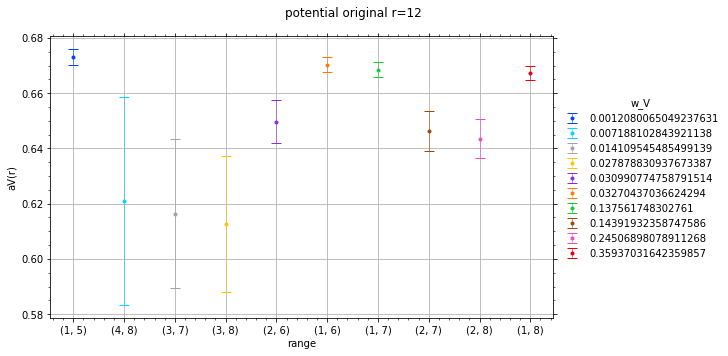

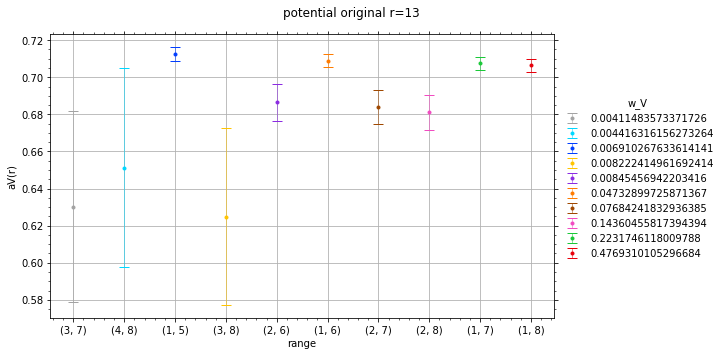

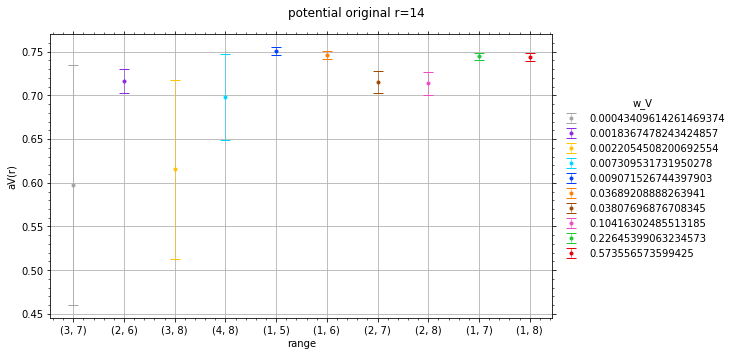

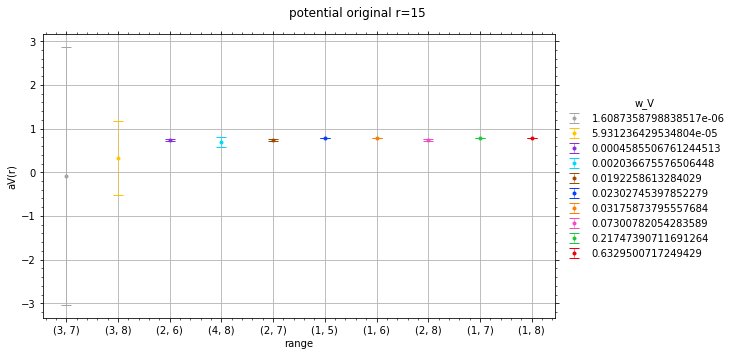

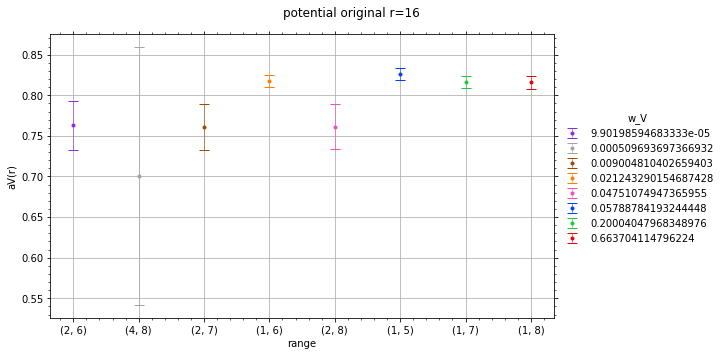

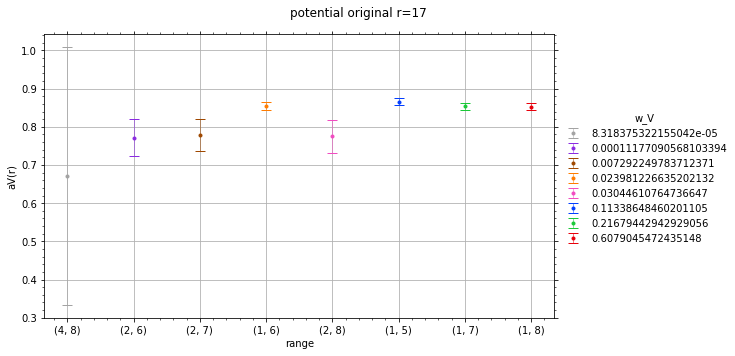

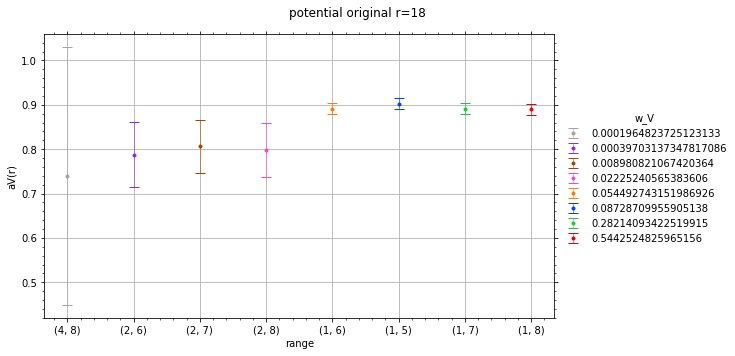

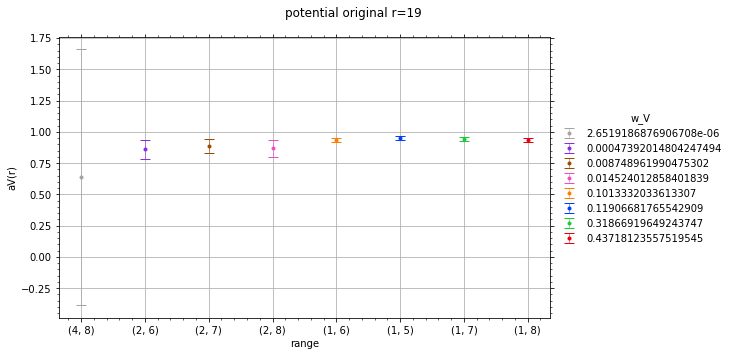

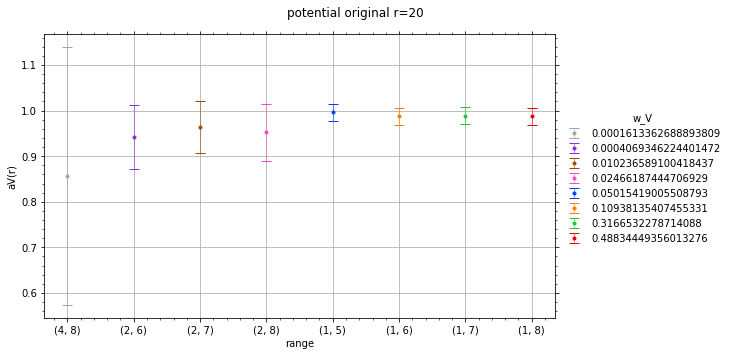

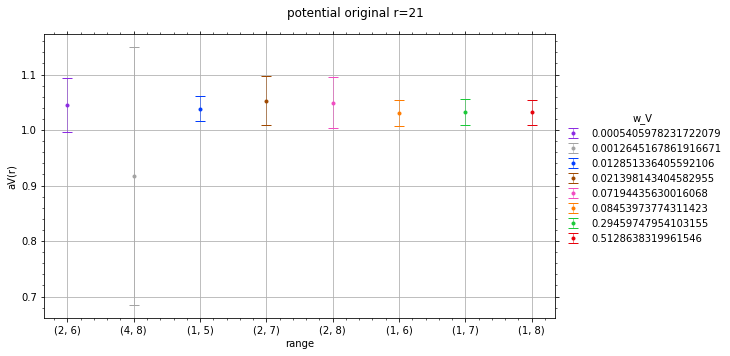

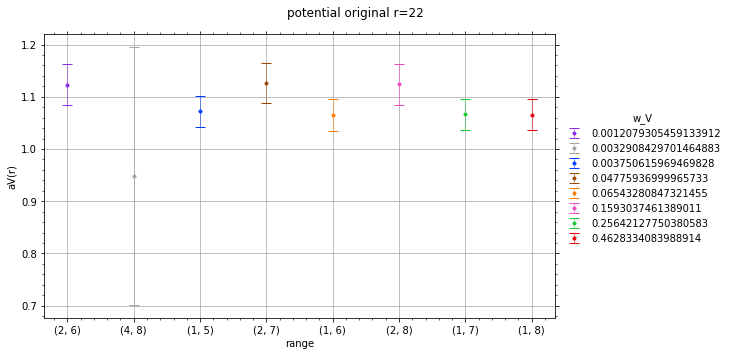

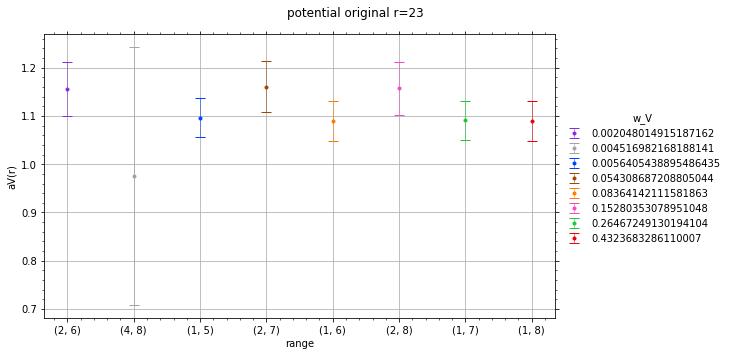

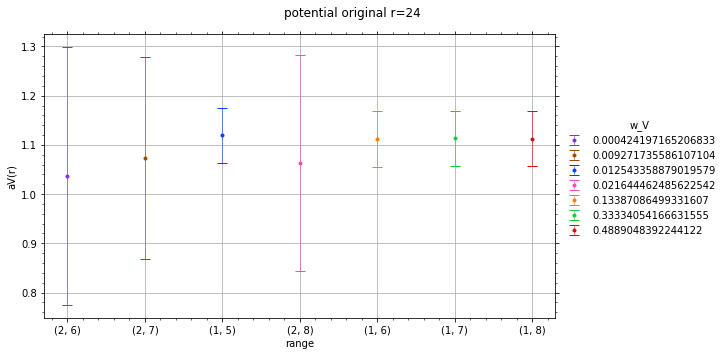

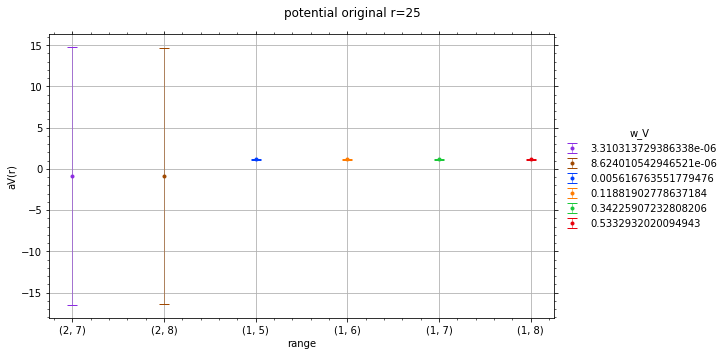

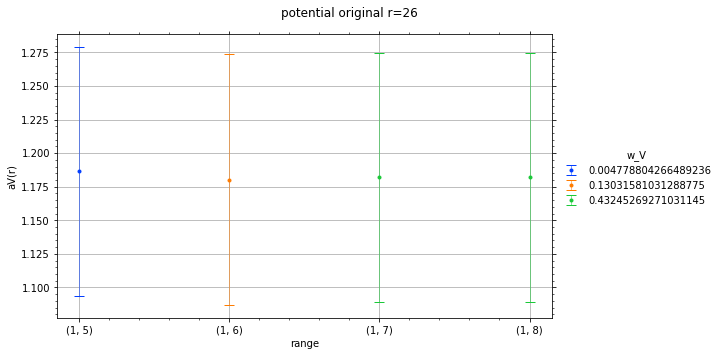

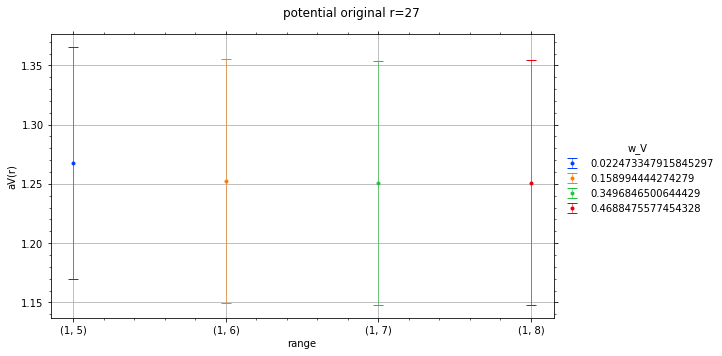

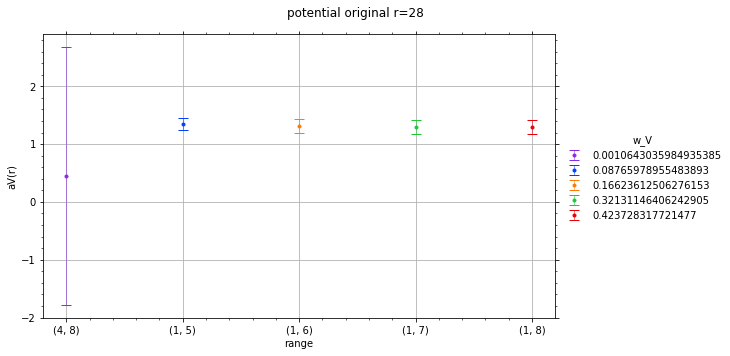

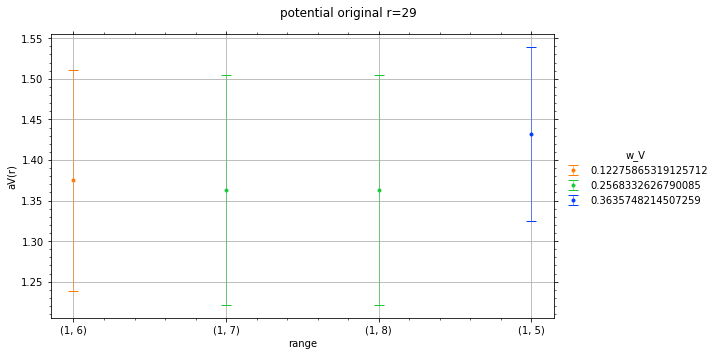

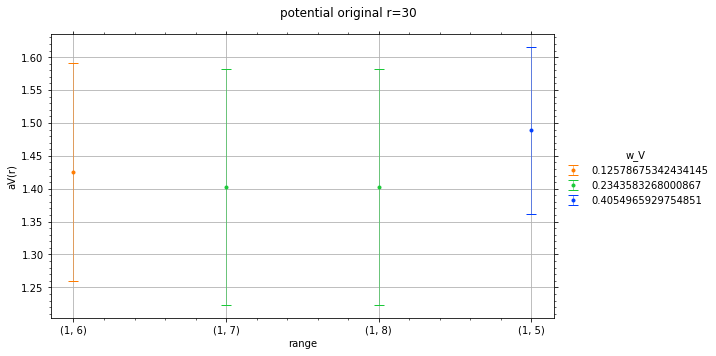

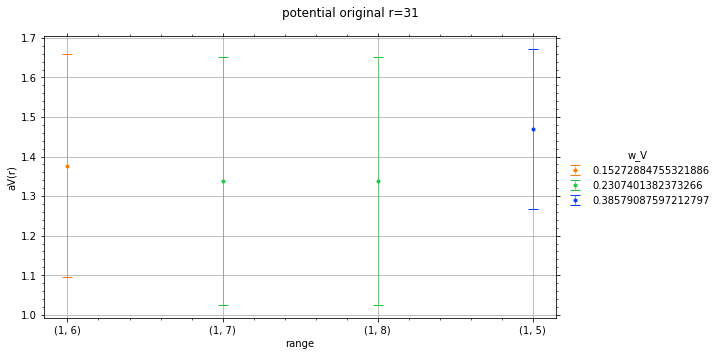

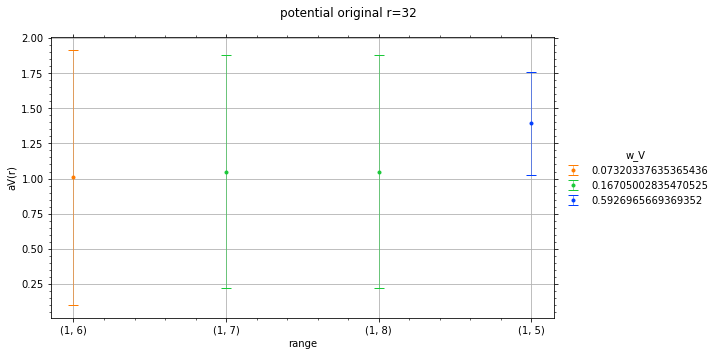

In [4]:
print(df_fit)
image_path = f'../../images/potential/smearing/su3/QCD/140MeV/nt18/extracted_potential_range/original'
for r in df_fit['r/a'].unique():
    plots.plot_potential_single(df_fit[df_fit['r/a'] == r], 'range', 'V', 'w_V', 'range', 'aV(r)', f'potential original r={r}', image_path, f'potential_original r={r}', True, err='V_err')

In [5]:
# make T_fits for original potential from QCD data
def T_fit_QCD(Nt, fit_range, smearing, smearing_step):
    show_plot = False
    paths = [{'path': f'../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt{Nt}/{smearing}/potential_original.csv',
              'parameters': {'Nt': Nt}, 'constraints': {'smearing_step': (smearing_step, smearing_step)}}]
    image_path = f'../../images/potential_wilson/T_fit/su3/QCD/140MeV/nt{Nt}/{smearing}/original'
    df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['smearing_step'])
    df_fit = df.groupby(df.index.names + ['r/a']).apply(fit.make_fit, fit_range, fit.func_exponent, ['V', 'a', 'b'], 'T', 'aV(r)', err_col='err')
    df_curve = df_fit.groupby(df.index.names + ['r/a']).apply(fit.make_fit_curve, fit.func_exponent, fit_range, 'T', 'aV(r)', ['V', 'a', 'b']).reset_index(level='r/a')
    df['hue'] = 'T_fit'
    df_curve['hue'] = 'T_fit'
    for r in df['r/a'].unique():
        plots.plot_potential_single(df[df['r/a'] == r], 'T', 'aV(r)', 'err', 'hue', 'T', 'aV(r)', f'potential original T fit r={r}', image_path, f'potential_original_r={r}', show_plot, df_fits=df_curve[df_curve['r/a'] == r])

In [ ]:
T_fit_QCD(18, (2, 8), 'HYP1_alpha=1_1_0.5_APE_alpha=0.6', 31)
T_fit_QCD(16, (2, 7), 'HYP1_alpha=1_1_0.5_APE_alpha=0.6', 31)

In [ ]:
T_fit_QCD(14, (2, 6), 'HYP1_alpha=1_1_0.5_APE_alpha=0.6', 31)
T_fit_QCD(12, (2, 5), 'HYP1_alpha=1_1_0.5_APE_alpha=0.6', 31)

In [ ]:
T_fit_QCD(10, (2, 4), 'HYP1_alpha=1_1_0.5_APE_alpha=0.6', 31)

                  r/a  copy  T     aV(r)       err
Nt smearing_step                                  
18 31               1     0  1  0.075556  0.000014
   31               1     0  2  0.070102  0.000014
   31               1     0  3  0.068810  0.000014
   31               1     0  4  0.068356  0.000013
   31               1     0  5  0.068175  0.000013
...               ...   ... ..       ...       ...
   31              32     0  4  1.365843  0.259270
   31              32     0  5  1.482140  1.001398
   31              32     0  6 -0.584842  1.047588
   31              32     0  7  1.797593  2.871510
   31              32     0  8  0.000000  0.000000

[256 rows x 5 columns]
                               V     V_err         a     a_err         b  \
Nt smearing_step r/a                                                       
18 31            1   0  0.068121  0.000006  0.026675  0.000194  1.279256   
                 2   0  0.145634  0.000021  0.059586  0.000320  1.006283   
         

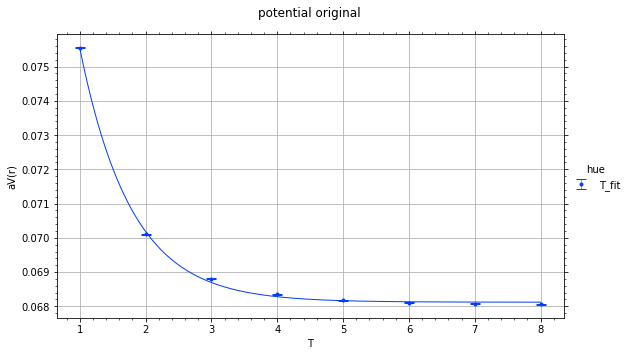

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


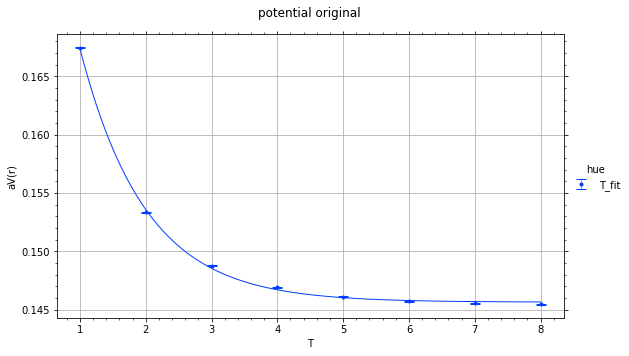

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


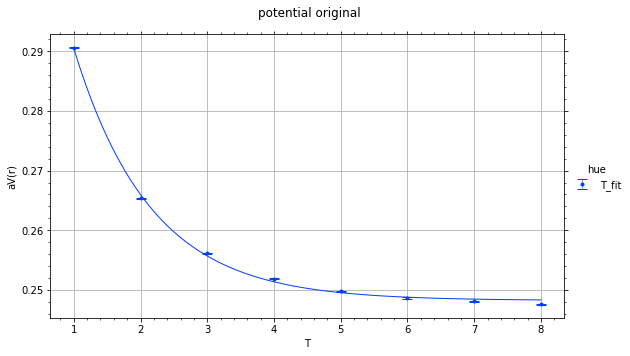

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


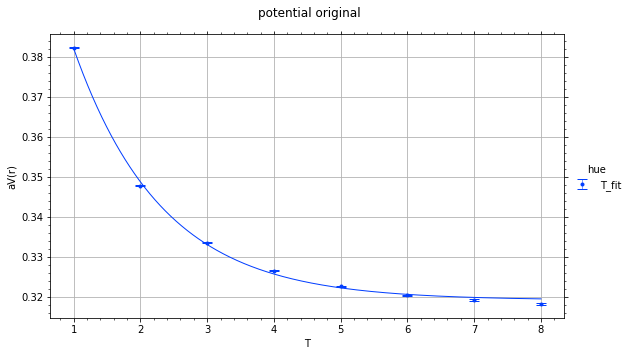

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


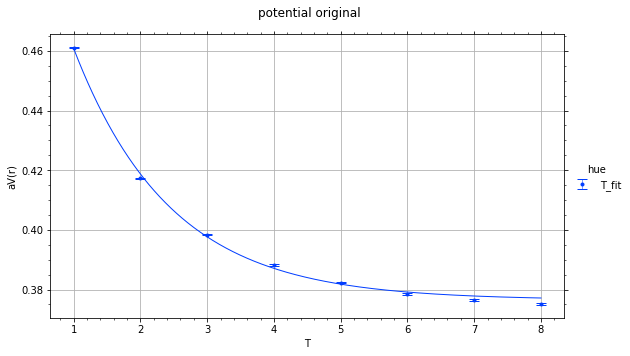

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


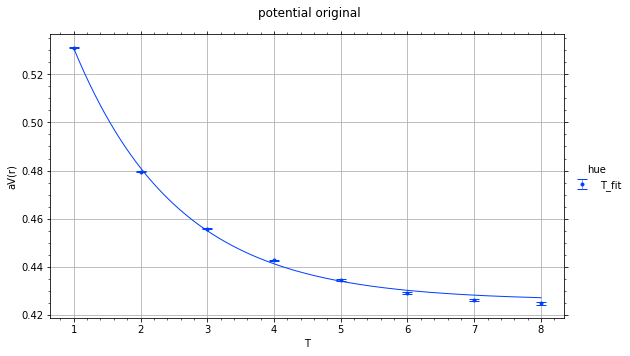

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


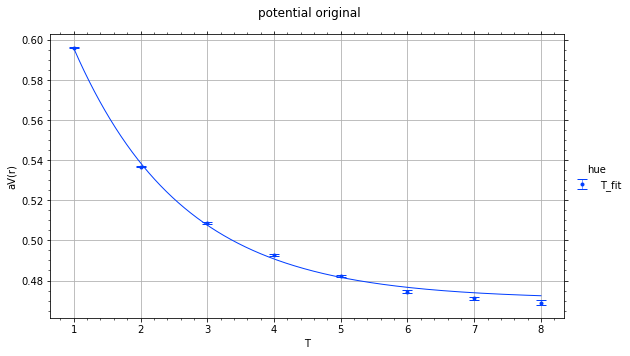

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


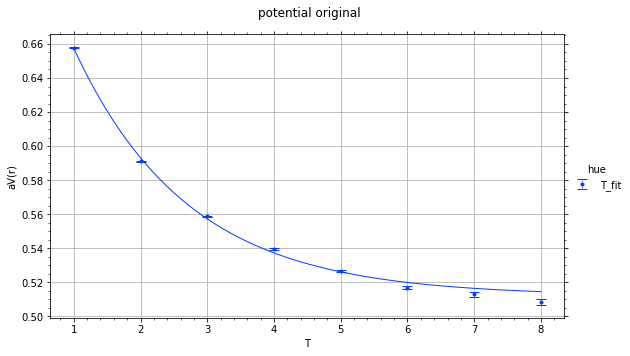

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


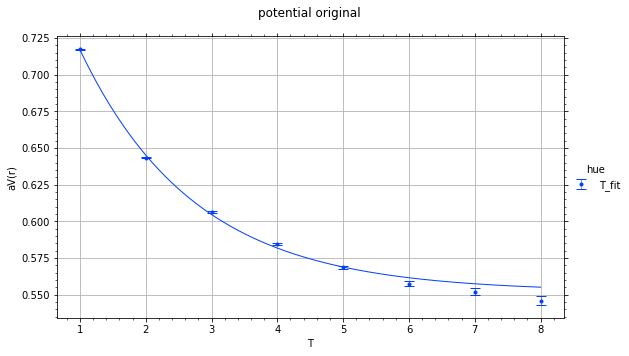

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


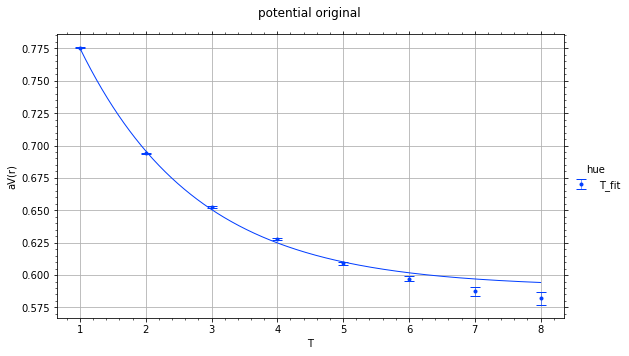

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


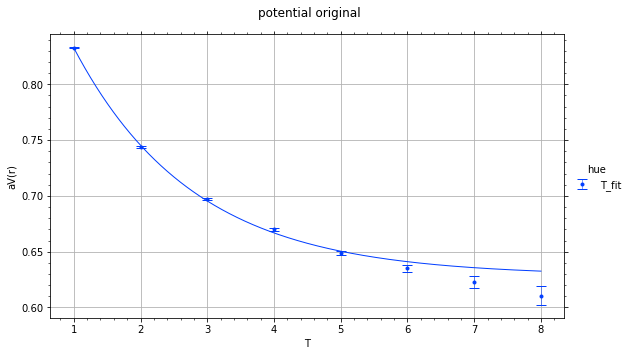

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


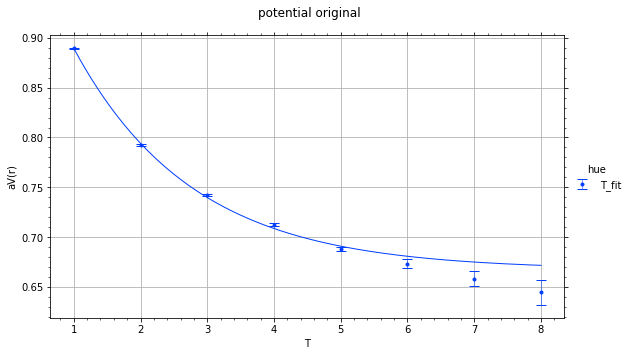

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


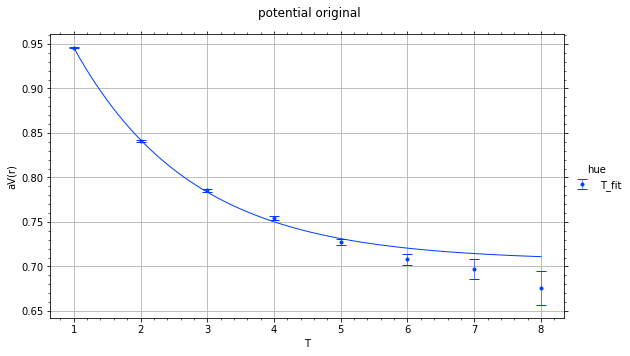

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


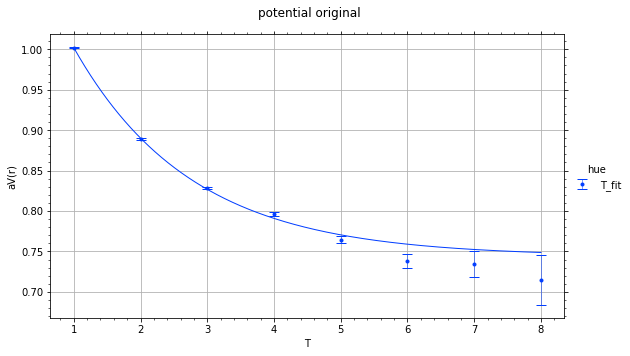

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


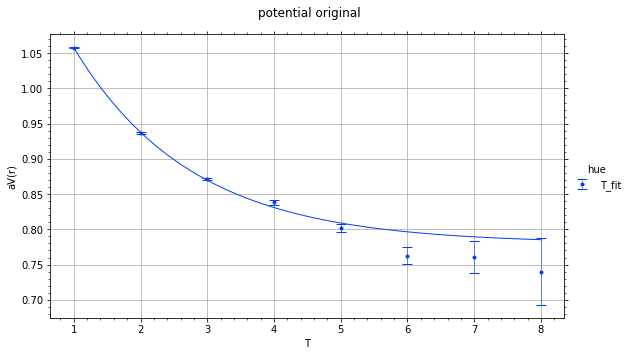

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


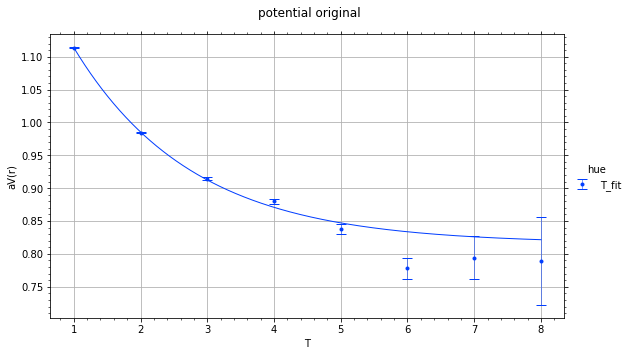

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


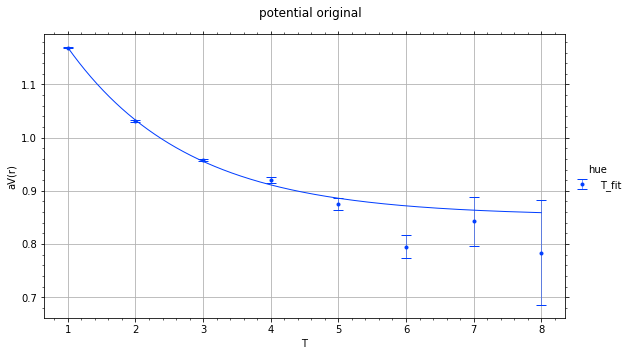

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


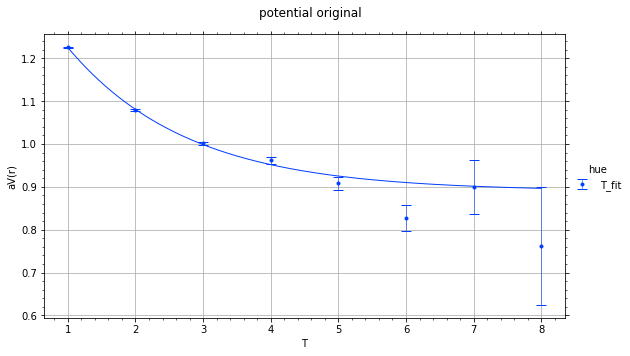

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


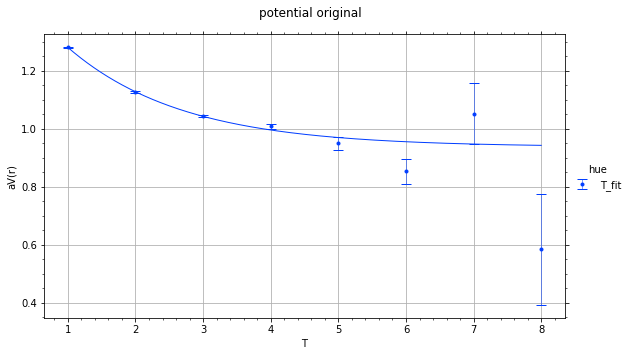

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


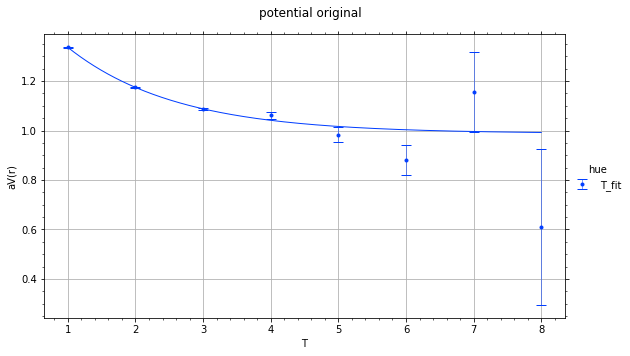

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


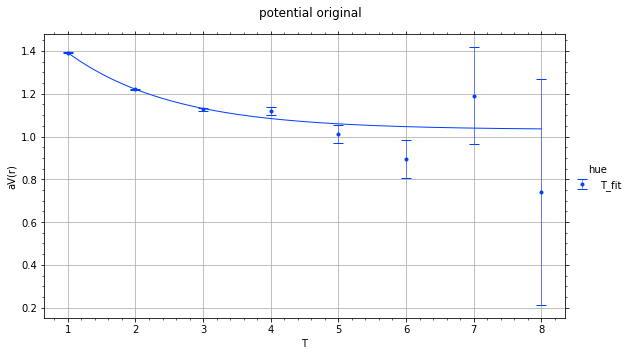

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


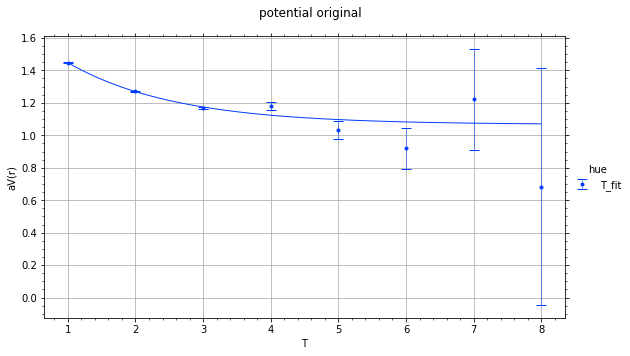

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


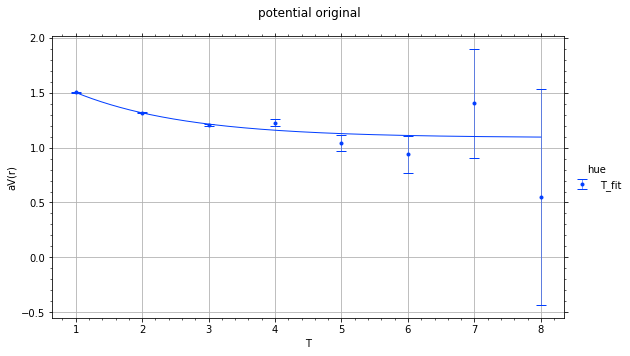

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


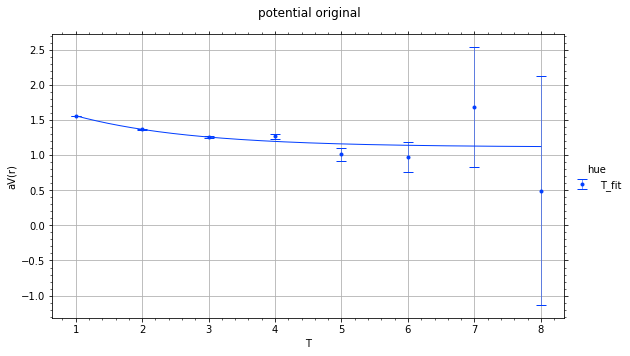

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


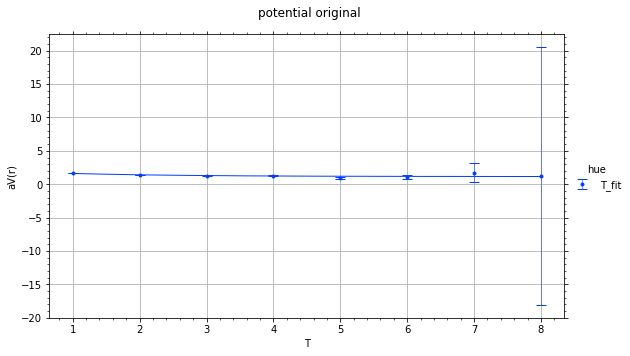

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


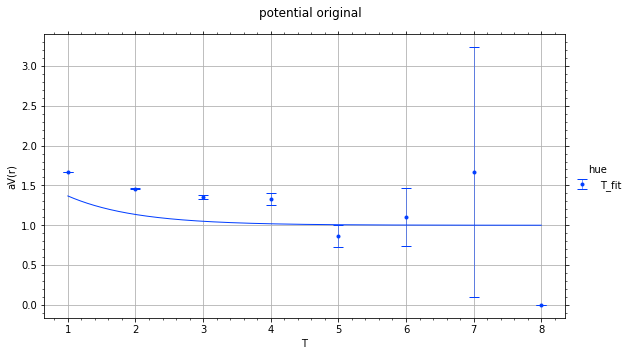

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


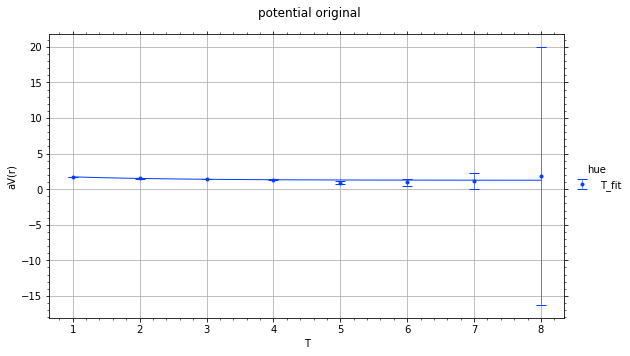

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


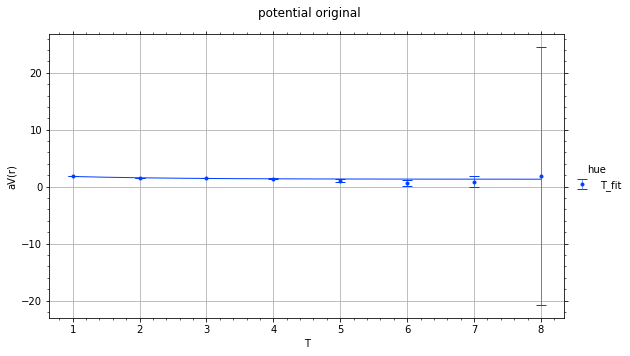

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


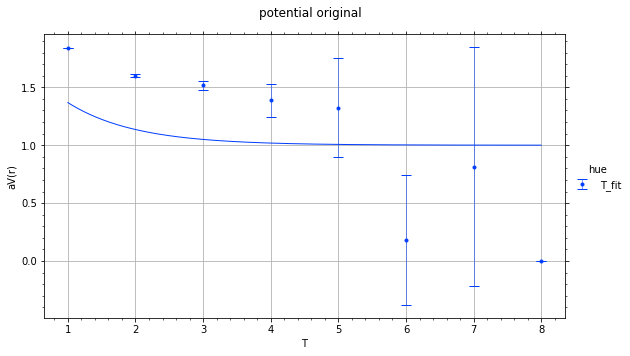

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


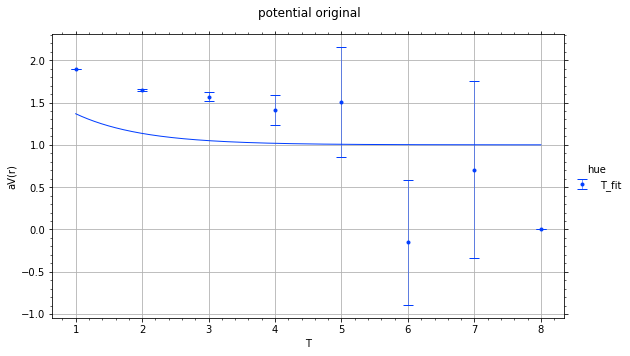

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


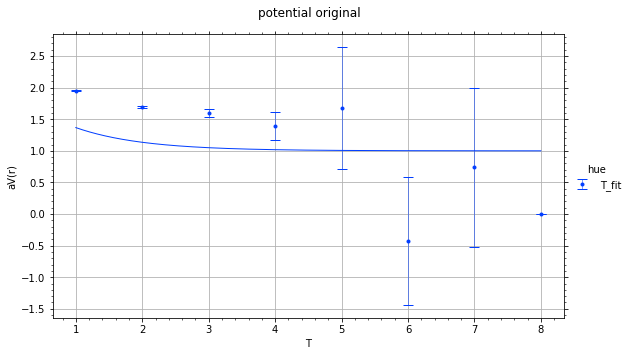

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


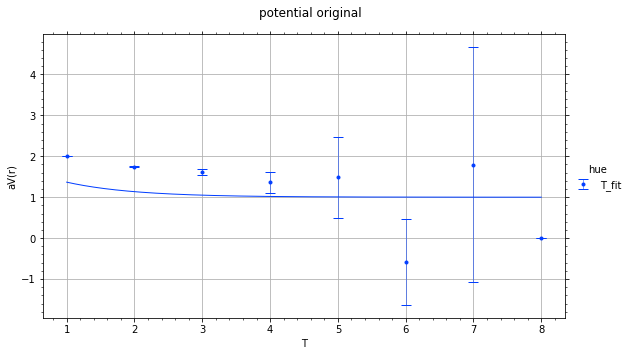

../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original/potential_original_r=18


In [17]:
show_plot = True
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt18/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 18}, 'constraints': {'r/a': (1, 32), 'T': (1, 8), 'smearing_step': (31, 31)}}]
image_path = f'../../images/potential/smearing/su3/QCD/140MeV/nt18/potential_original'
image_name = f'potential_original'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['smearing_step'])
df_fit = df.groupby(df.index.names + ['r/a']).apply(fit.make_fit, (1, 8), fit.func_exponent, ['V', 'a', 'b'], 'T', 'aV(r)', err_col='err')
df_curve = df_fit.groupby(df.index.names + ['r/a']).apply(fit.make_fit_curve, fit.func_exponent, (1, 8), 'T', 'aV(r)', ['V', 'a', 'b']).reset_index(level='r/a')
df['hue'] = 'T_fit'
df_curve['hue'] = 'T_fit'
for r in df['r/a'].unique():
    plots.plot_potential_single(df[df['r/a'] == r], 'T', 'aV(r)', 'err', 'hue', 'T', 'aV(r)', 'potential original', image_path, f'potential_original_r=18', show_plot, df_fits=df_curve[df_curve['r/a'] == r])

                  r/a  copy  T     aV(r)       err
Nt smearing_step                                  
18 31               1     0  1  0.075556  0.000014
   31               1     0  2  0.070102  0.000014
   31               1     0  3  0.068810  0.000014
   31               1     0  4  0.068356  0.000013
   31               1     0  5  0.068175  0.000013
...               ...   ... ..       ...       ...
   31              32     0  4  1.365843  0.259270
   31              32     0  5  1.482140  1.001398
   31              32     0  6 -0.584842  1.047588
   31              32     0  7  1.797593  2.871510
   31              32     0  8  0.000000  0.000000

[256 rows x 5 columns]
                    r/a     T     aV(r)       err
Nt smearing_step                                 
18 31            0    1  None  0.068121  0.000006
                 0    2  None  0.145634  0.000021
                 0    3  None  0.248208  0.000056
                 0    4  None  0.319195  0.000114
             

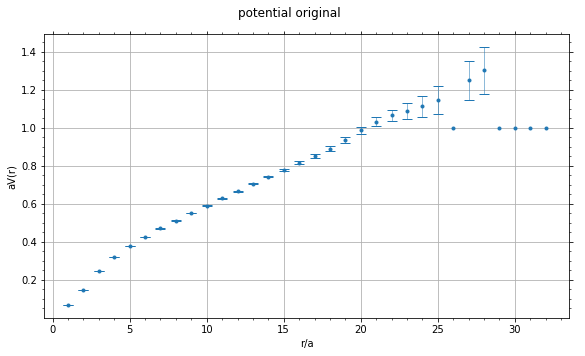

../../images/potential/smearing/su3/gloudynamics/nt18/potential_original/potential_original_r=18


In [8]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt18/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 18}, 'constraints': {'r/a': (1, 32), 'T': (1, 8), 'smearing_step': (31, 31)}}]
image_path = f'../../images/potential/smearing/su3/gloudynamics/nt18/potential_original'
image_name = f'potential_original'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['smearing_step'])
print(df)
df = df.groupby(df.index.names + ['r/a']).apply(fit.potential_fit_T, (1, 8)).reset_index(level='r/a')
print(df)
plots.plot_potential_single(df, 'r/a', 'aV(r)', 'err', None, 'r/a', 'aV(r)', 'potential original', image_path, f'potential_original_r=18', show_plot)

In [4]:
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.0}, 'constraints': {'r/a': (1, 12), 'T': (1, 10)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/28^4/beta6.1/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.1}, 'constraints': {'r/a': (1, 14), 'T': (1, 10)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.2}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.3}, 'constraints': {'r/a': (1, 18), 'T': (1, 10)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/40^4/beta6.4/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.4}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}}]
df = potential_data.get_potantial_df(paths)
print(df)
print(df.loc[6.0])

             copy     aV(r)       err
beta r/a T                           
6.0  1   1    0.0  0.055886  0.000006
         2    0.0  0.053352  0.000005
         3    0.0  0.052612  0.000005
         4    0.0  0.052341  0.000005
         5    0.0  0.052231  0.000005
...           ...       ...       ...
6.4  20  6    NaN  0.462712  0.000789
         7    NaN  0.458779  0.000958
         8    NaN  0.454773  0.001230
         9    NaN  0.454082  0.001542
         10   NaN  0.456591  0.002123

[800 rows x 3 columns]
        copy     aV(r)       err
r/a T                           
1   1    0.0  0.055886  0.000006
    2    0.0  0.053352  0.000005
    3    0.0  0.052612  0.000005
    4    0.0  0.052341  0.000005
    5    0.0  0.052231  0.000005
...      ...       ...       ...
12  6    0.0  0.707689  0.006575
    7    0.0  0.701103  0.011319
    8    0.0  0.711226  0.019971
    9    0.0  0.657988  0.033848
    10   0.0  0.762444  0.065973

[120 rows x 3 columns]


In [10]:
def append_multiindex(df, values):
    for key, value in values.items():
        df[key] = value
    # print(df)
    # print(list(values.keys()))
    # print(df.set_index(list(values.keys()), append=True))
    return df.set_index(list(values.keys()), append=True)

df = []
for i in ['foo', 'bar']:
    for j in [1, 2, 3]:
        df.append(pd.DataFrame({'A': [5, 6], 'B': np.random.randn(2)}))
        df[-1] = append_multiindex(df[-1], {'level_i': i, 'level_j': j})
df = pd.concat(df)
df = df.reset_index(level=0, drop=True)
# df = df.set_index('A', append=True)
df = df.sort_index()
df.groupby(['level_i', 'A']).apply(print)
print(df)
print('loc', df.loc[(df.index.get_level_values('level_j') < 3) & (df.index.get_level_values('level_j') > 1)])
print(df[df.index.isin(['foo'], level='level_i')])
print(df.loc['foo'])

                 A         B
level_i level_j             
bar     1        5 -1.225750
        2        5 -0.958231
        3        5 -0.829240
                 A         B
level_i level_j             
bar     1        6 -0.128747
        2        6 -1.884983
        3        6  0.556743
                 A         B
level_i level_j             
foo     1        5 -0.487856
        2        5  0.334973
        3        5  1.342667
                 A         B
level_i level_j             
foo     1        6  0.379037
        2        6  0.515669
        3        6  1.160602
                 A         B
level_i level_j             
bar     1        5 -1.225750
        1        6 -0.128747
        2        5 -0.958231
        2        6 -1.884983
        3        5 -0.829240
        3        6  0.556743
foo     1        5 -0.487856
        1        6  0.379037
        2        5  0.334973
        2        6  0.515669
        3        5  1.342667
        3        6  1.160602
loc           

In [11]:
def read_wilson_loops(path, conf_range):
    df = []
    for i in range(*conf_range):
        conf_path = f'{path}/wilson_loop_{i:04}'
        if (os.path.isfile(conf_path)):
            df.append(pd.read_csv(conf_path))
            df[-1]['conf'] = i
    return pd.concat(df)

In [12]:
def generate_ranges(min, max):
    ranges = []
    for i in range(min, max-3):
        for j in range(i + 4, max+1):
            ranges.append((i, j))
    return ranges

     smearing_step  r/a  copy  T     aV(r)       err      beta potential_type
0               31    1     0  1  0.075556  0.000014  beta=6.0       original
1               31    1     0  2  0.070102  0.000014  beta=6.0       original
2               31    1     0  3  0.068810  0.000014  beta=6.0       original
3               31    1     0  4  0.068356  0.000013  beta=6.0       original
4               31    1     0  5  0.068175  0.000013  beta=6.0       original
..             ...  ...   ... ..       ...       ...       ...            ...
243             31   31     0  4  1.394447  0.217598  beta=6.0       original
244             31   31     0  5  1.676465  0.965615  beta=6.0       original
245             31   31     0  6 -0.422603  1.015588  beta=6.0       original
246             31   31     0  7  0.737278  1.262867  beta=6.0       original
247             31   31     0  8  0.000000  0.000000  beta=6.0       original

[248 rows x 8 columns]
   smearing_step  r/a  copy      beta po

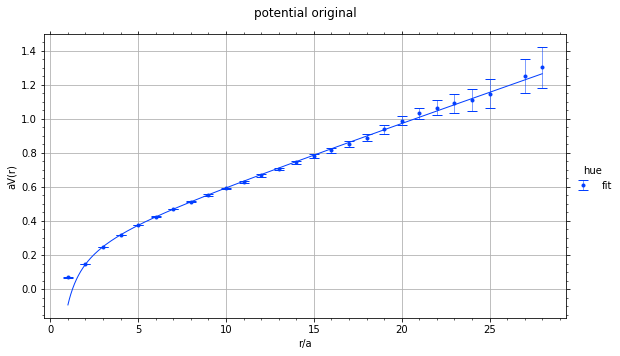

../../images/potential/smearing/su3/gloudynamics/nt18/potential_original/potential_original_r=18


In [18]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt18/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 18}, 'constraints': {'r/a': (1, 31), 'T': (1, 8), 'smearing_step': (31, 31)}}]
image_path = f'../../images/potential/smearing/su3/gloudynamics/nt18/potential_original'
image_name = f'potential_original_smearing'
data = potential_data.get_potantial_df(paths)
print(data)
# data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T_range_best, (1, 8)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T, (1, 8)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
data = data.drop('T', axis = 1)
data = data[data['aV(r)'] != 0]
data = data[data['aV(r)'] != 1]
data = data.drop('chi_square', axis = 1)
print(data)
df_fit = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.potential_fit_data, (2, 25), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
fit_params = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.make_fit, (2, 25), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col=None)\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
data['hue'] = 'fit'
df_fit['hue'] = 'fit'
plots.plot_potential_single(data, 'r/a', 'aV(r)', 'err', 'hue', 'r/a', 'aV(r)', 'potential original', image_path, f'potential_original_r=18', show_plot, df_fits=df_fit)

     smearing_step  r/a  copy  T     aV(r)       err      beta potential_type
0               31    1     0  1  0.075556  0.000014  beta=6.0       original
1               31    1     0  2  0.070102  0.000014  beta=6.0       original
2               31    1     0  3  0.068810  0.000014  beta=6.0       original
3               31    1     0  4  0.068356  0.000013  beta=6.0       original
4               31    1     0  5  0.068175  0.000013  beta=6.0       original
..             ...  ...   ... ..       ...       ...       ...            ...
243             31   31     0  4  1.394447  0.217598  beta=6.0       original
244             31   31     0  5  1.676465  0.965615  beta=6.0       original
245             31   31     0  6 -0.422603  1.015588  beta=6.0       original
246             31   31     0  7  0.737278  1.262867  beta=6.0       original
247             31   31     0  8  0.000000  0.000000  beta=6.0       original

[248 rows x 8 columns]


/home/ilya/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ilya/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ilya/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


   smearing_step  r/a  copy      beta potential_type     aV(r)       err
0             31    1     0  beta=6.0       original  0.068077  0.000009
0             31    2     0  beta=6.0       original  0.145518  0.000050
0             31    3     0  beta=6.0       original  0.247801  0.000157
0             31    4     0  beta=6.0       original  0.318399  0.000357
0             31    5     0  beta=6.0       original  0.374805  0.000597
0             31    6     0  beta=6.0       original  0.422864  0.001075
0             31    7     0  beta=6.0       original  0.465136  0.002097
0             31    8     0  beta=6.0       original  0.504010  0.003056
0             31    9     0  beta=6.0       original  0.541477  0.003752
0             31   10     0  beta=6.0       original  0.577239  0.004642
0             31   11     0  beta=6.0       original  0.612298  0.006635
0             31   12     0  beta=6.0       original  0.649670  0.009037
0             31   13     0  beta=6.0       origina

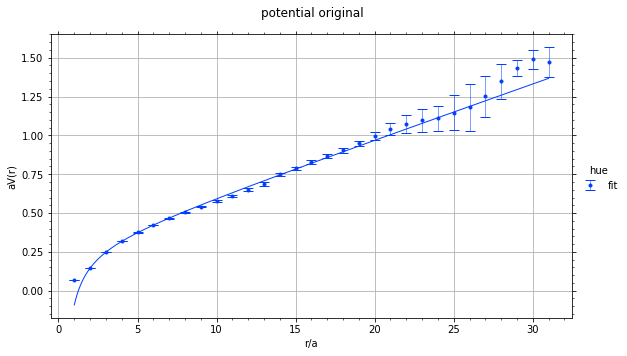

../../images/potential/smearing/su3/gloudynamics/nt18/potential_original/potential_original_r=18


In [6]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt18/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original'}, 'constraints': {'r/a': (1, 31), 'T': (1, 8), 'smearing_step': (31, 31)}}]
image_path = f'../../images/potential/smearing/su3/gloudynamics/nt18/potential_original'
image_name = f'potential_original_smearing'
data = potential_data.get_potantial_df(paths)
print(data)
data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T_range_best, (1, 8)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
# data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T, (2, 8)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
data = data.drop('T', axis = 1)
data = data[data['aV(r)'] != 0]
print(data)
df_fit = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.potential_fit_data, (2, 25), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
fit_params = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.make_fit, (2, 25), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col=None)\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
data['hue'] = 'fit'
df_fit['hue'] = 'fit'
plots.plot_potential_single(data, 'r/a', 'aV(r)', 'err', 'hue', 'r/a', 'aV(r)', 'potential original', image_path, f'potential_original_r=18', show_plot, df_fits=df_fit)

     smearing_step  r/a  copy  T     aV(r)       err      beta potential_type
0               31    1     0  1  0.075556  0.000014  beta=6.0       original
1               31    1     0  2  0.070102  0.000014  beta=6.0       original
2               31    1     0  3  0.068810  0.000014  beta=6.0       original
3               31    1     0  4  0.068356  0.000013  beta=6.0       original
4               31    1     0  5  0.068175  0.000013  beta=6.0       original
..             ...  ...   ... ..       ...       ...       ...            ...
243             31   31     0  4  1.394447  0.217598  beta=6.0       original
244             31   31     0  5  1.676465  0.965615  beta=6.0       original
245             31   31     0  6 -0.422603  1.015588  beta=6.0       original
246             31   31     0  7  0.737278  1.262867  beta=6.0       original
247             31   31     0  8  0.000000  0.000000  beta=6.0       original

[248 rows x 8 columns]


/home/ilya/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ilya/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ilya/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


   smearing_step  r/a  copy      beta potential_type     aV(r)       err
0             31    1     0  beta=6.0       original  0.068077  0.000009
0             31    2     0  beta=6.0       original  0.145518  0.000050
0             31    3     0  beta=6.0       original  0.247801  0.000157
0             31    4     0  beta=6.0       original  0.318399  0.000357
0             31    5     0  beta=6.0       original  0.374805  0.000597
0             31    6     0  beta=6.0       original  0.422864  0.001075
0             31    7     0  beta=6.0       original  0.465136  0.002097
0             31    8     0  beta=6.0       original  0.504010  0.003056
0             31    9     0  beta=6.0       original  0.541477  0.003752
0             31   10     0  beta=6.0       original  0.577239  0.004642
0             31   11     0  beta=6.0       original  0.612298  0.006635
0             31   12     0  beta=6.0       original  0.649670  0.009037
0             31   13     0  beta=6.0       origina

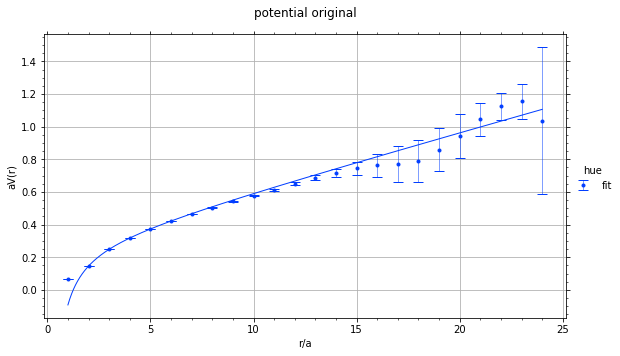

../../images/potential/smearing/su3/gloudynamics/nt18/potential_original/potential_original_r=18


In [5]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt18/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original'}, 'constraints': {'r/a': (1, 31), 'T': (1, 8), 'smearing_step': (31, 31)}}]
image_path = f'../../images/potential/smearing/su3/gloudynamics/nt18/potential_original'
image_name = f'potential_original_smearing'
data = potential_data.get_potantial_df(paths)
print(data)
data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T_range_best, (2, 8)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
# data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T, (2, 8)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
data = data.drop('T', axis = 1)
data = data[data['aV(r)'] != 0]
print(data)
df_fit = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.potential_fit_data, (2, 25), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
fit_params = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.make_fit, (2, 25), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col=None)\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
data['hue'] = 'fit'
df_fit['hue'] = 'fit'
plots.plot_potential_single(data, 'r/a', 'aV(r)', 'err', 'hue', 'r/a', 'aV(r)', 'potential original', image_path, f'potential_original_r=18', show_plot, df_fits=df_fit)

[(1, 5), (1, 6), (1, 7), (1, 8), (2, 6), (2, 7), (2, 8), (3, 7), (3, 8), (4, 8)]
error
error
fits       T     aV(r)       err  chi_square  range  hue
0  None  0.990481  0.024814    0.002058      0  fit
0  None  0.981825  0.029211    0.006254      1  fit
0  None  0.983561  0.026373    0.011275      2  fit
0  None  0.982140  0.026191    0.047017      3  fit
0  None  0.902438  0.151568    0.006112      4  fit
0  None  0.929296  0.109288    0.020115      5  fit
0  None  0.913208  0.115429    0.055862      6  fit
0  None  0.877240  0.274007    0.158476      9  fit
fit_exp             T     aV(r)  chi_square  range
0    1.000000  1.352739    0.002058      0
1    1.007007  1.351193    0.002058      0
2    1.014014  1.349653    0.002058      0
3    1.021021  1.348120    0.002058      0
4    1.028028  1.346593    0.002058      0
..        ...       ...         ...    ...
995  7.971972  0.891801    0.158476      9
996  7.978979  0.891736    0.158476      9
997  7.985986  0.891671    0.158476    

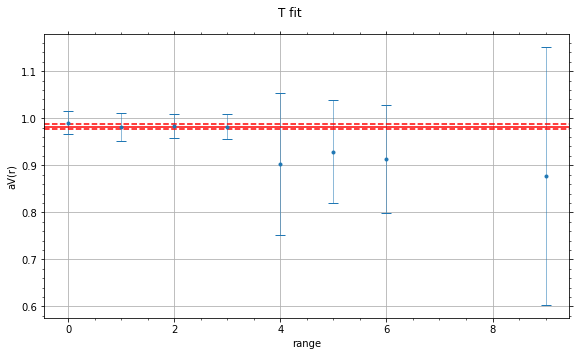

../../images/potential/smearing/su3/gloudynamics/nt18/T_fit/potential_T_fit_r=14


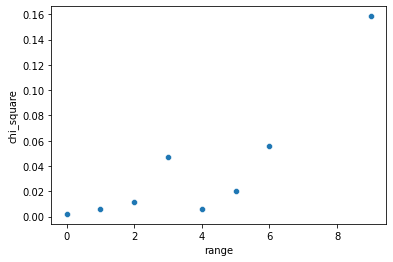

            T     aV(r)  chi_square  range
0    1.000000  1.352739    0.002058      0
1    1.007007  1.351193    0.002058      0
2    1.014014  1.349653    0.002058      0
3    1.021021  1.348120    0.002058      0
4    1.028028  1.346593    0.002058      0
..        ...       ...         ...    ...
995  7.971972  0.891801    0.158476      9
996  7.978979  0.891736    0.158476      9
997  7.985986  0.891671    0.158476      9
998  7.992993  0.891607    0.158476      9
999  8.000000  0.891542    0.158476      9

[8000 rows x 4 columns]
     smearing_step   r/a  copy         T     aV(r)       err      beta  \
0             26.0  20.0   0.0  1.000000  1.352749  0.001088  beta=6.0   
1             26.0  20.0   0.0  2.000000  1.187086  0.002290  beta=6.0   
2             26.0  20.0   0.0  3.000000  1.096875  0.004853  beta=6.0   
3             26.0  20.0   0.0  4.000000  1.061401  0.011954  beta=6.0   
4             26.0  20.0   0.0  5.000000  0.977938  0.027766  beta=6.0   
..             

/home/ilya/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:2538: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/ilya/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:2538: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/ilya/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:2538: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/ilya/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:2538: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/ilya/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:2538: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/ilya/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:2538: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/ilya/.local/lib/python3.8/site-packages/

sorted [0.00205752 0.00611163 0.01250816 0.03382366 0.04023038 0.15847604
 0.1675864  0.1880692 ]


/home/ilya/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:2538: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/ilya/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:2538: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


0.984887401339955 0.005298499136313386


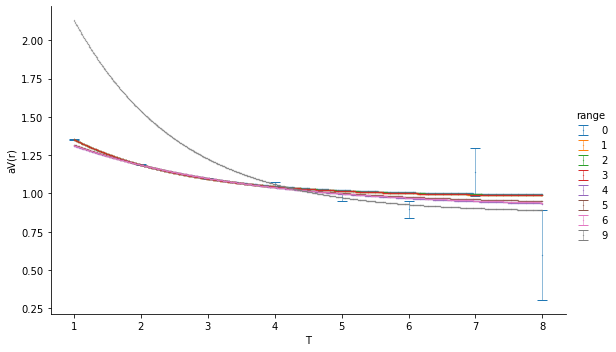

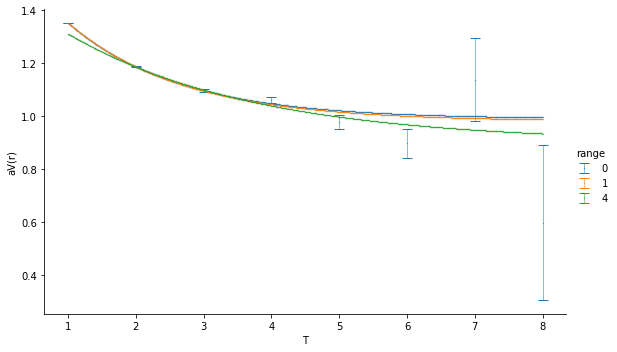

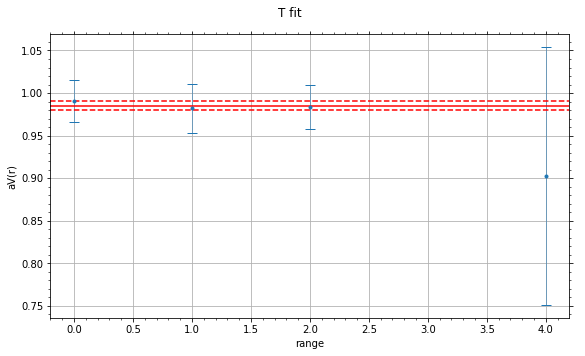

../../images/potential/smearing/su3/gloudynamics/nt18/T_fit/potential_T_fit_r=14
[0.99048103 0.98182548 0.98356077 0.90243813]
0.9645763496095625 0.018010675527681926


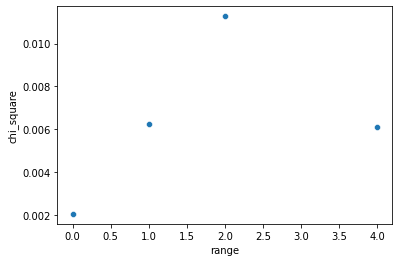

In [8]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt18/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 1}, 'constraints': {'r/a': (20, 20), 'T': (1, 8), 'smearing_step': (26, 26)}}]
image_path = f'../../images/potential/smearing/su3/gloudynamics/nt18/T_fit'
image_name = f'potential_original_smearing'
data = potential_data.get_potantial_df(paths)
ranges = generate_ranges(1, 8)
print(ranges)
fits = []
fit_exp = []
for i in range(len(ranges)):
    try:
        df_tmp = fit.potential_fit_T(data, ranges[i])
        df1 = fit.potential_fit_data(data, ranges[i], fit.func_exponent, ['V0', 'b', 'c'], 'T', 'aV(r)', err_col='err')
    except:
        print('error')
        pass
    else:
        fits.append(df_tmp)
        fits[-1]['range'] = i
        fit_exp.append(df1)
        fit_exp[-1]['range'] = i
fits = pd.concat(fits)
fit_exp = pd.concat(fit_exp)
fits = fits[fits['err'] != math.inf]
fits['hue'] = 'fit'
# fit_exp = fit_exp[fit_exp['V0_err'] != math.inf]
# fit_exp['hue'] = 'fit'
print('fits', fits)
print('fit_exp', fit_exp)
popt, pcov = curve_fit(lambda x, c: c, fits['range'], fits['aV(r)'], sigma=fits['err'])
potential = popt[0]
err = np.sqrt(np.diag(pcov))[0]
print(potential, err)
plots.make_plots_single(fits, 'range', 'aV(r)', None, None, 'range', 'aV(r)', 'T fit', image_path, f'potential_T_fit_r=14', show_plot, err='err', black_line_y=potential, dashed_line_y=[potential + err, potential - err])
seaborn.scatterplot(fits, x = 'range', y = 'chi_square')
plt.show()
data['range'] = 0
print(fit_exp)
data1 = pd.concat([data, fit_exp])
print(data1)
fg = seaborn.FacetGrid(data=data1, height=5, hue = 'range', aspect=1.61, legend_out=True)
fg.map(plt.errorbar, 'T', 'aV(r)', 'err', mfc=None, fmt='o', ms=0.3, capsize=5, lw=0.5, ls=None).add_legend()
chi_arr = np.sort(fit_exp['chi_square'].unique())
print('sorted', chi_arr)
fit_exp = fit_exp[~(fit_exp['chi_square'] > chi_arr[2])]
data1 = pd.concat([data, fit_exp])
fg = seaborn.FacetGrid(data=data1, height=5, hue = 'range', aspect=1.61, legend_out=True)
fg.map(plt.errorbar, 'T', 'aV(r)', 'err', mfc=None, fmt='o', ms=0.3, capsize=5, lw=0.5, ls=None).add_legend()
fits = fits[~(fits['chi_square'] > chi_arr[2])]
popt, pcov = curve_fit(lambda x, c: c, fits['range'], fits['aV(r)'], sigma=fits['err'])
potential = popt[0]
err = np.sqrt(np.diag(pcov))[0]
print(potential, err)
plots.make_plots_single(fits, 'range', 'aV(r)', None, None, 'range', 'aV(r)', 'T fit', image_path, f'potential_T_fit_r=14', show_plot, err='err', black_line_y=potential, dashed_line_y=[potential + err, potential - err])
seaborn.scatterplot(fits, x = 'range', y = 'chi_square')
V_arr = fits['aV(r)'].to_numpy()
print(V_arr)
V_mean = np.mean(V_arr)
V_err = np.std(V_arr)/math.sqrt(len(V_arr))
print(V_mean, V_err)

/home/ilya/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ilya/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ilya/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ilya/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ilya/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the 

      T     aV(r)       err  range  hue
0  None  0.631916  0.000836      0  fit
0  None  0.628978  0.002458      1  fit
0  None  0.628670  0.001761      2  fit
0  None  0.628327  0.001486      3  fit
0  None  0.627030  0.002504      4  fit
0  None  0.626382  0.002707      5  fit
0  None  0.626237  0.002544      6  fit
0  None  0.622352  0.005821      7  fit
0  None  0.624454  0.003116      8  fit
0  None  0.624603  0.002154      9  fit
0  None  0.621127  0.004847     10  fit
0  None  0.619270  0.005318     11  fit
0  None  0.618983  0.004856     12  fit
0  None  0.622037  0.010775     13  fit
0  None  0.623388  0.005263     14  fit
0  None  0.612849  0.014694     15  fit
0  None  0.606114  0.017614     16  fit
0  None  0.606222  0.014903     17  fit
0  None  0.630905  0.003180     18  fit
0  None  0.598982  0.074458     19  fit
0  None  0.535825  0.301698     20  fit
0  None  0.568275  0.115591     21  fit
0.6288847855657371 0.0007490759586630302


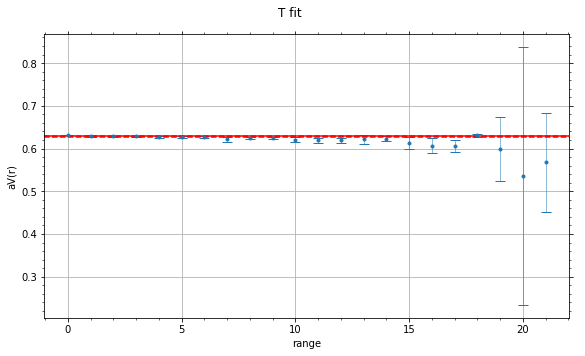

../../images/potential/smearing/su3/gloudynamics/28^4/beta6.1/T_fit/potential_T_fit_r=14


In [6]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/28^4/beta6.1/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 1}, 'constraints': {'r/a': (14, 14), 'T': (1, 13), 'smearing_step': (25, 25)}}]
image_path = f'../../images/potential/smearing/su3/gloudynamics/28^4/beta6.1/T_fit'
image_name = f'potential_original_smearing'
data = potential_data.get_potantial_df(paths)
ranges = generate_ranges(2, 13)
fits = []
for i in range(len(ranges)):
    fits.append(fit.potential_fit_T(data, ranges[i]))
    fits[-1]['range'] = i
fits = pd.concat(fits)
fits = fits[fits['err'] != math.inf]
fits['hue'] = 'fit'
print(fits)
popt, pcov = curve_fit(lambda x, c: c, fits['range'], fits['aV(r)'], sigma=fits['err'])
potential = popt[0]
err = np.sqrt(np.diag(pcov))[0]
print(potential, err)
plots.make_plots_single(fits, 'range', 'aV(r)', None, None, 'range', 'aV(r)', 'T fit', image_path, f'potential_T_fit_r=14', show_plot, err='err', black_line_y=potential, dashed_line_y=[potential + err, potential - err])

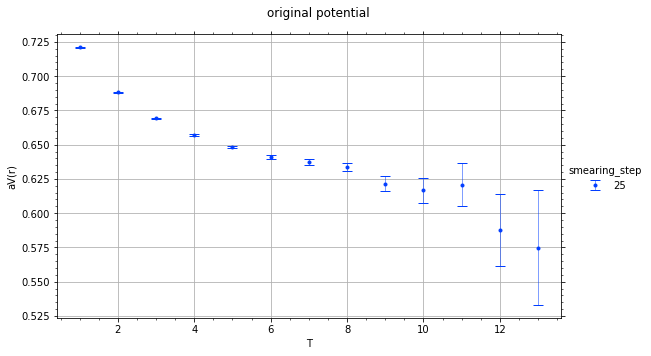

../../images/potential/smearing/su3/gloudynamics/28^4/beta6.1/T_dependence/potential_original_smearing_r=14


In [8]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/28^4/beta6.1/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 1}, 'constraints': {'r/a': (14, 14), 'T': (1, 13), 'smearing_step': (25, 25)}}]
image_path = f'../../images/potential/smearing/su3/gloudynamics/28^4/beta6.1/T_dependence'
image_name = f'potential_original_smearing'
data = potential_data.get_potantial_df(paths)
data = data[data['smearing_step'] >= 10]
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_smearing_r={r}', show_plot, err='err')

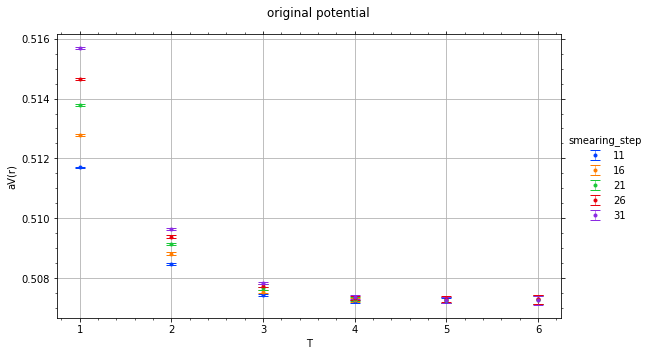

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=1


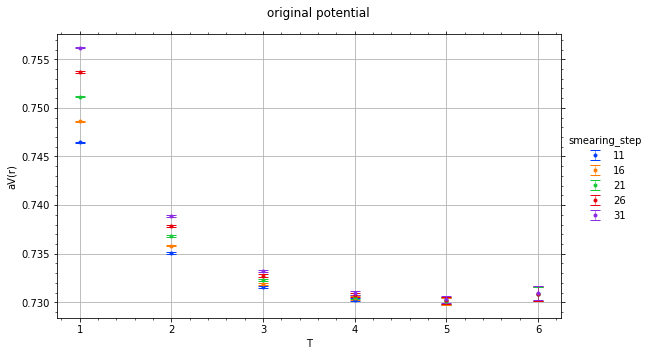

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=2


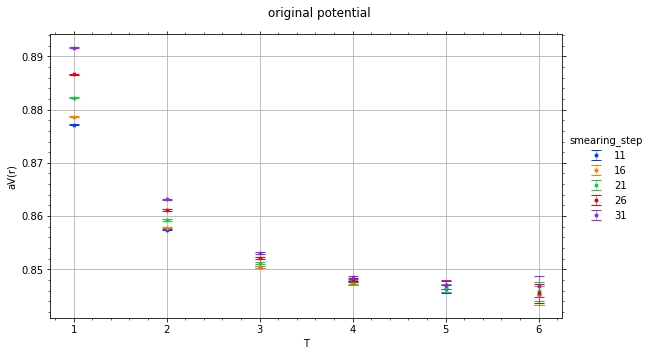

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=3


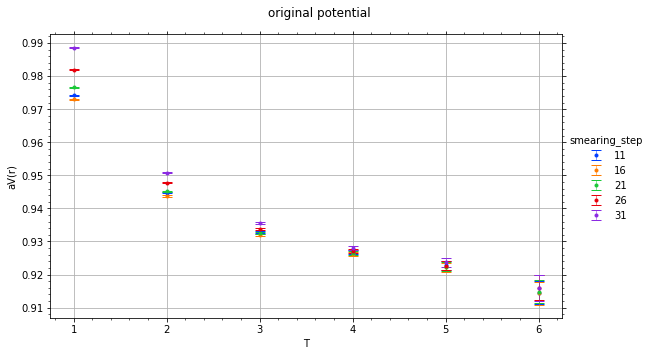

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=4


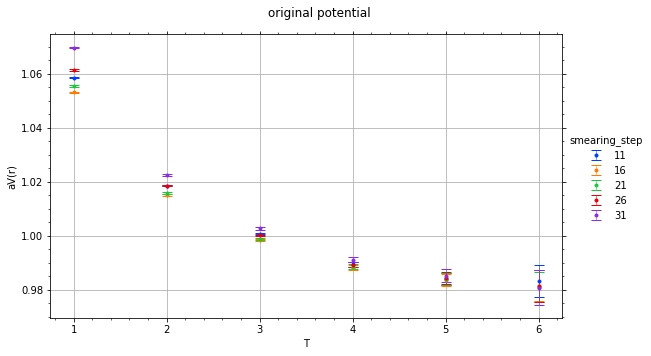

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=5


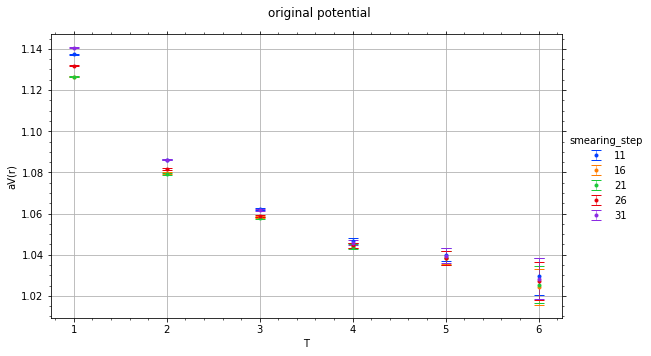

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=6


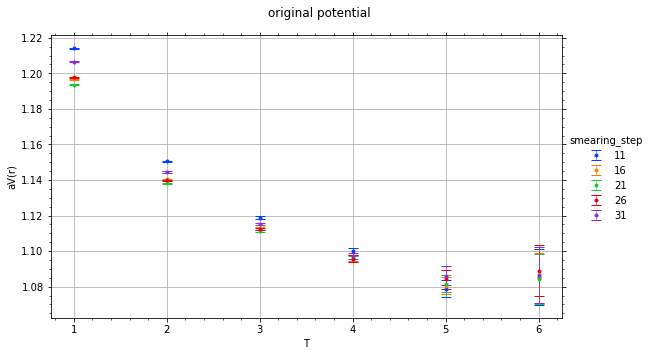

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=7


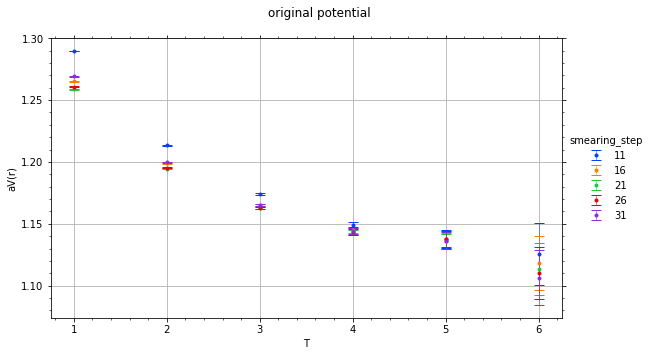

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=8


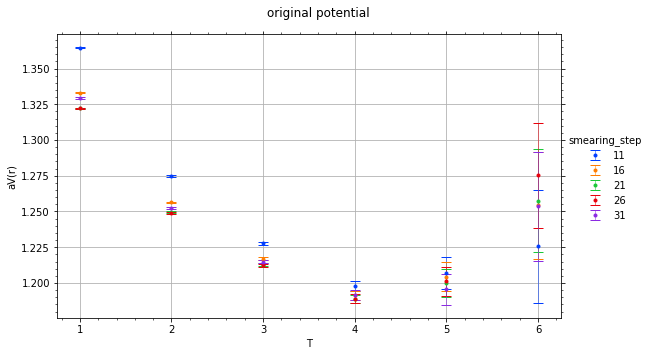

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=9


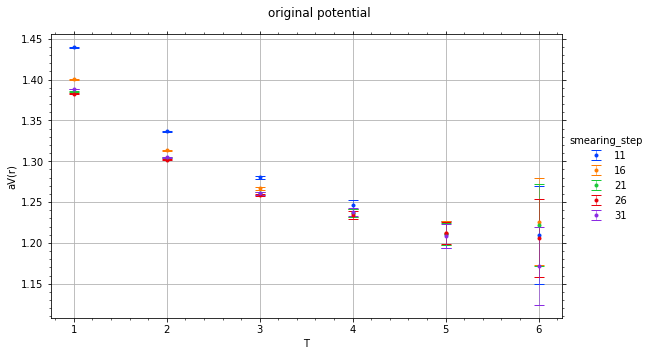

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=10


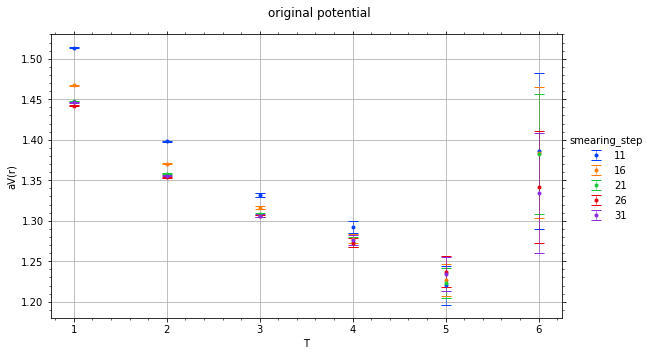

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=11


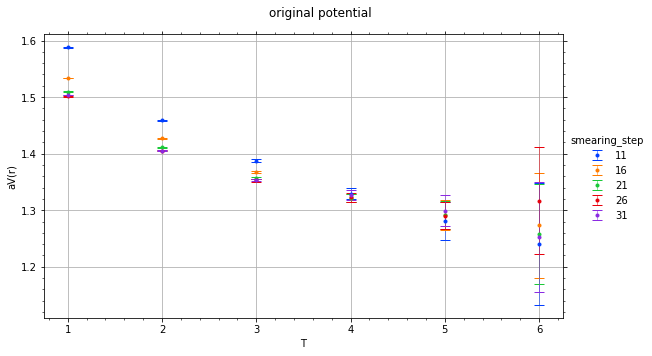

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=12


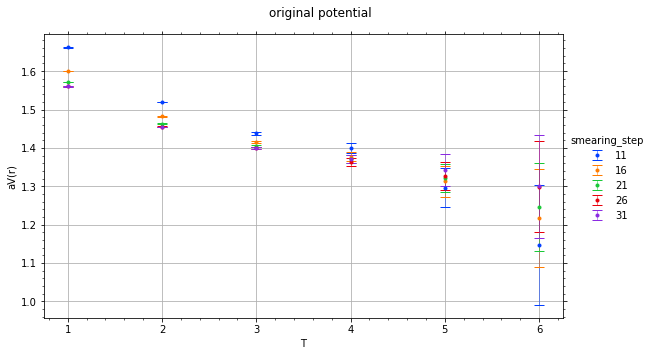

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=13


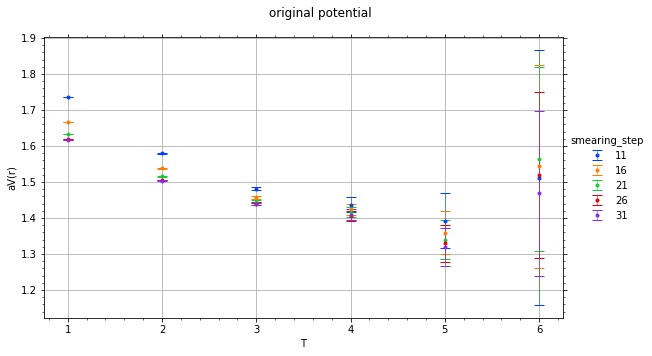

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=14


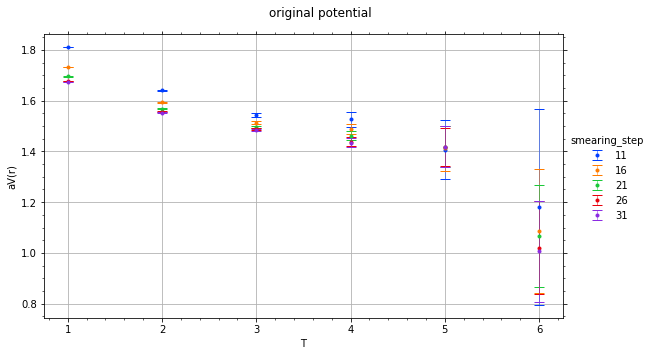

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=15


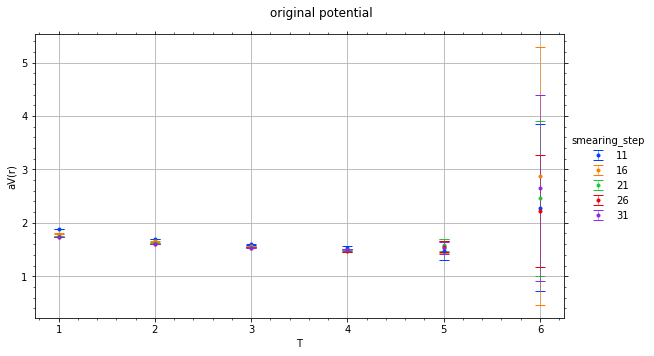

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=16


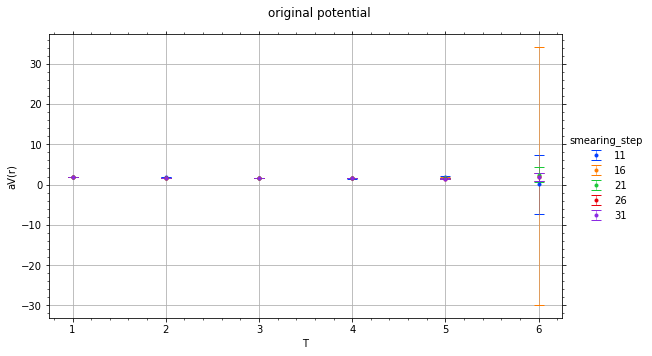

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=17


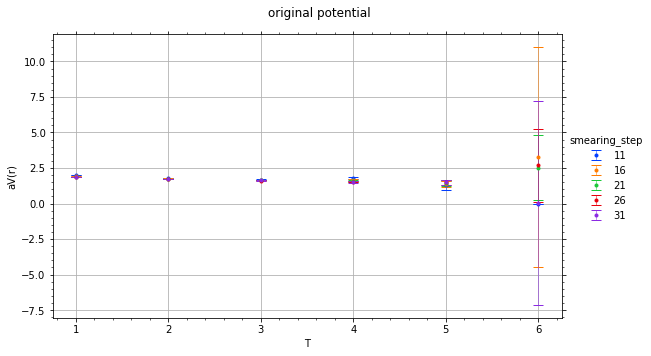

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=18


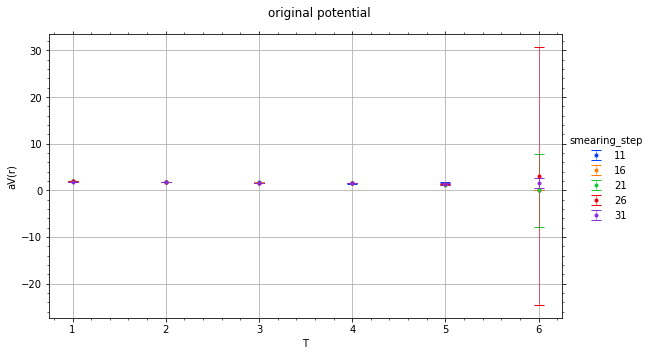

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=19


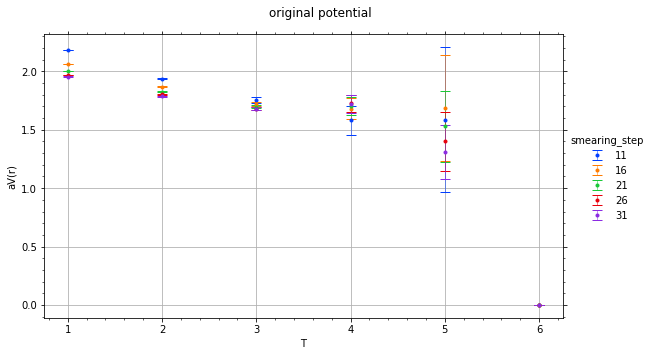

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=20


In [6]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt20/HYP0_APE_alpha=0.6/potential_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 1}, 'constraints': {'r/a': (1, 20), 'T': (1, 6)}}]
image_path = f'../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence'
image_name = f'potential_original_smearing'
data = potential_data.get_potantial_df(paths)
data = data[data['smearing_step'] >= 10]
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_smearing_r={r}', show_plot, err='err')

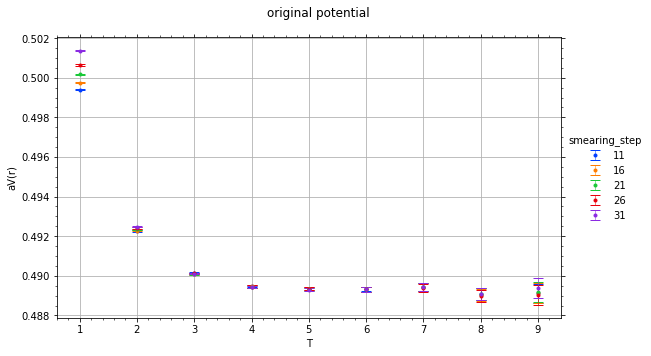

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=1


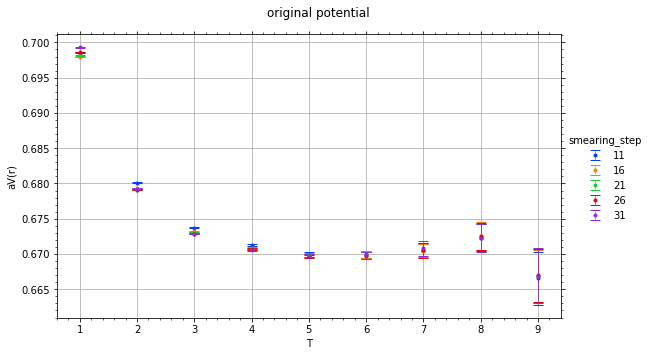

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=2


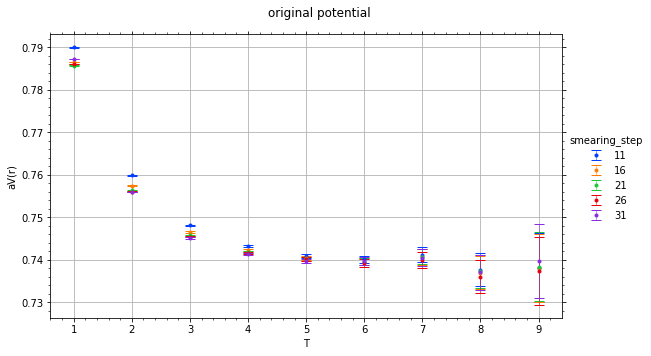

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=3


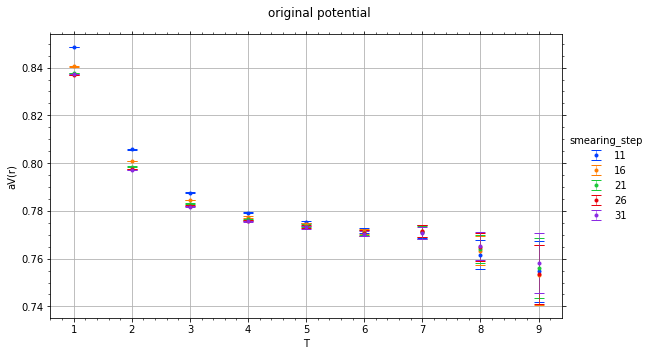

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=4


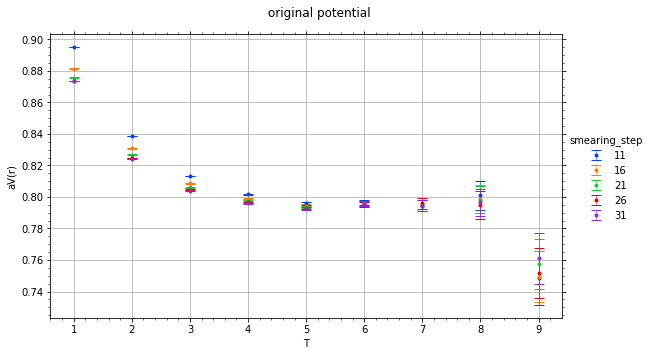

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=5


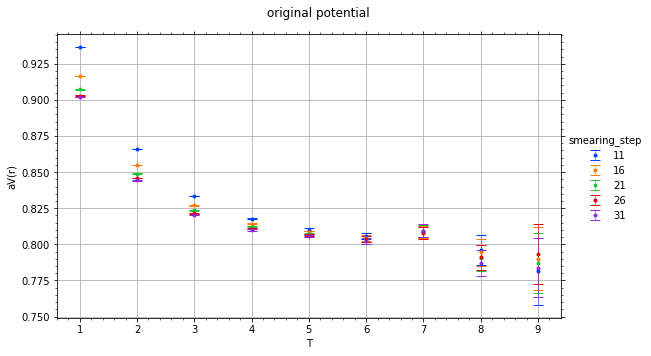

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=6


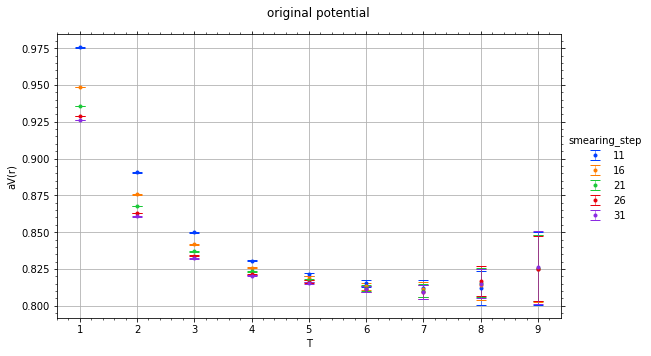

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=7


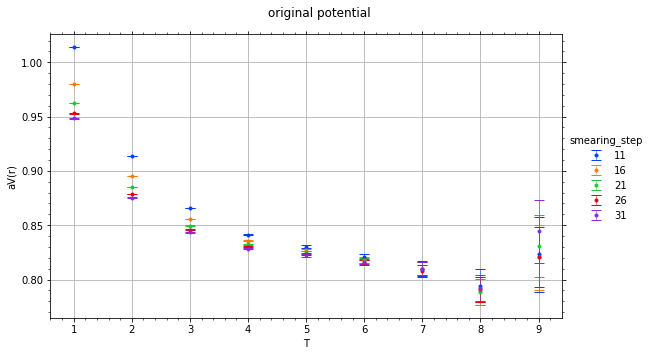

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=8


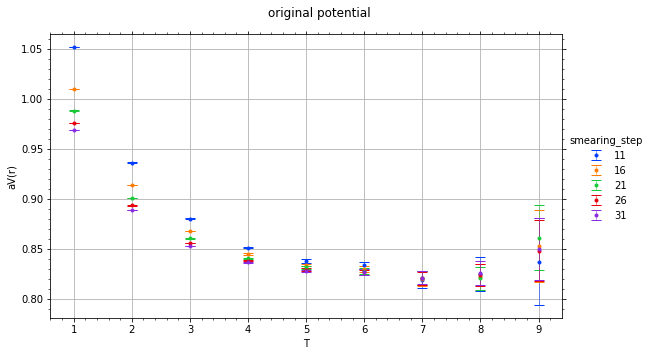

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=9


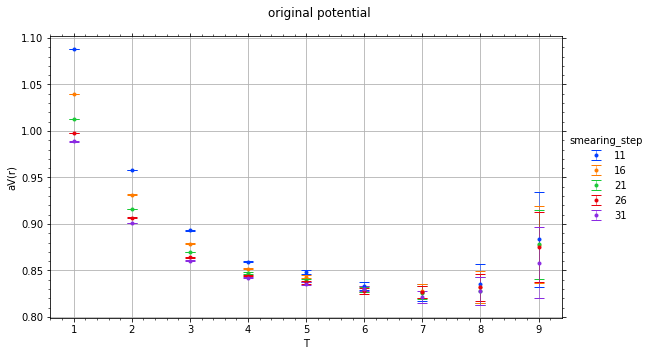

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=10


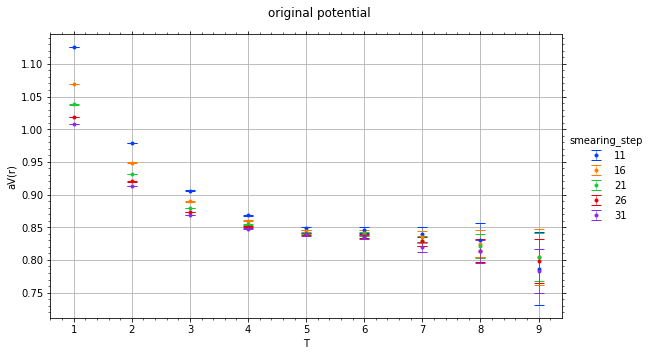

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=11


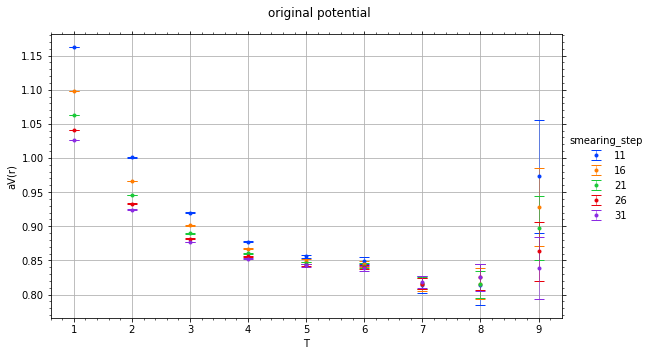

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=12


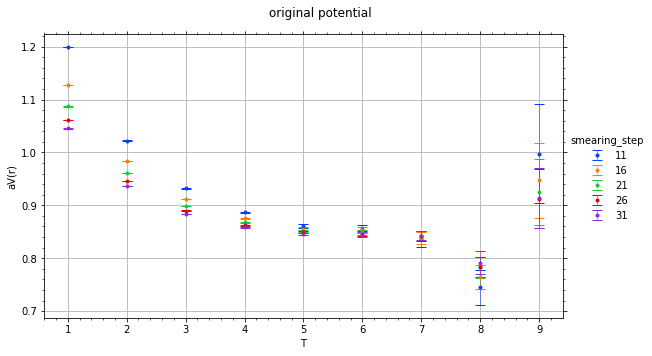

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=13


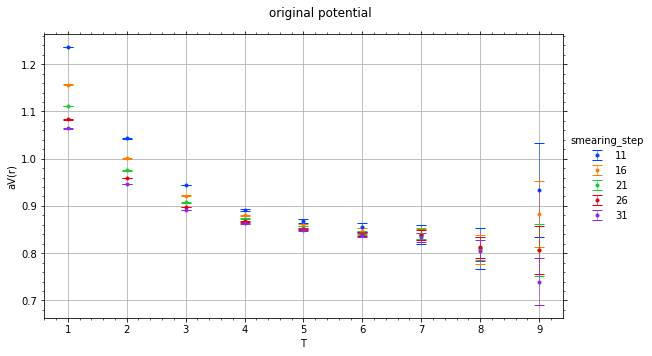

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=14


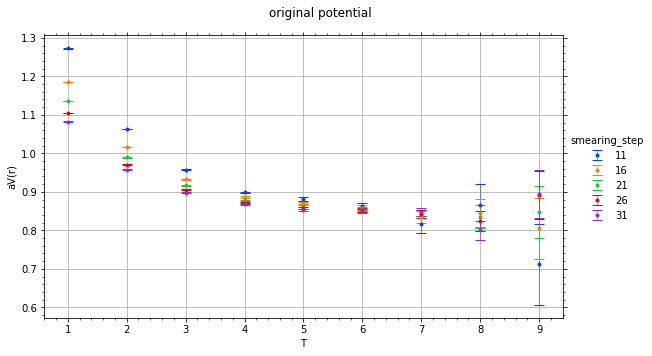

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=15


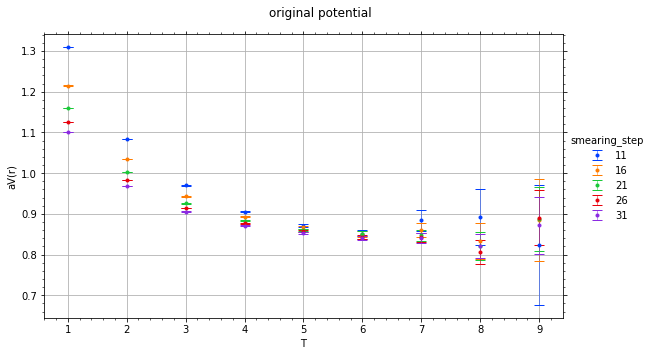

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=16


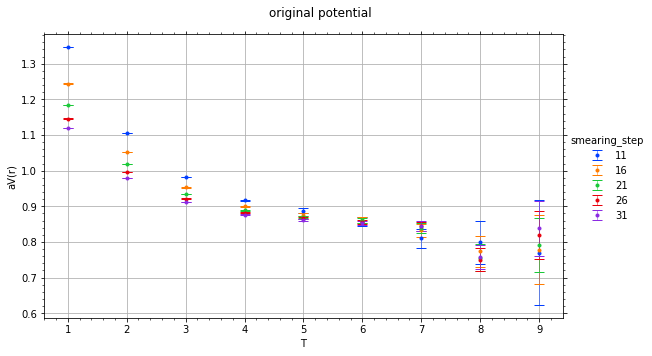

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=17


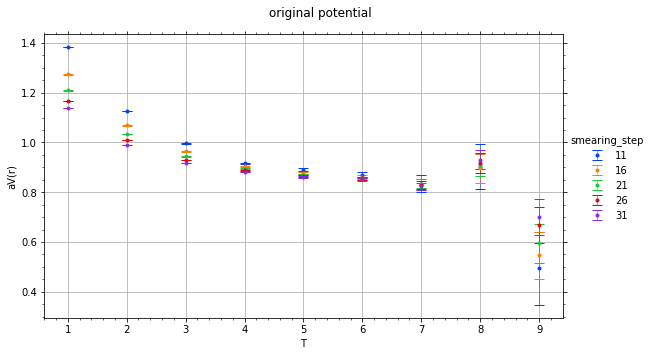

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=18


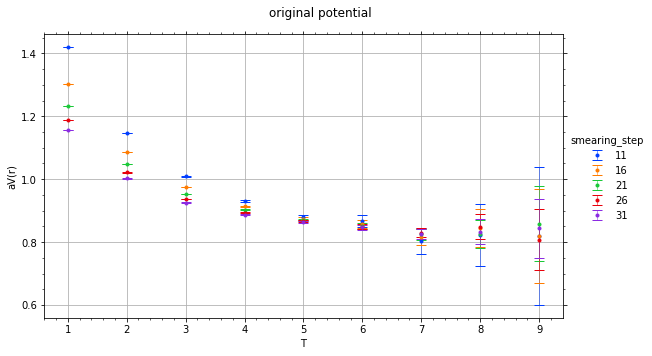

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=19


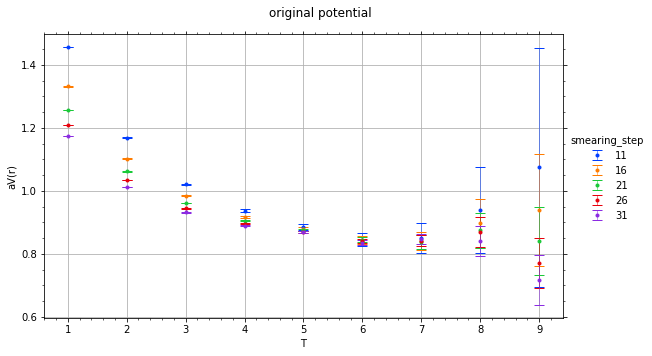

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=20


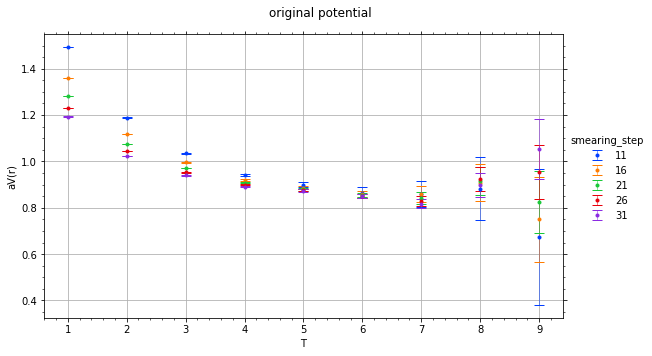

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=21


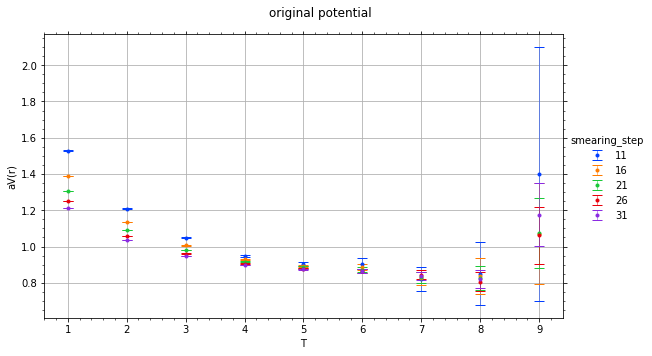

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=22


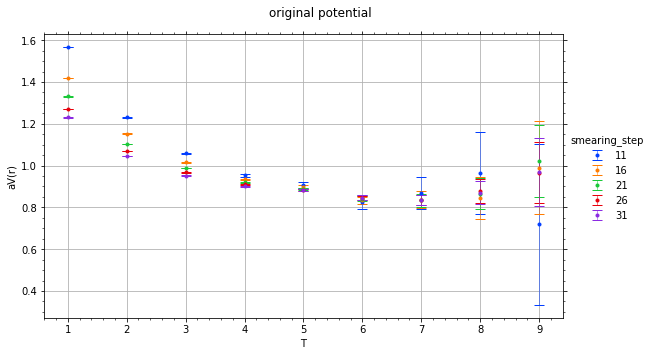

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=23


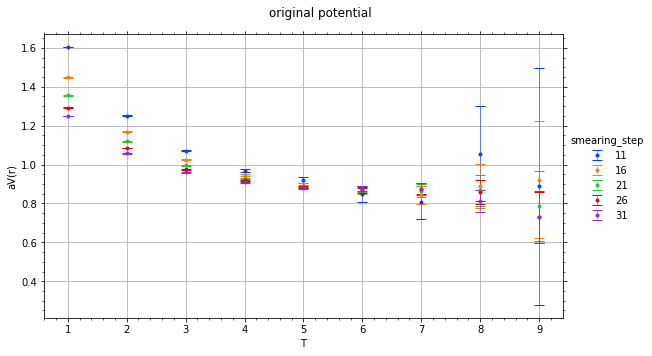

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=24


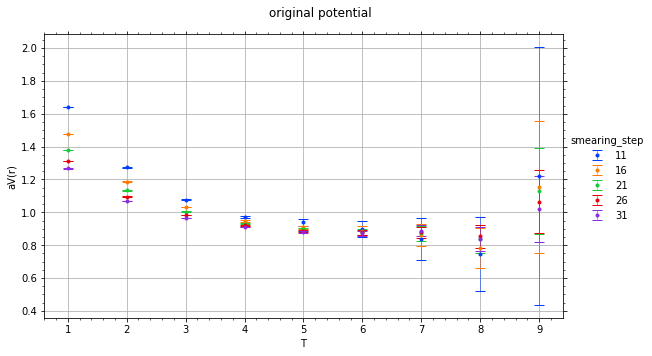

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=25


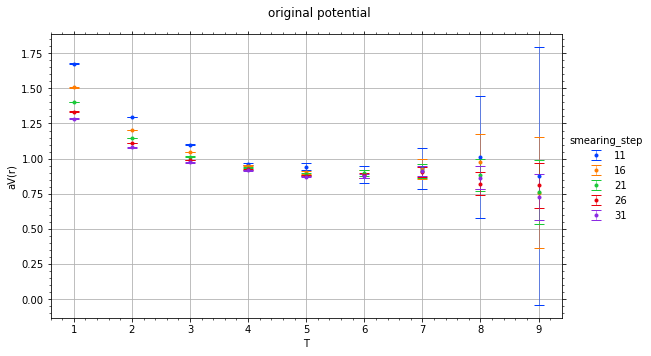

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=26


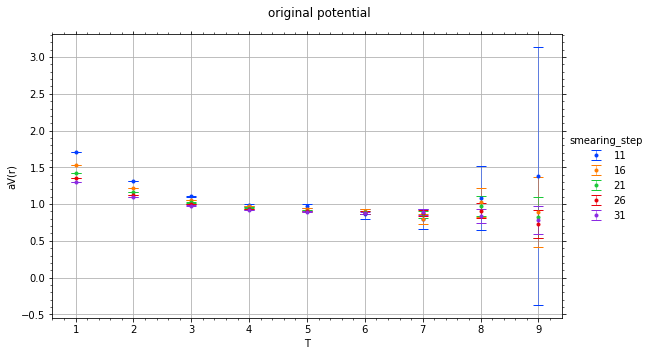

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=27


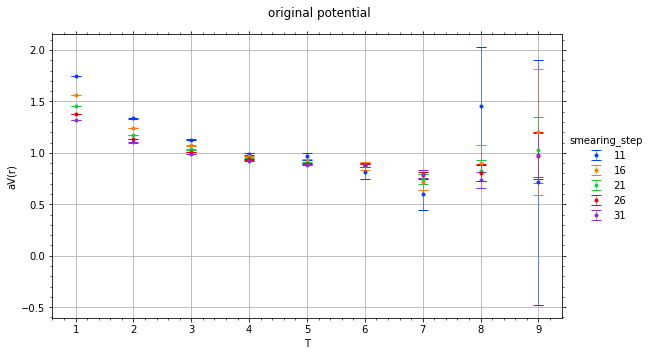

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=28


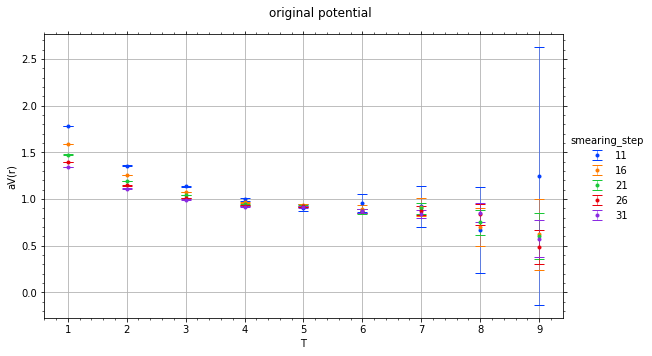

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=29


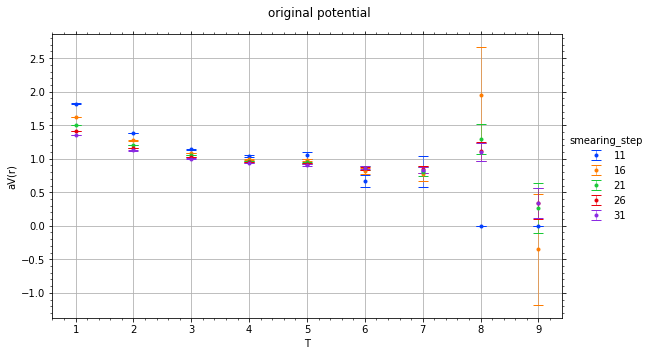

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=30


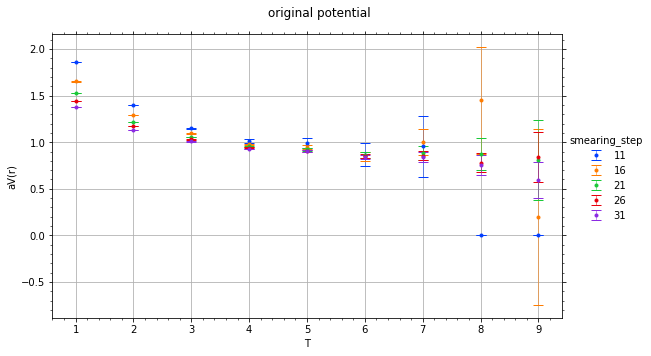

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=31


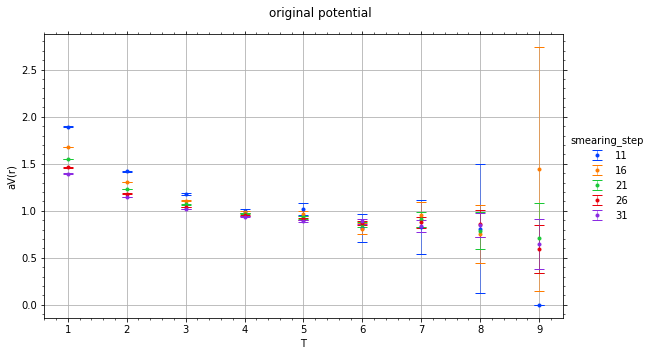

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=32


In [4]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt20/HYP0_APE_alpha=0.6/steps_500/copies=1/potential_monopoless.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 1}, 'constraints': {'r/a': (1, 32), 'T': (1, 9)}}]
image_path = f'../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence'
image_name = f'potential_original_smearing'
data = potential_data.get_potantial_df(paths)
data = data[data['smearing_step'] >= 10]
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_smearing_r={r}', show_plot, err='err')

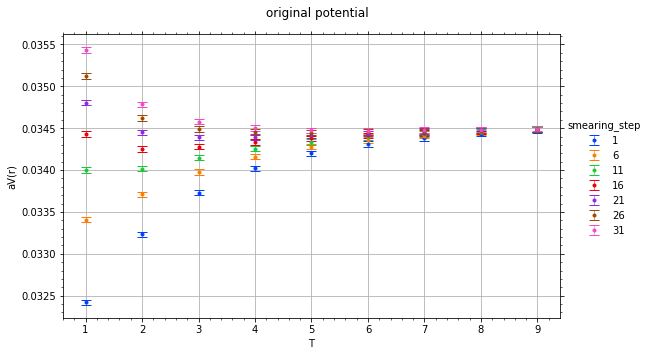

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=1


../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=2


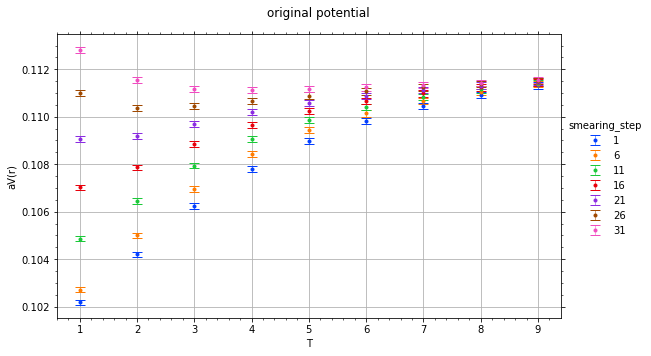

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=3


../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=4


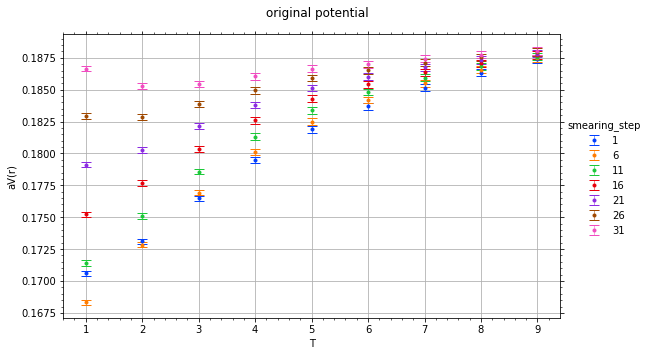

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=5


../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=6


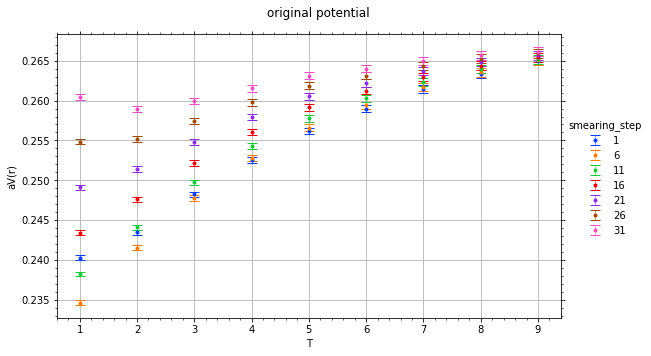

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=7


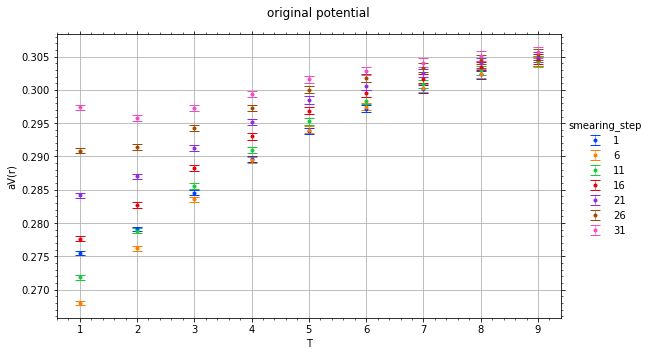

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=8


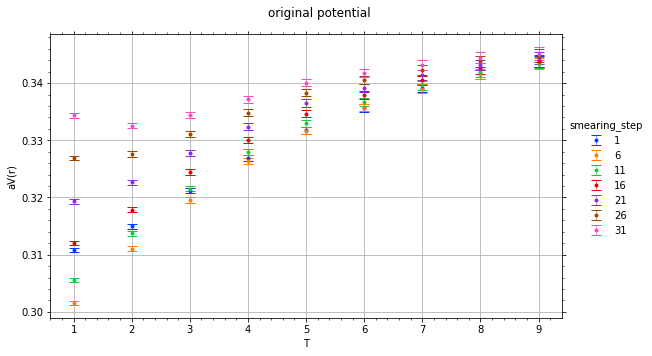

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=9


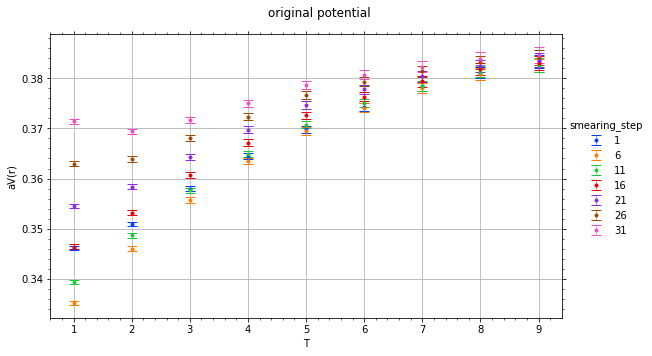

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=10


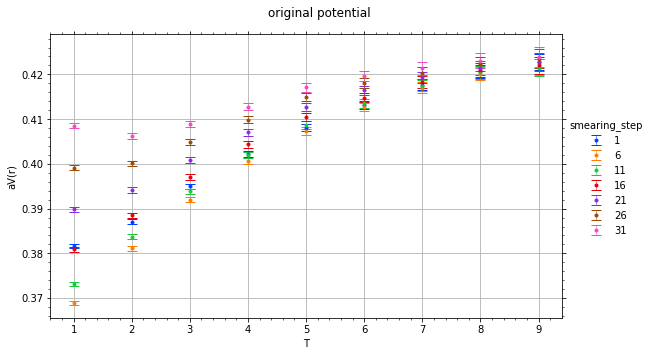

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=11


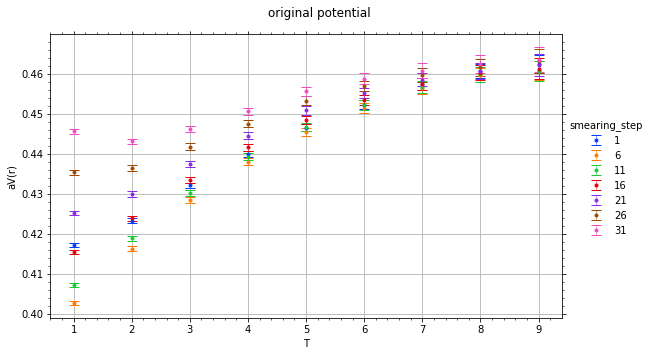

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=12


../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=13


../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=14


../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=15


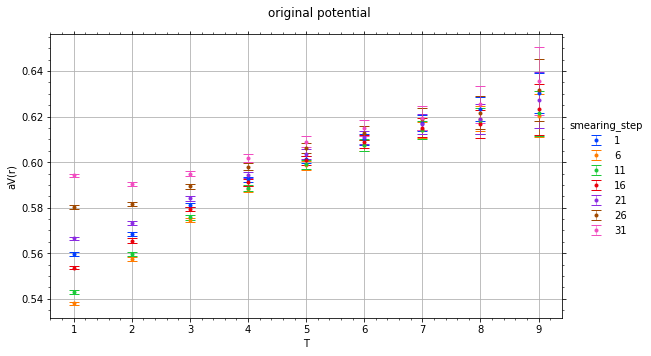

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=16


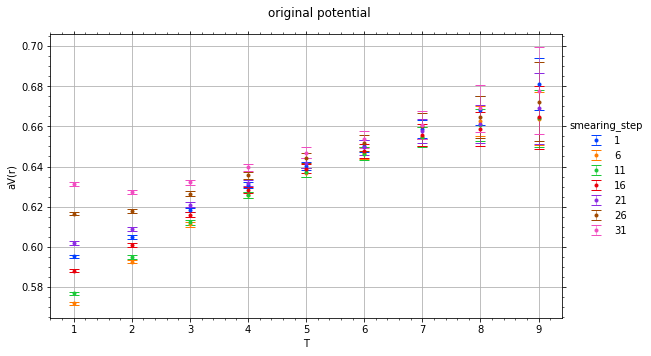

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=17


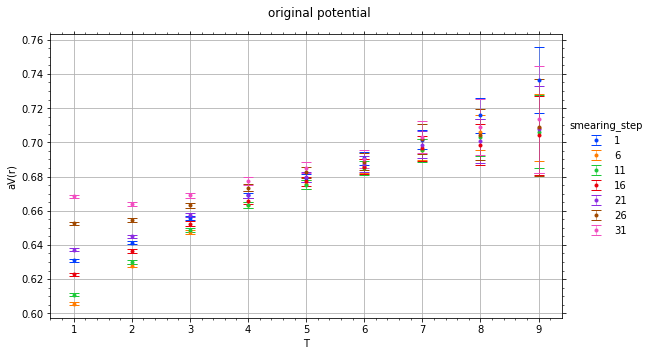

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=18


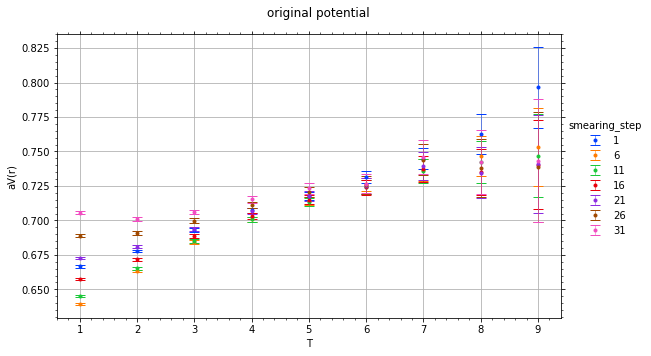

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=19


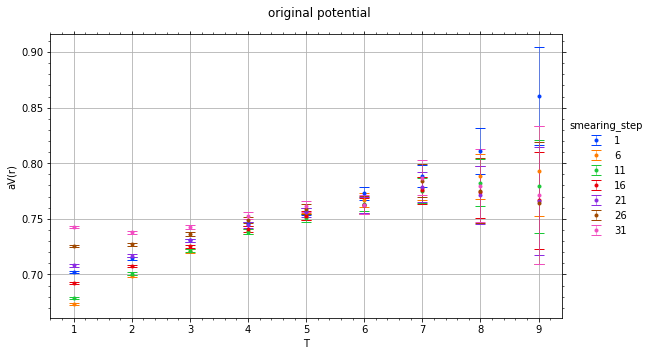

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=20


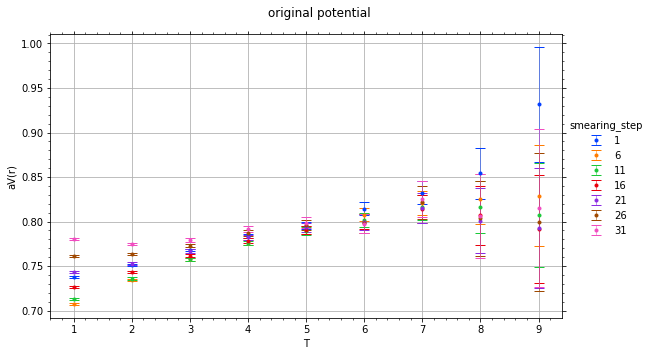

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=21


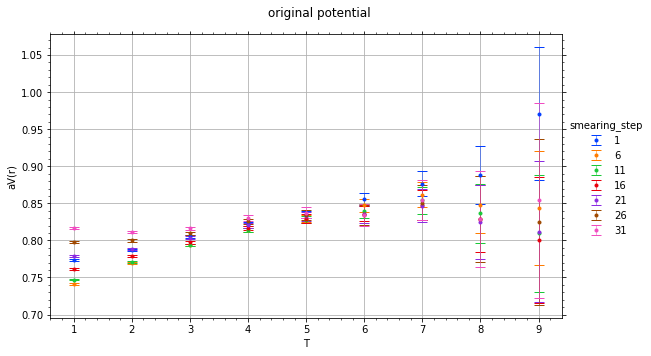

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=22


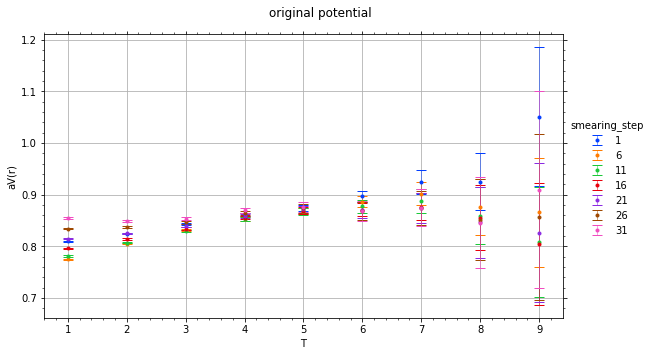

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=23


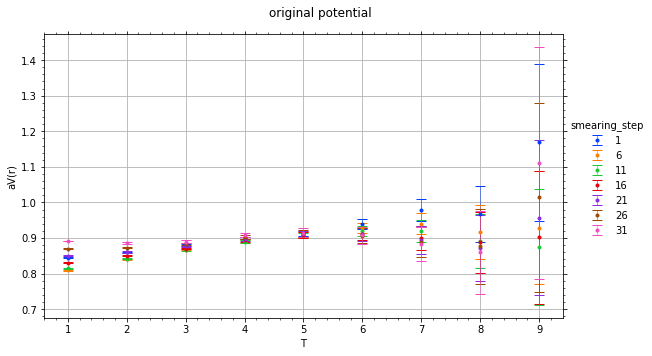

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=24


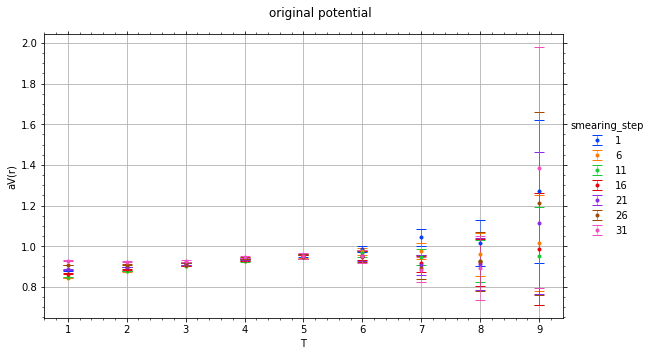

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=25


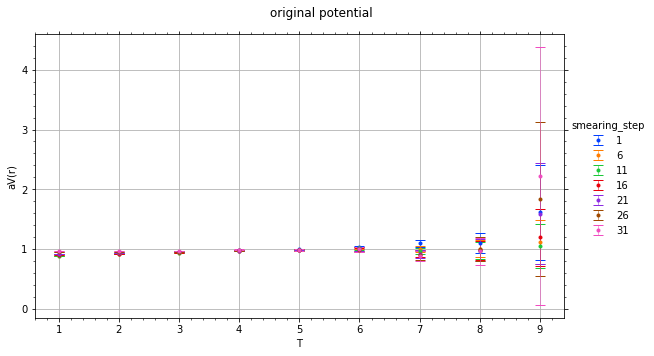

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=26


../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=27


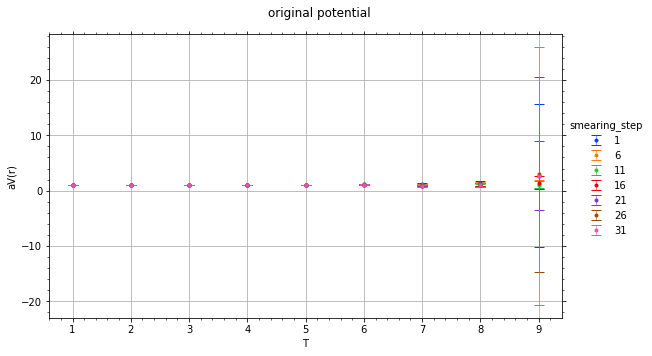

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=28


../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=29


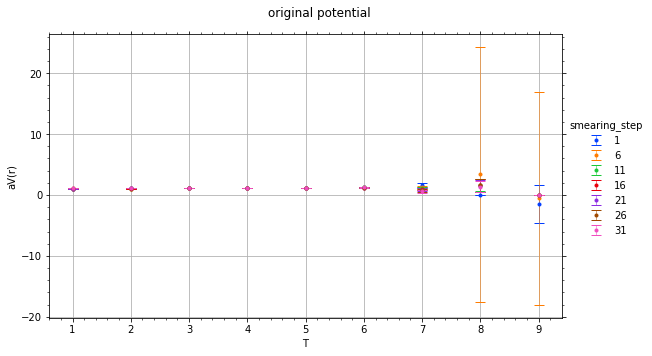

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=30


../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=31


../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=32


In [8]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt20/HYP0_APE_alpha=0.6/steps_500/copies=1/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 1}, 'constraints': {'r/a': (1, 32), 'T': (1, 9)}}]
image_path = f'../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence'
image_name = f'potential_original_smearing'
data = potential_data.get_potantial_df(paths)
# data = data[data['smearing_step'] >= 10]
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_smearing_r={r}', show_plot, err='err')

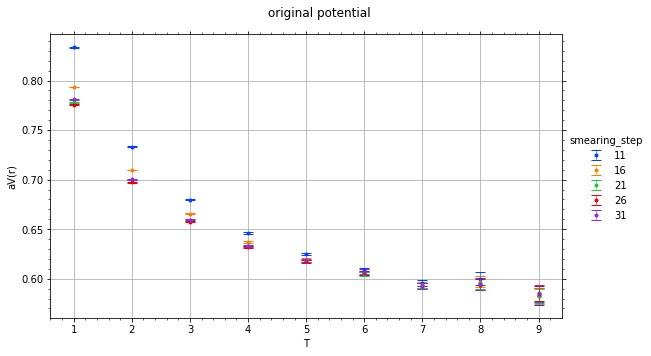

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=10


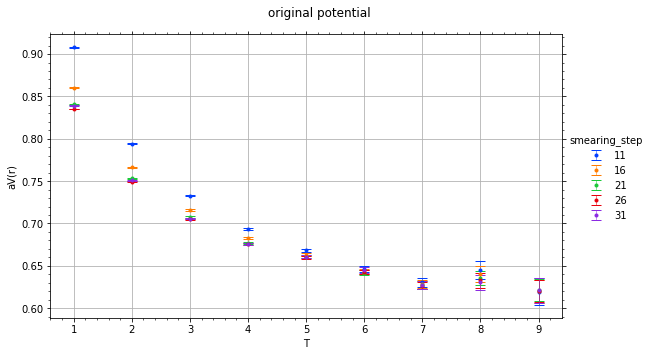

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=11


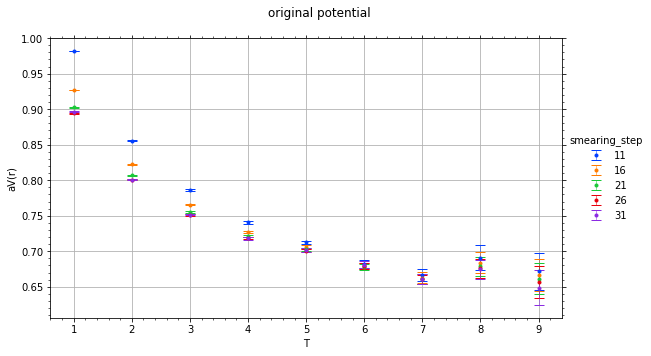

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=12


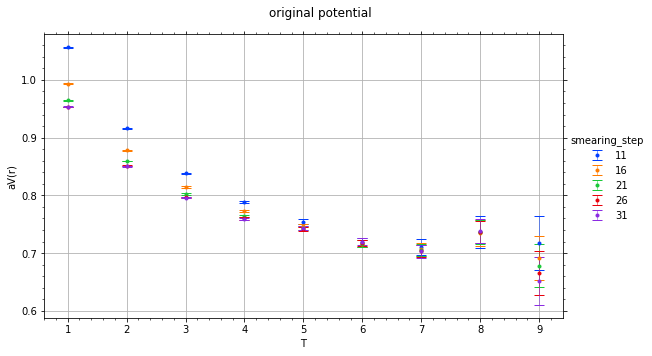

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=13


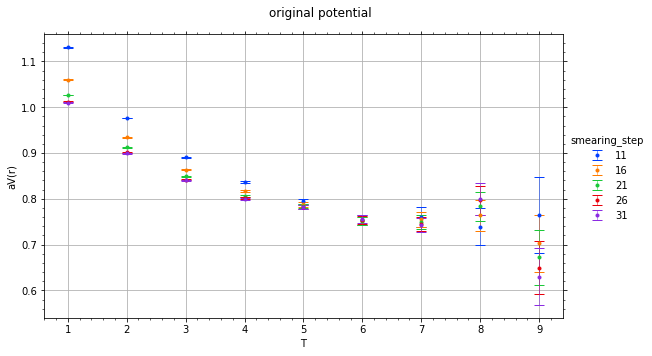

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=14


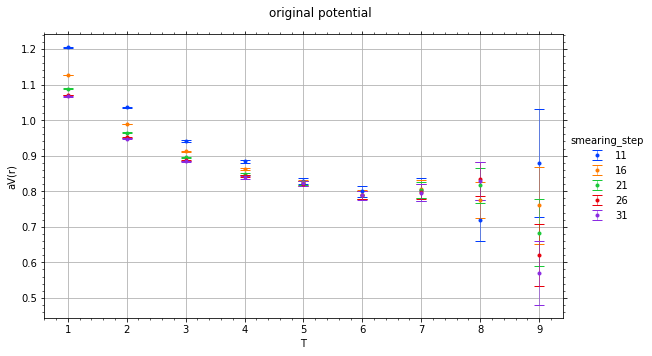

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=15


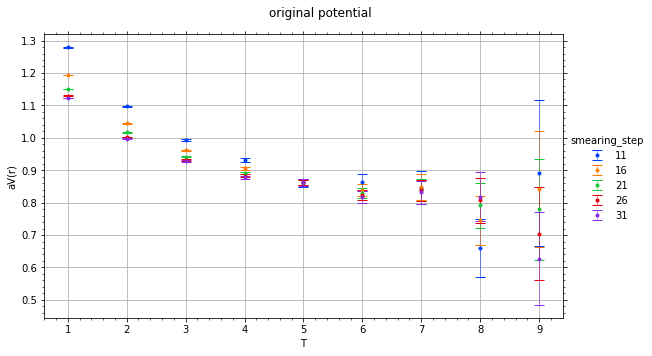

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=16


../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=17


../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=18


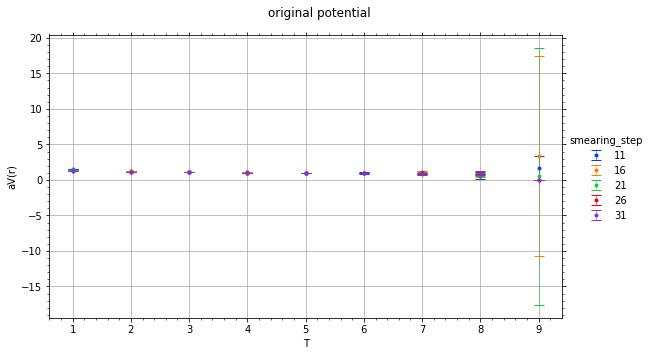

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=19


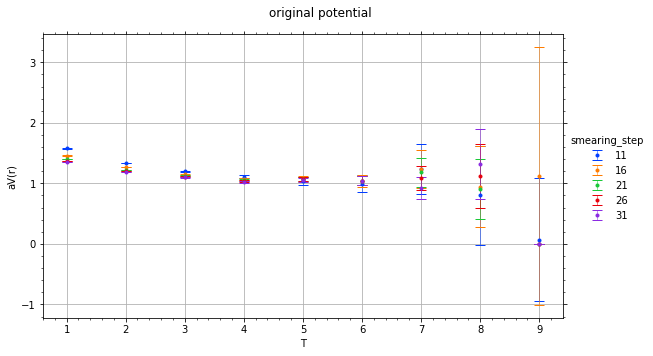

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=20


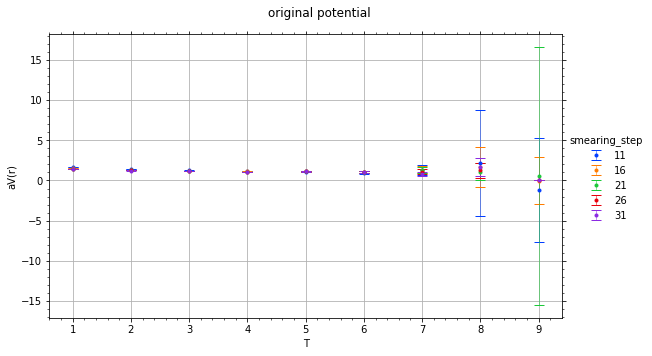

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=21


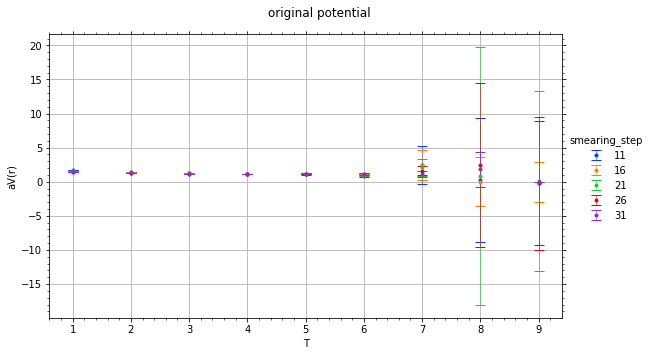

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=22


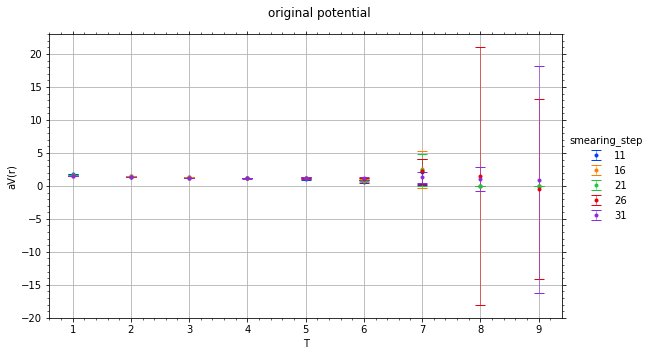

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=23


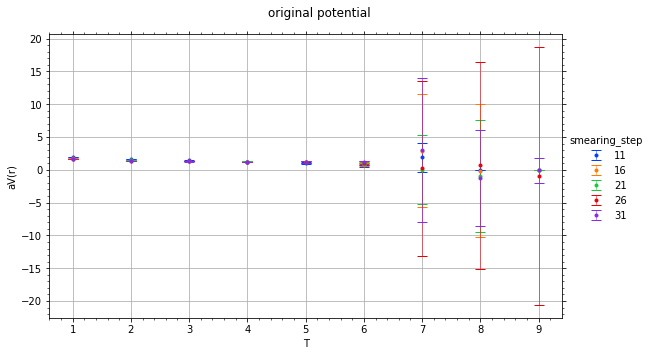

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=24


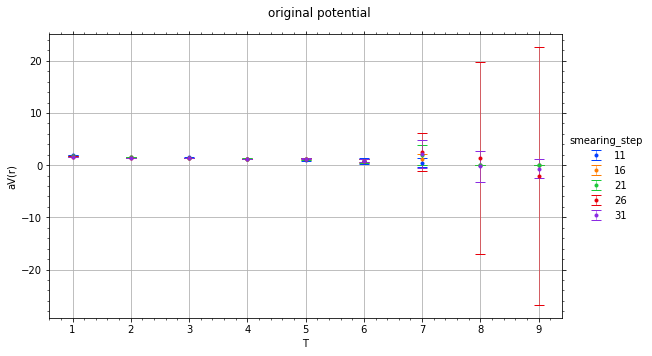

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=25


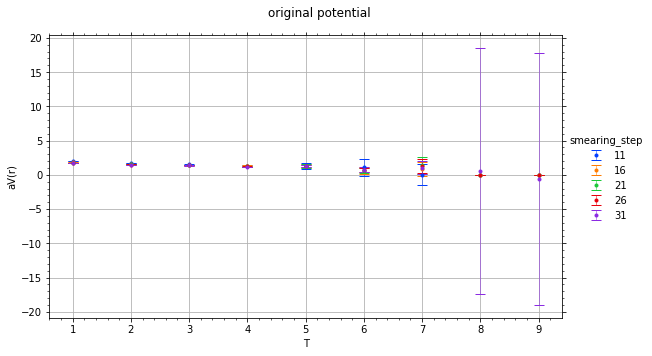

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=26


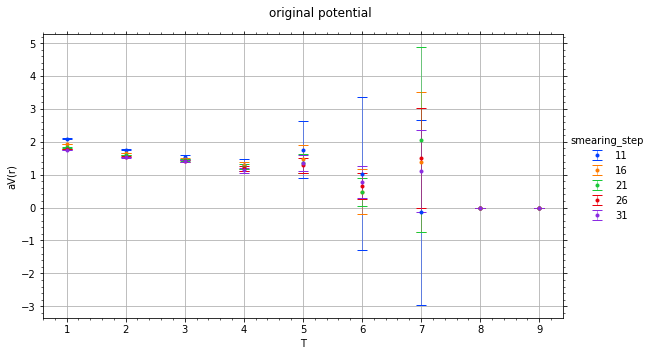

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=27


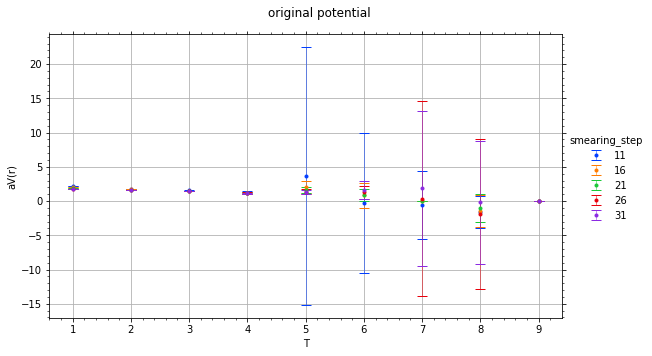

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=28


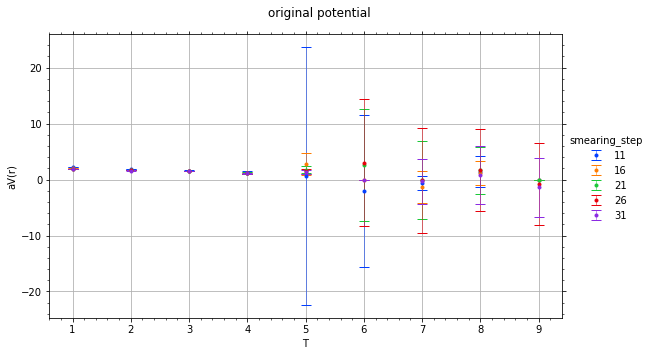

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=29


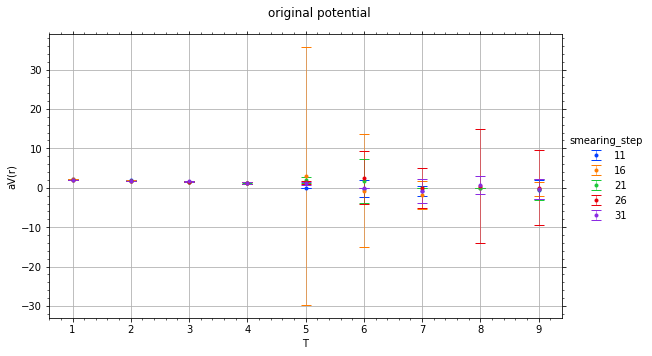

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=30


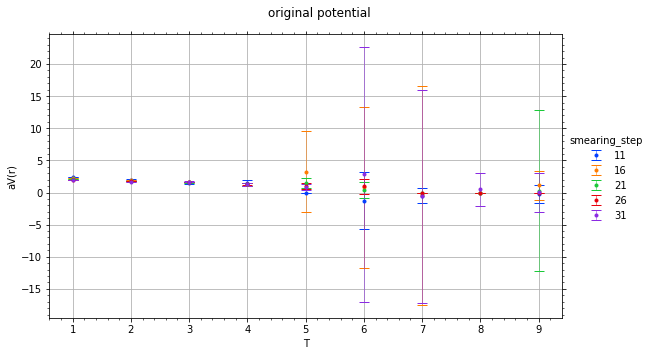

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=31


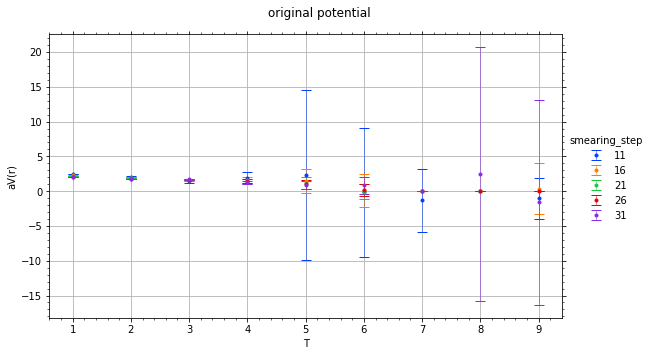

../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence/potential_original_smearing_r=32


In [5]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt20/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 1}, 'constraints': {'r/a': (10, 32), 'T': (1, 10)}}]
image_path = f'../../images/potential/smearing/su3/QCD/140MeV/nt20/T_dependence'
image_name = f'potential_original_smearing'
data = potential_data.get_potantial_df(paths)
data = data[data['smearing_step'] >= 10]
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_smearing_r={r}', show_plot, err='err')

      smearing_step  r/a  copy   T     field       err      beta  \
0                 1    1     0   1  0.884334  0.000003  beta=6.0   
1                 1    1     0   2  0.819558  0.000006  beta=6.0   
2                 1    1     0   3  0.764224  0.000009  beta=6.0   
3                 1    1     0   4  0.713692  0.000012  beta=6.0   
4                 1    1     0   5  0.666809  0.000014  beta=6.0   
...             ...  ...   ...  ..       ...       ...       ...   
1915             22   12     0   6 -0.000002  0.000004  beta=6.0   
1916             22   12     0   7  0.000003  0.000004  beta=6.0   
1917             22   12     0   8 -0.000002  0.000004  beta=6.0   
1918             22   12     0   9 -0.000007  0.000004  beta=6.0   
1919             22   12     0  10 -0.000002  0.000004  beta=6.0   

     potential_type  smearing  
0          original         1  
1          original         1  
2          original         1  
3          original         1  
4          original    

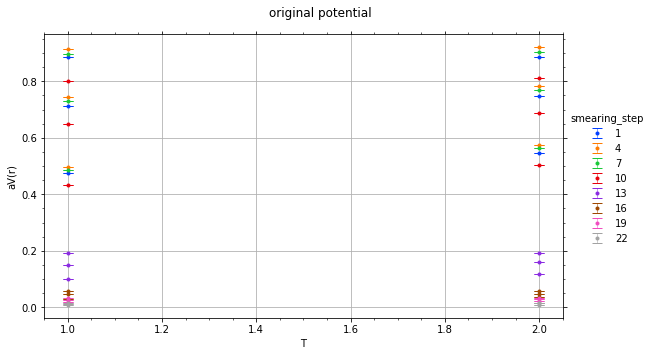

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=1


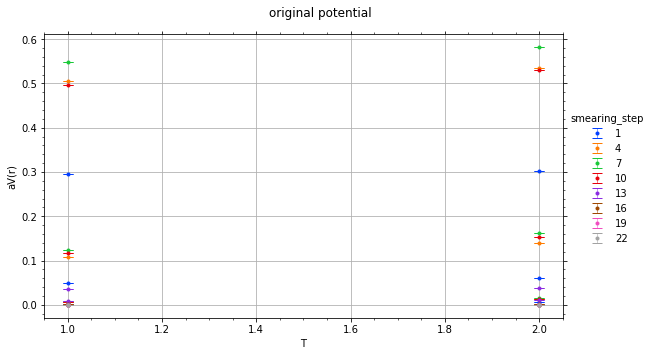

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=6


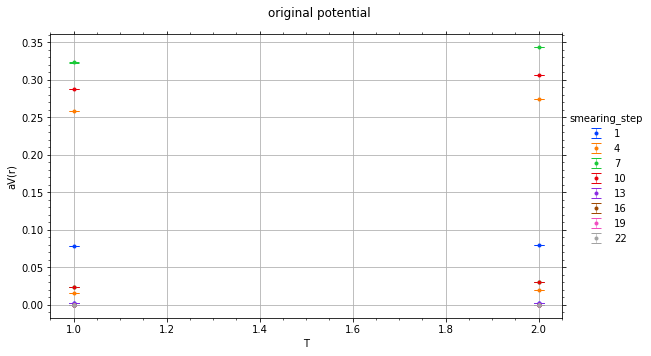

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=12


In [42]:
show_plot = True
coordinate = 'smearing'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=0.75_0.6_0.3_APE_alpha=0.8/smearing/wilson_loop_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 1}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}},
          {'path': '../../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.8/smearing/wilson_loop_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 2}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence'
image_name = f'potential_original_smearing'
data = potential_data.get_potantial_df(paths)
print(data)
data = data[data['T'].isin([1, 4, 10])]
data = data[data['r/a'].isin([1, 6, 12])]
# data = data[data['smearing_step'] == 10]
print(data[data['smearing_step'] == 22])
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'field', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_smearing_r={r}', show_plot, err='err')

      smearing_step  r/a  copy   T         field       err      beta  \
0                 1    1     0   1  8.656328e-01  0.000004  beta=6.0   
1                 1    1     0   2  8.075017e-01  0.000006  beta=6.0   
2                 1    1     0   3  7.633126e-01  0.000009  beta=6.0   
3                 1    1     0   4  7.236665e-01  0.000012  beta=6.0   
4                 1    1     0   5  6.866233e-01  0.000014  beta=6.0   
...             ...  ...   ...  ..           ...       ...       ...   
4795             22   12     0   6 -2.325593e-07  0.000003  beta=6.0   
4796             22   12     0   7 -1.620863e-06  0.000003  beta=6.0   
4797             22   12     0   8 -1.214097e-07  0.000003  beta=6.0   
4798             22   12     0   9  5.449185e-07  0.000003  beta=6.0   
4799             22   12     0  10  9.418095e-07  0.000003  beta=6.0   

     potential_type  smearing  
0          original       0.2  
1          original       0.2  
2          original       0.2  
3      

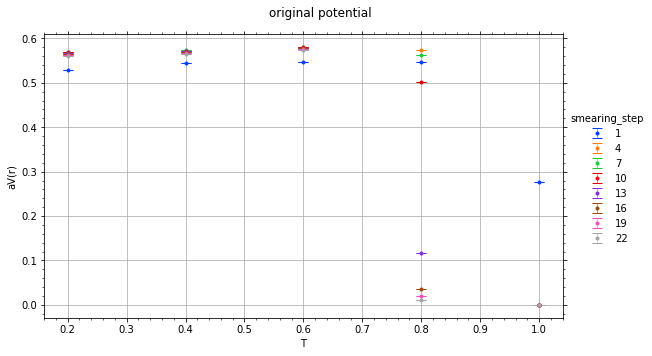

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=1


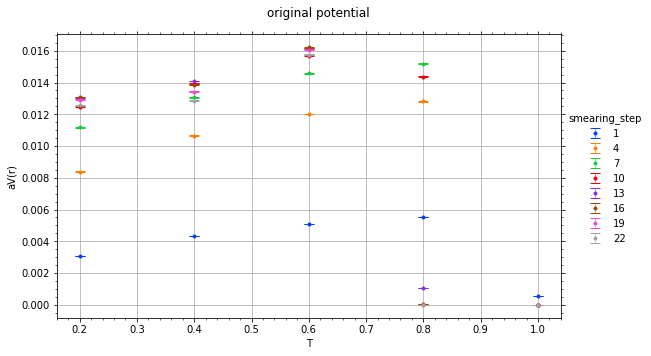

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=6


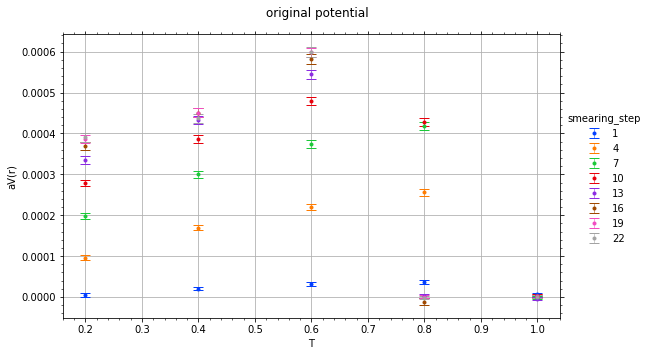

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=12


In [37]:
show_plot = True
coordinate = 'smearing'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.2/smearing/wilson_loop_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 0.2}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}},
          {'path': '../../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.4/smearing/wilson_loop_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 0.4}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}},
          {'path': '../../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.6/smearing/wilson_loop_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 0.6}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}},
          {'path': '../../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.8/smearing/wilson_loop_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 0.8}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}},
          {'path': '../../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=1/smearing/wilson_loop_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 1}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence'
image_name = f'potential_original_smearing'
data = potential_data.get_potantial_df(paths)
print(data)
data = data[data['T'].isin([10])]
data = data[data['r/a'].isin([1, 6, 12])]
# data = data[data['smearing'] == 0.4]
print(data[data['smearing_step'] == 22])
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'field', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_smearing_r={r}', show_plot, err='err')

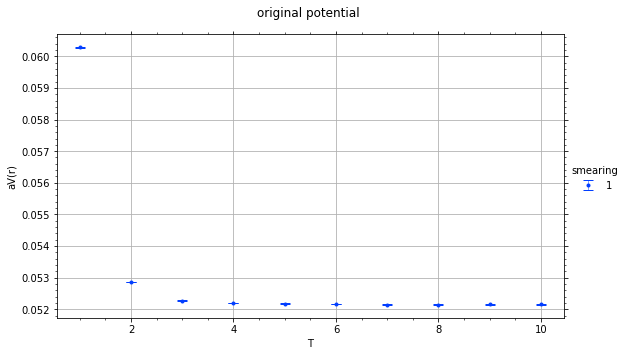

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=1


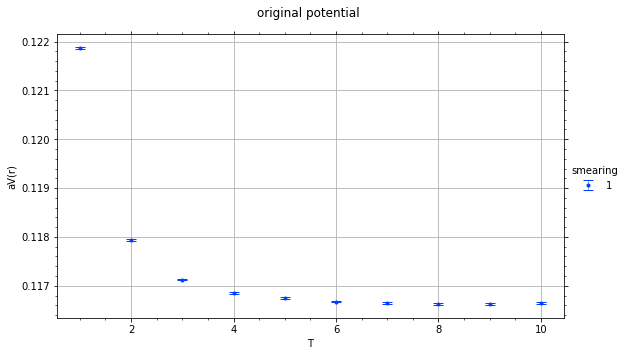

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=2


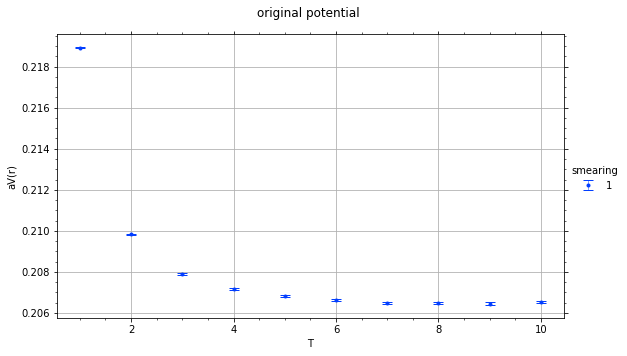

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=3


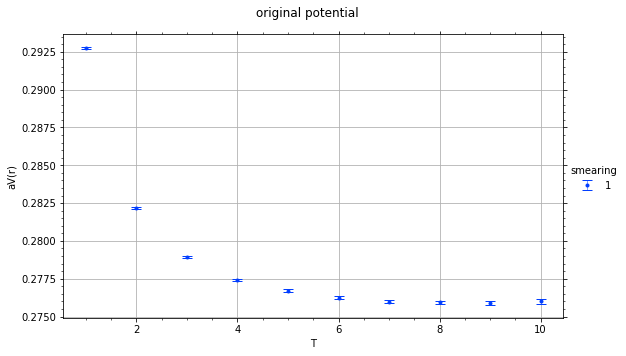

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=4


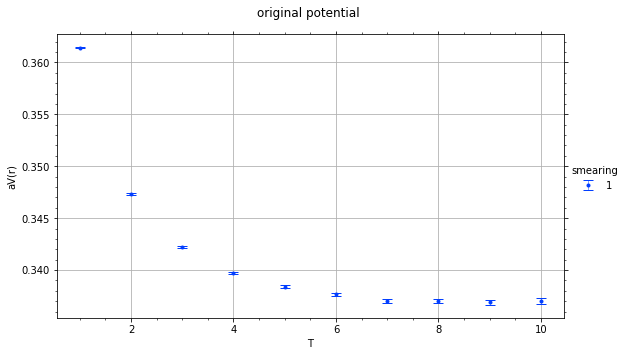

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=5


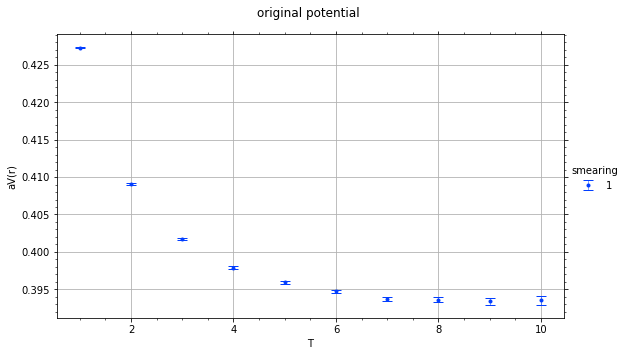

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=6


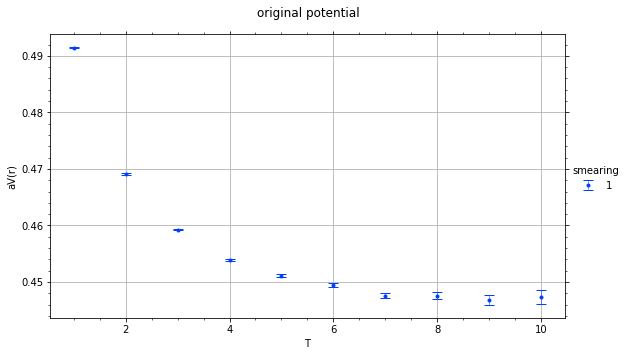

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=7


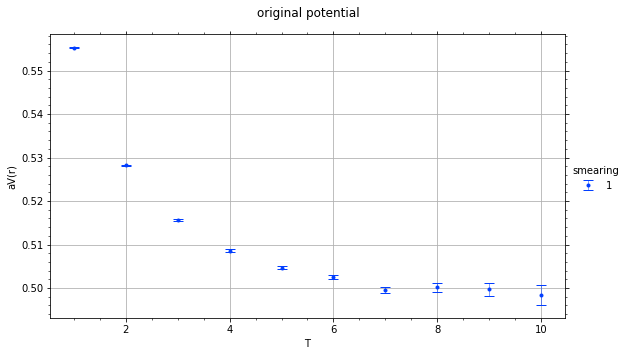

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=8


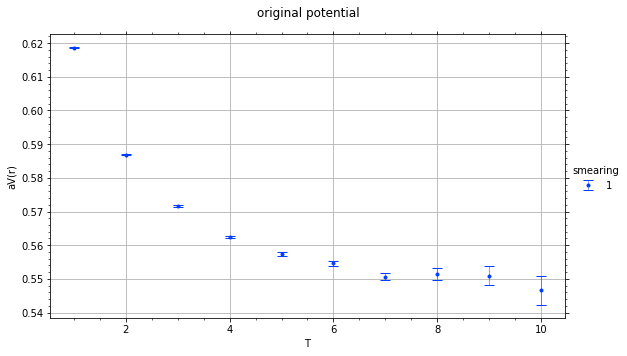

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=9


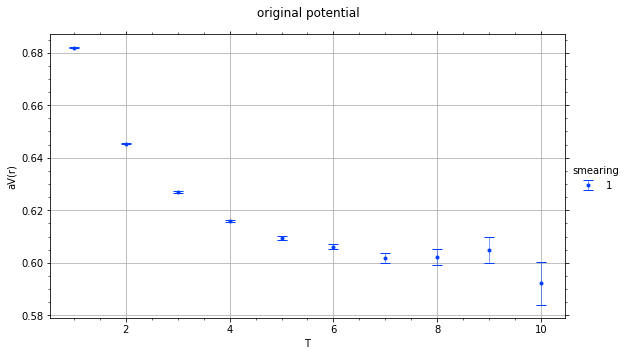

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=10


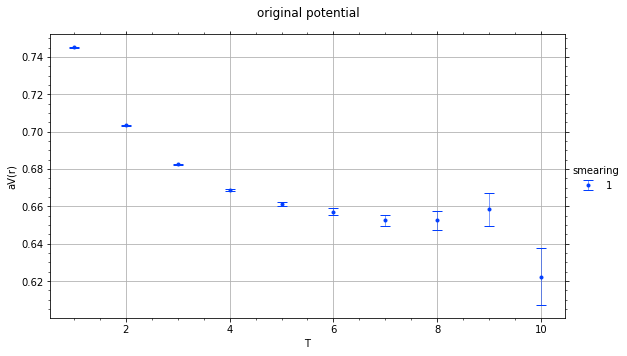

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=11


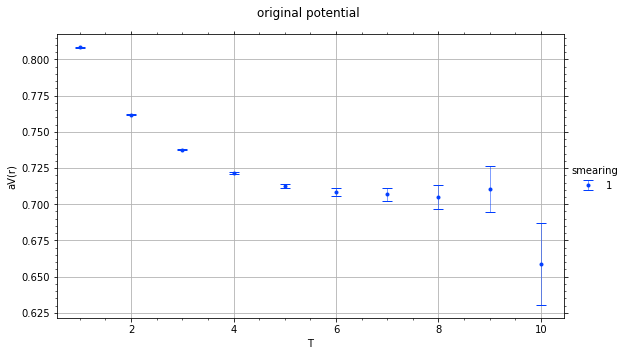

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=12


In [48]:
show_plot = True
coordinate = 'T'
hue = 'smearing'
groupby = []
# paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=0.75_0.6_0.3_APE_alpha=0.8/smearing/potential_original.csv',
#           'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 1}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}},
#           {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.8/smearing/potential_original.csv',
#           'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 2}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}}]
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.8/smearing/potential_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 1}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence'
image_name = f'potential_original_smearing'
data = potential_data.get_potantial_df(paths)
data = data[data['smearing_step'] == 10]
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_smearing_r={r}', show_plot, err='err')

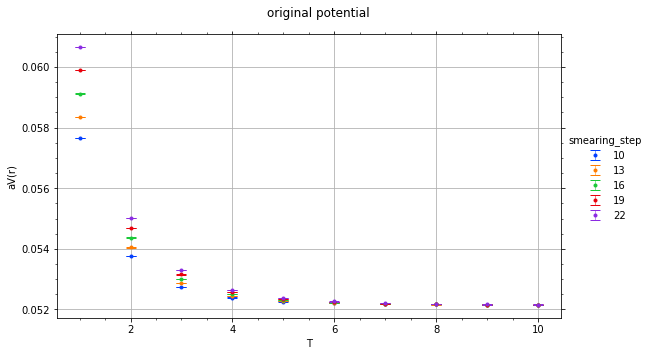

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=1


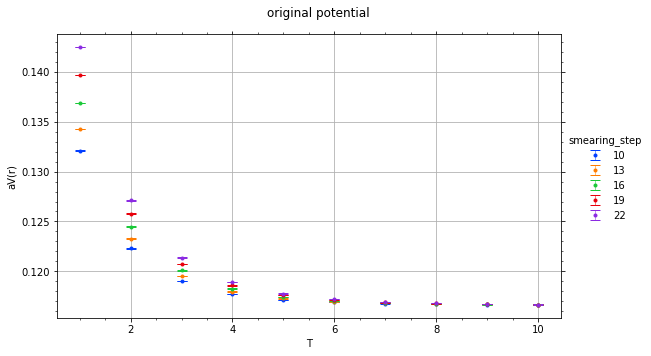

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=2


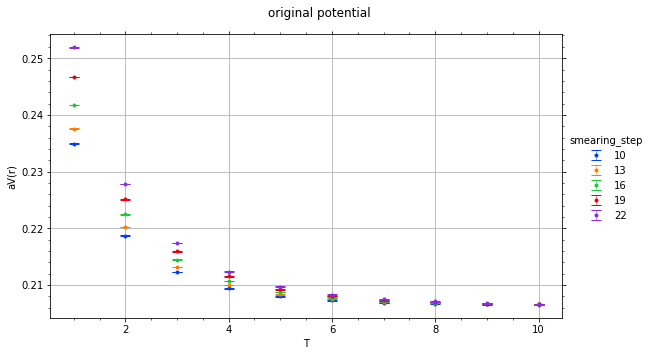

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=3


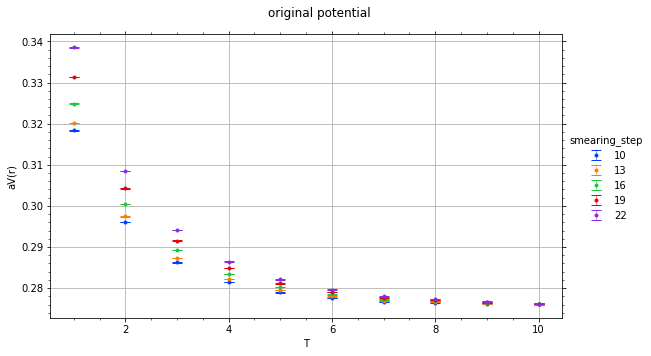

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=4


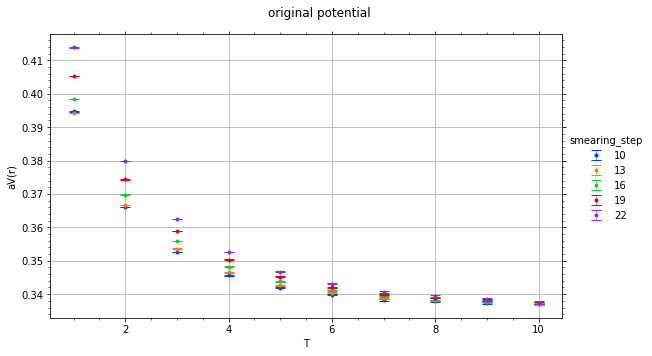

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=5


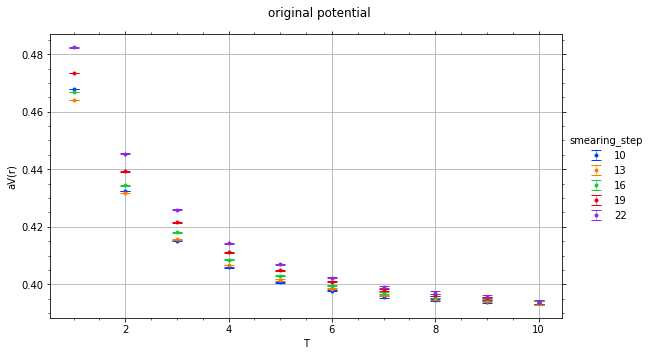

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=6


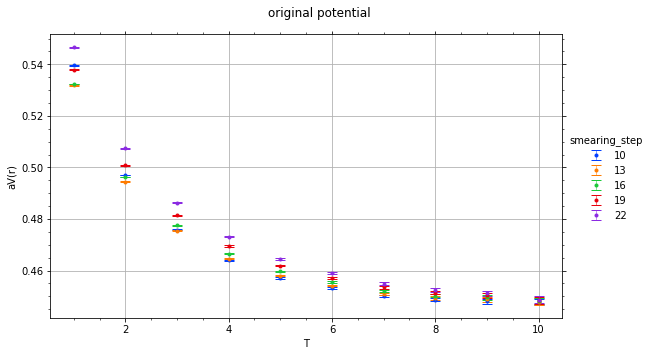

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=7


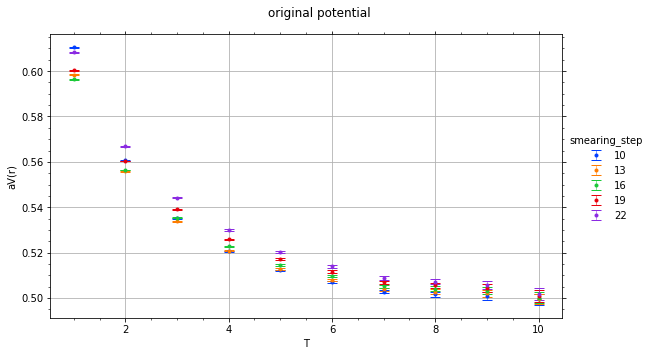

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=8


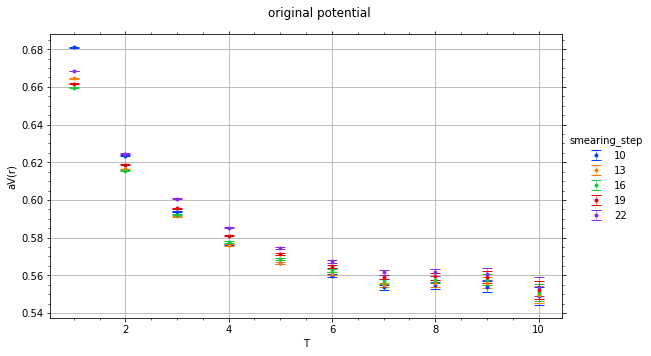

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=9


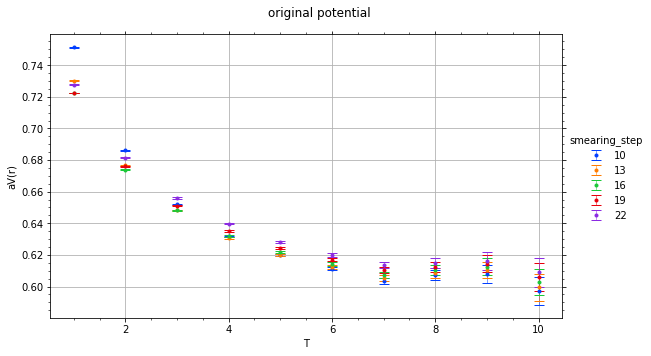

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=10


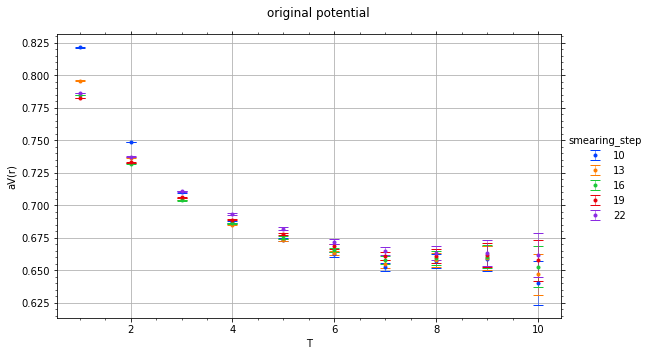

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=11


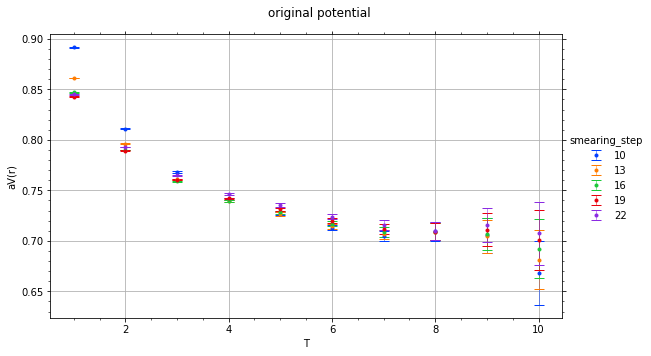

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_smearing_r=12


In [36]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.4/smearing/potential_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 0.8}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence'
image_name = f'potential_original_smearing'
data = potential_data.get_potantial_df(paths)
data = data[data['smearing_step'] >= 10]
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_smearing_r={r}', show_plot, err='err')

7       no
17      no
27      no
37      no
47      no
57      no
67      no
77      no
87      no
97      no
107     no
117     no
127     no
137     no
147     no
157     no
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
0      yes
Name: T_fit, dtype: object


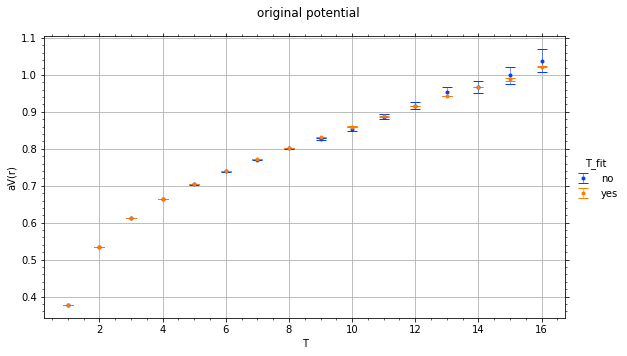

../../images/potential/su3/gluodynamics/32^3/beta6.2//potential_orignal


In [2]:
show_plot = True
coordinate = 'r/a'
hue = 'T_fit'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'original', 'smearing': 'APE'}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}}]
image_path = f'../../images/potential/su3/gluodynamics/32^3/beta6.2/'
image_name = f'potential_orignal'
data = potential_data.get_potantial_df(paths)
data1 = data.groupby('r/a').apply(fit.potential_fit_T, (2, 8)).reset_index(level='r/a')
data1['beta'] = data['beta']
data1['potential_type'] = data['potential_type']
data1['smearing'] = data['smearing']
data = data[data['T'] == 8]
data['T_fit'] = 'no'
data1['T_fit'] = 'yes'
data = pd.concat([data, data1])
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err')

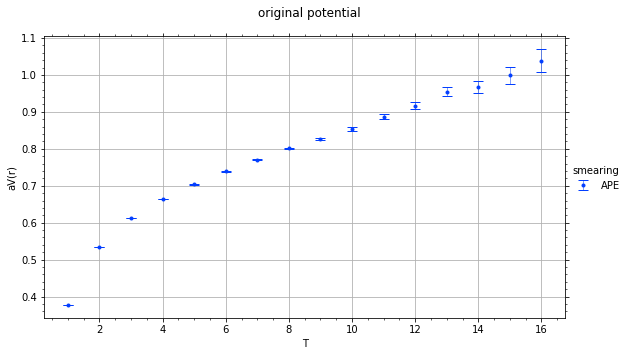

../../images/potential/su3/gluodynamics/32^3/beta6.2//potential_orignal


In [4]:
show_plot = True
coordinate = 'r/a'
hue = 'smearing'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'original', 'smearing': 'APE'}, 'constraints': {'r/a': (1, 16), 'T': (8, 8)}}]
image_path = f'../../images/potential/su3/gluodynamics/32^3/beta6.2/'
image_name = f'potential_orignal'
data = potential_data.get_potantial_df(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err')

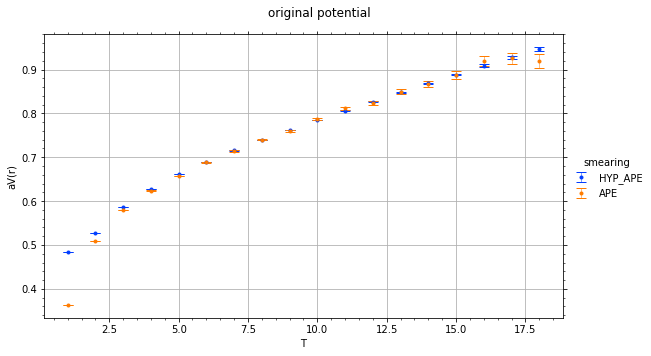

../../images/potential/su3/gluodynamics/36^4/beta6.3//potential_orignal


In [2]:
show_plot = True
coordinate = 'r/a'
hue = 'smearing'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.3', 'potential_type': 'original', 'smearing': 'HYP_APE'}, 'constraints': {'r/a': (1, 18), 'T': (10, 10)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.3', 'potential_type': 'original', 'smearing': 'APE'}, 'constraints': {'r/a': (1, 18), 'T': (8, 8)}}]
image_path = f'../../images/potential/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_orignal'
data = potential_data.get_potantial_df(paths)
data.loc[data['smearing'] == 'HYP_APE'] = potential_analyze.shift_fit(data.loc[data['smearing'] == 'HYP_APE'], data.loc[data['smearing'] == 'APE'], (5, 18), (5, 18), fit.func_linear)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err')

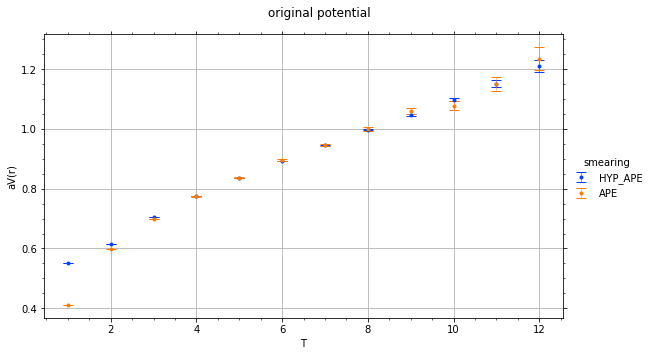

../../images/potential/su3/gluodynamics/24^4/beta6.0//potential_orignal


In [5]:
show_plot = True
coordinate = 'r/a'
hue = 'smearing'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 'HYP_APE'}, 'constraints': {'r/a': (1, 16), 'T': (8, 8)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'original', 'smearing': 'APE'}, 'constraints': {'r/a': (1, 16), 'T': (6, 6)}}]
image_path = f'../../images/potential/su3/gluodynamics/24^4/beta6.0/'
image_name = f'potential_orignal'
data = potential_data.get_potantial_df(paths)
data.loc[data['smearing'] == 'HYP_APE'] = potential_analyze.shift_fit(data.loc[data['smearing'] == 'HYP_APE'], data.loc[data['smearing'] == 'APE'], (5, 16), (5, 16), fit.func_linear)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err')

In [ ]:
show_plot = True
coordinate = 'T'
hue = 'r/a'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.3', 'potential_type': 'monopole'}, 'constraints': {'r/a': (1, 18), 'T': (1, 12)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3/T_dependence'
image_name = f'potential_monopole_'
data = potential_data.get_potantial_df(paths)
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_r={r}', show_plot, err='err')

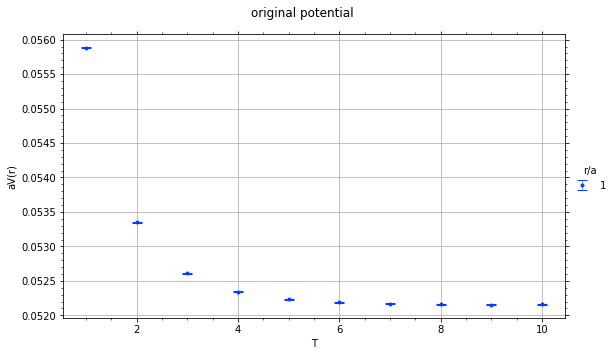

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=1


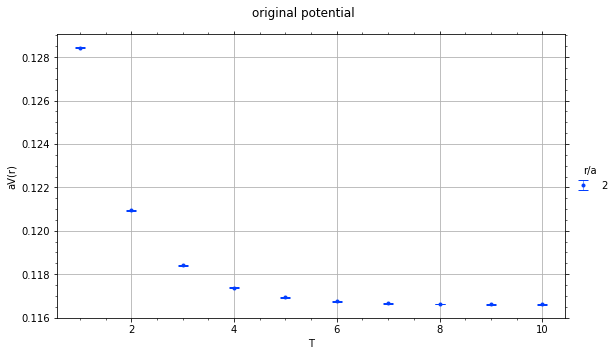

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=2


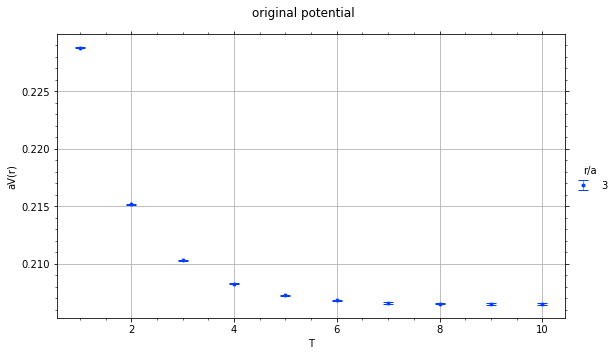

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=3


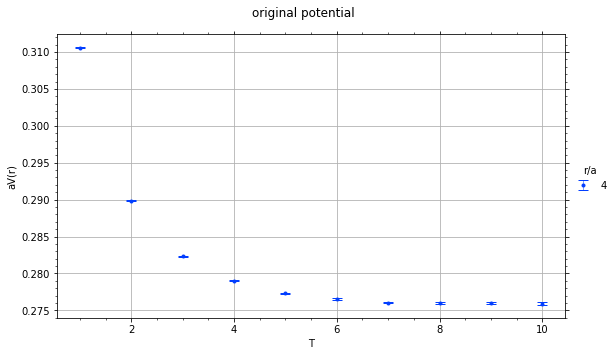

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=4


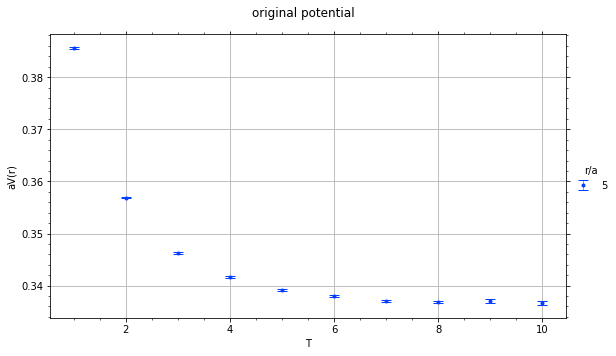

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=5


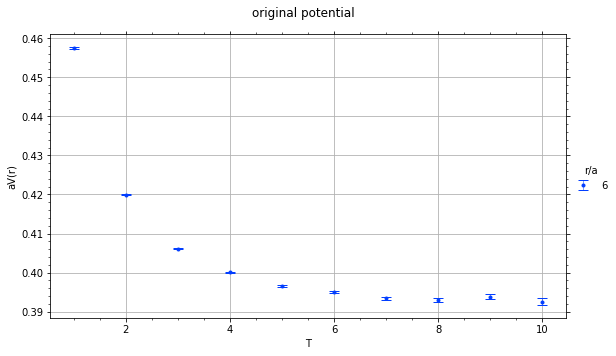

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=6


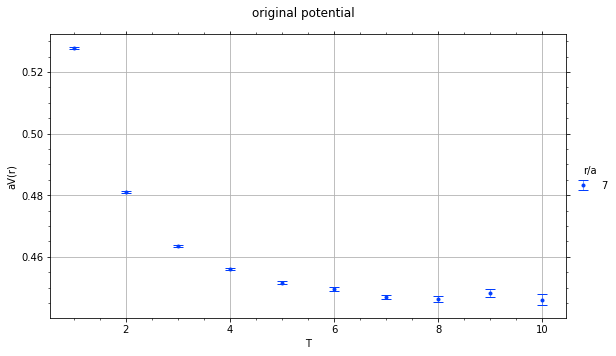

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=7


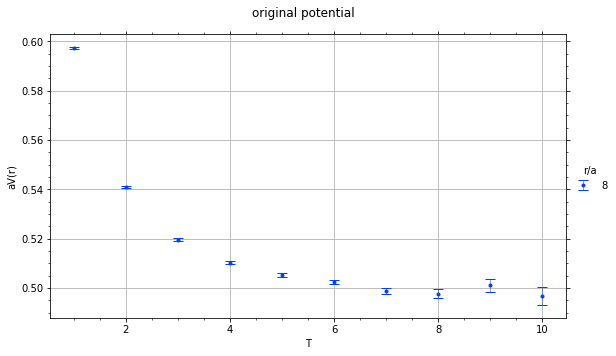

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=8


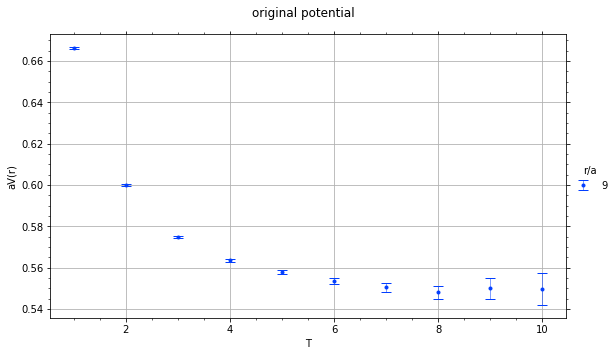

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=9


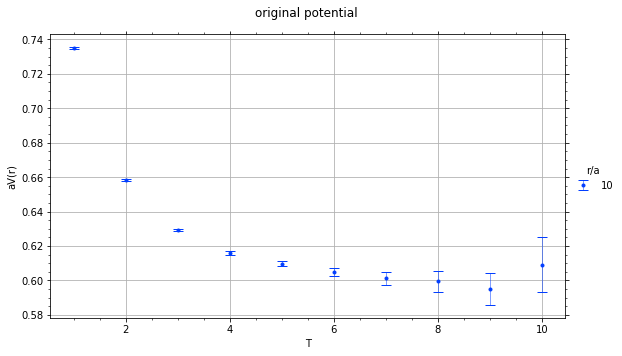

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=10


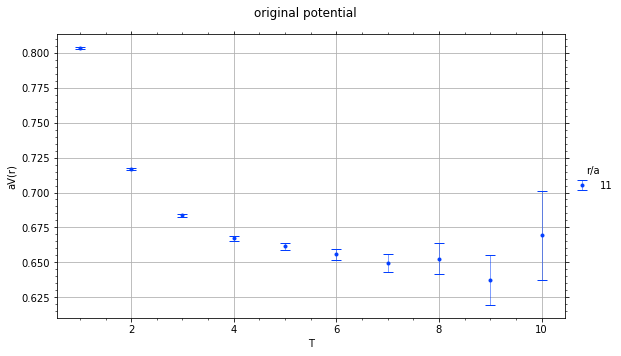

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=11


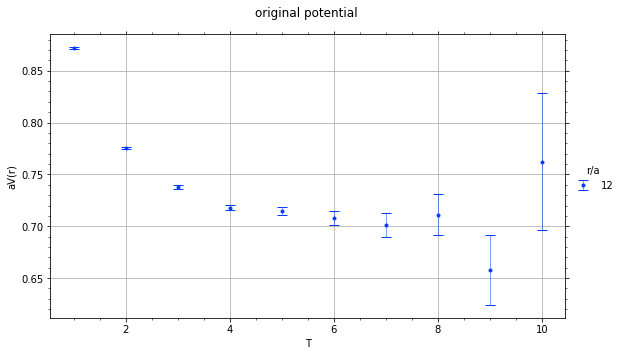

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence/potential_original_r=12


In [31]:
show_plot = True
coordinate = 'T'
hue = 'r/a'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'monopole'}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/T_dependence'
image_name = f'potential_monopole_'
data = potential_data.get_potantial_df(paths)
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_r={r}', show_plot, err='err')

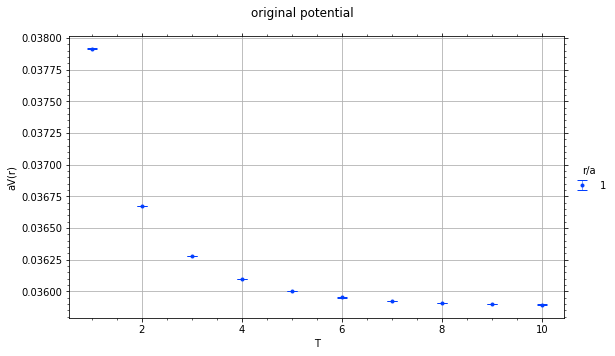

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=1


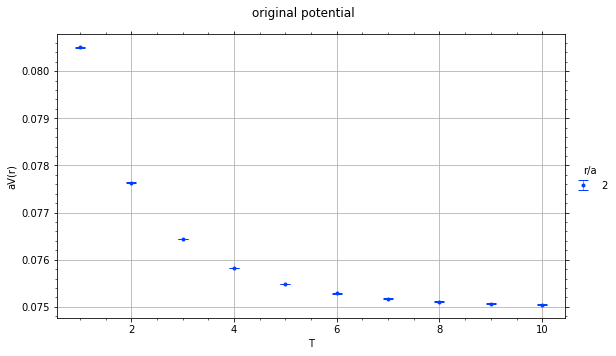

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=2


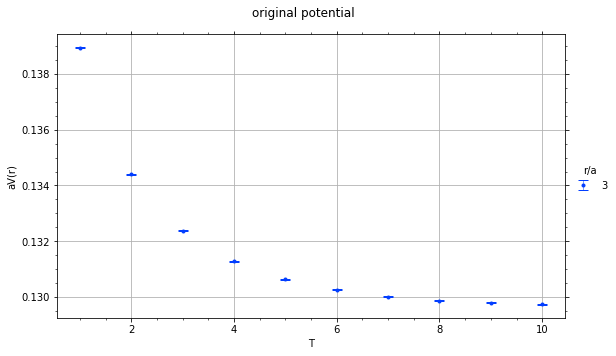

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=3


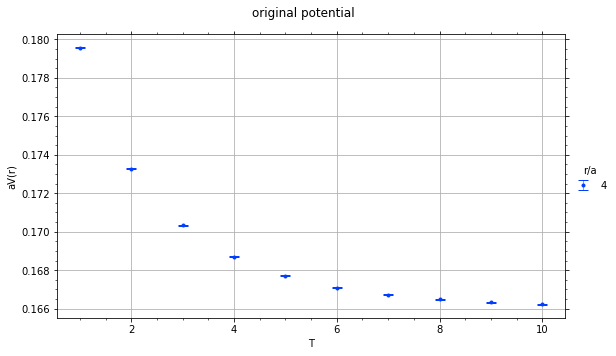

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=4


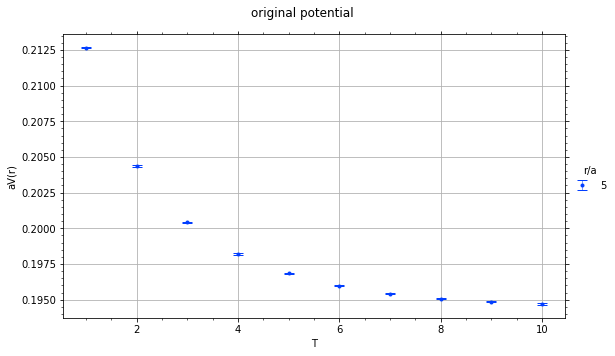

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=5


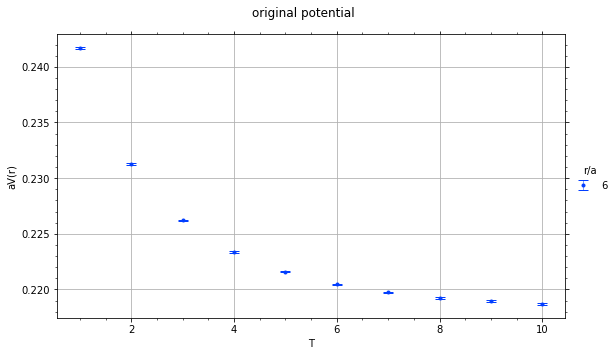

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=6


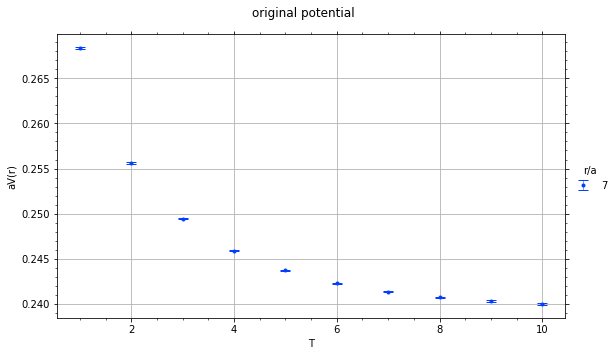

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=7


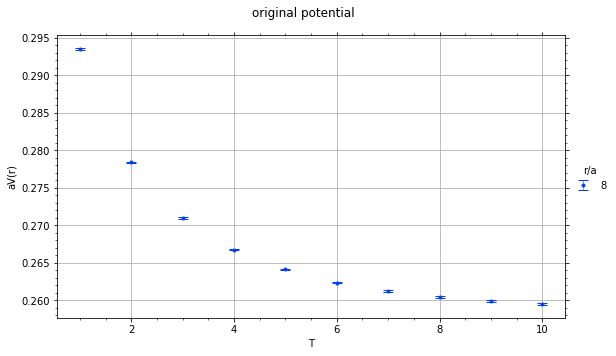

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=8


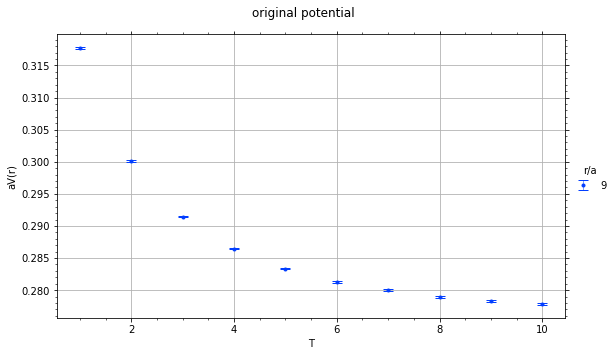

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=9


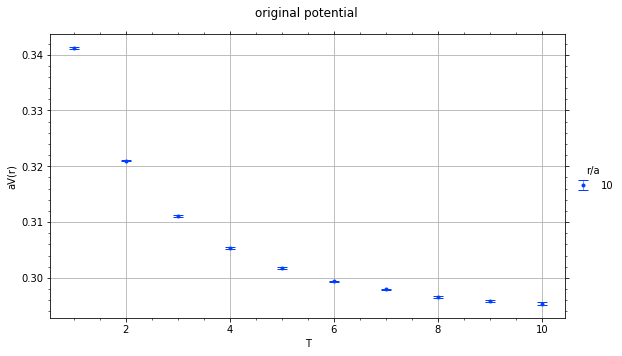

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=10


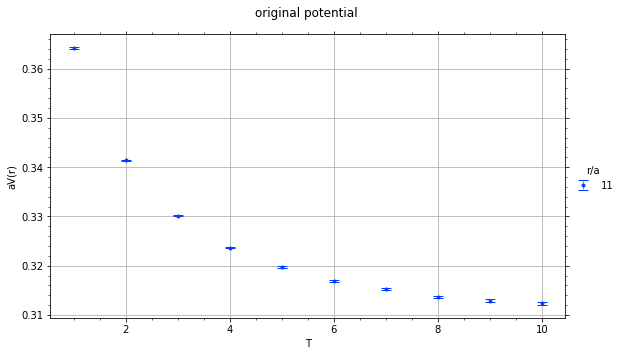

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=11


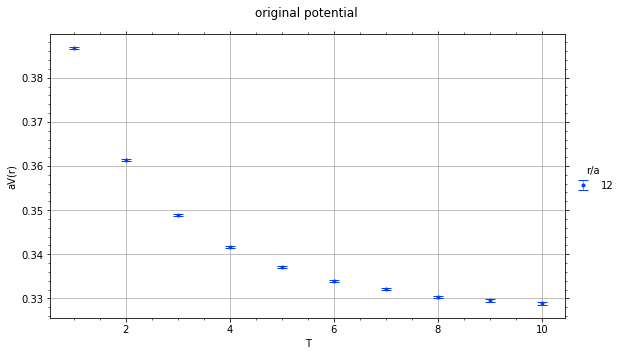

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=12


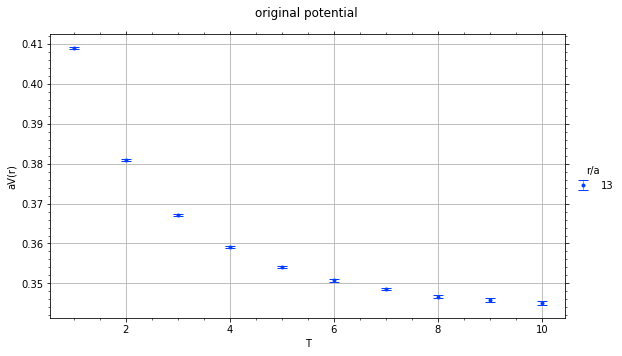

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=13


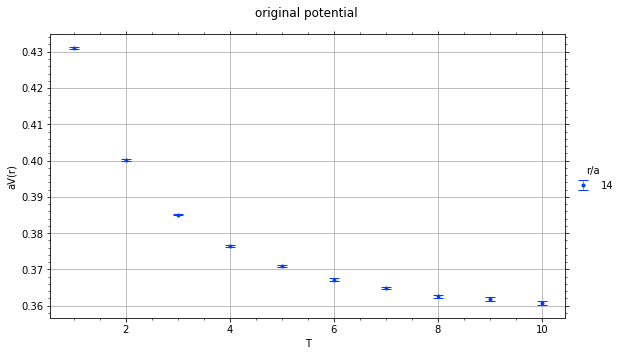

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=14


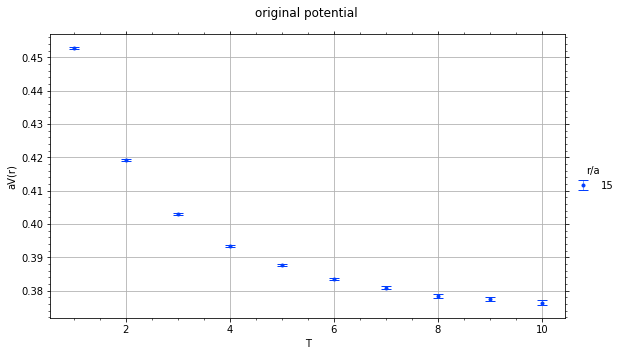

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=15


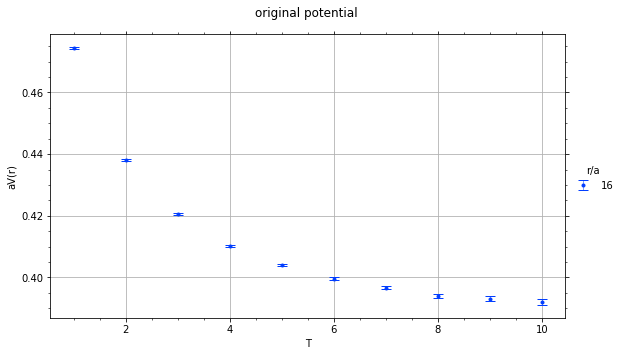

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=16


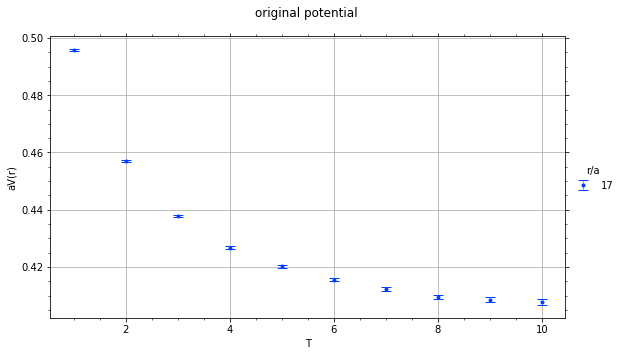

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=17


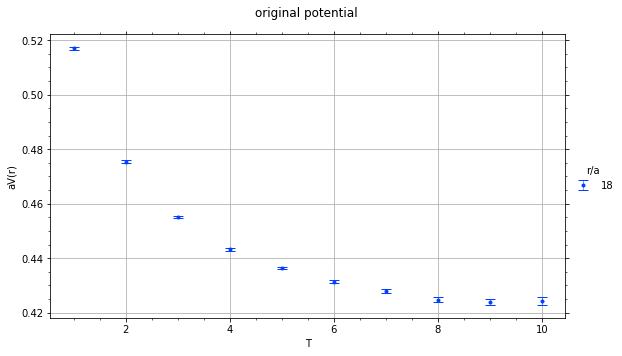

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=18


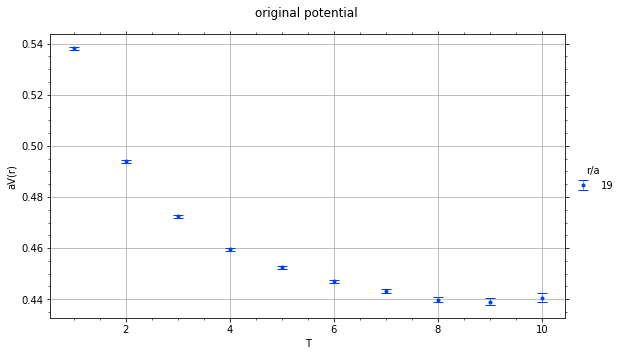

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=19


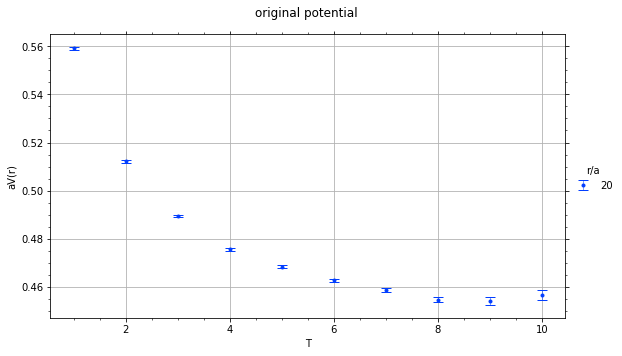

../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence/potential_original_r=20


In [4]:
show_plot = True
coordinate = 'T'
hue = 'r/a'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/40^4/beta6.4/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'monopole'}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/40^4/beta6.4/T_dependence'
image_name = f'potential_original_'
data = potential_data.get_potantial_df(paths)
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_r={r}', show_plot, err='err')

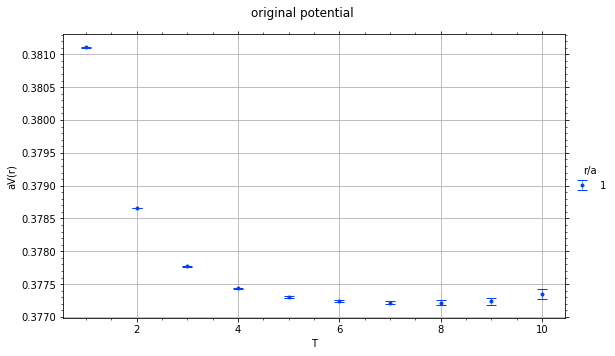

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=1


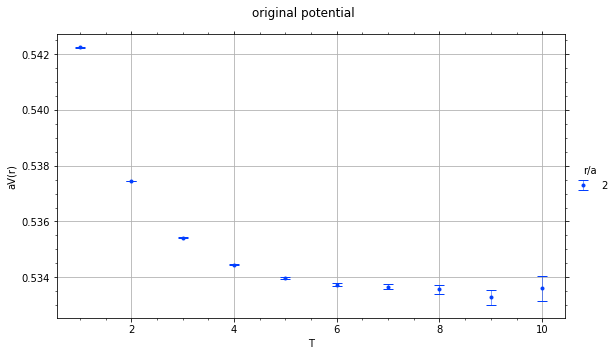

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=2


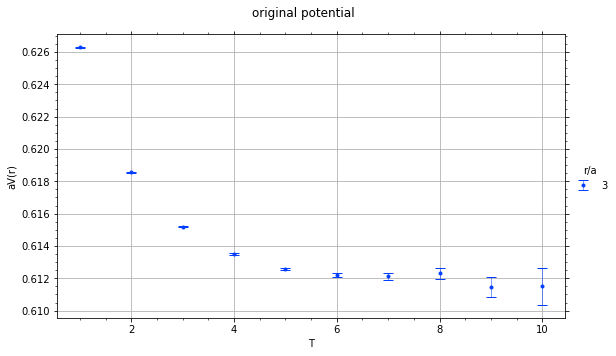

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=3


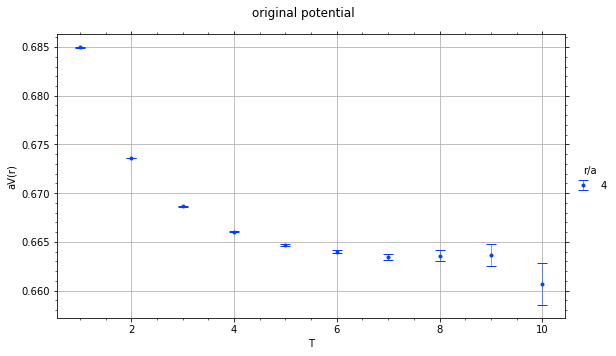

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=4


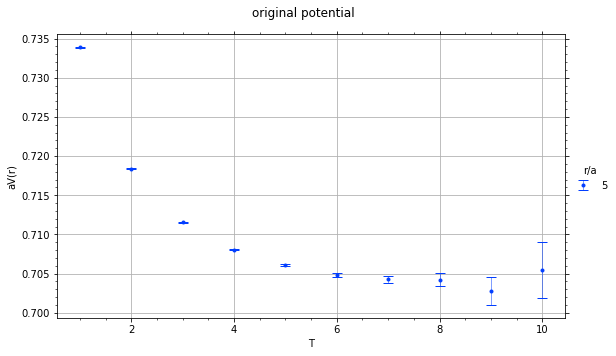

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=5


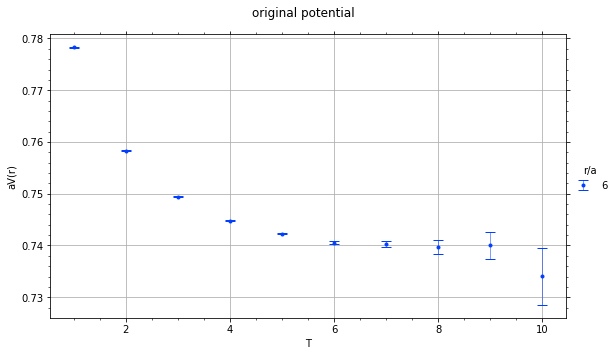

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=6


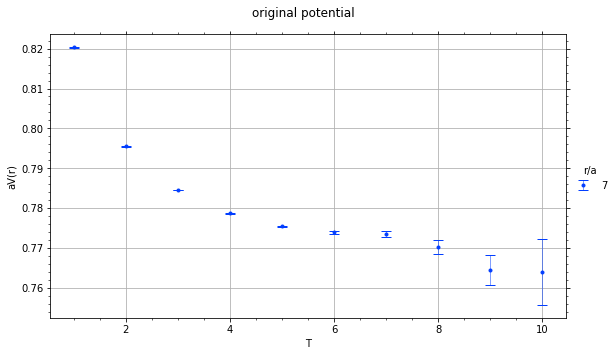

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=7


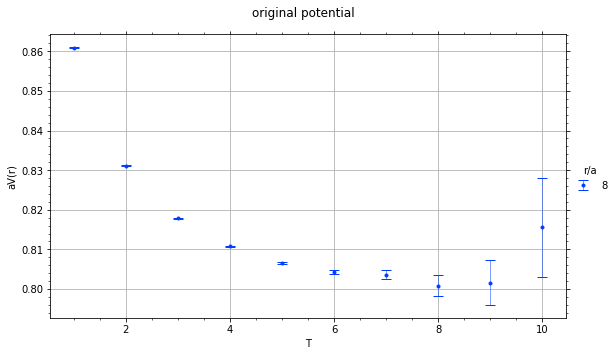

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=8


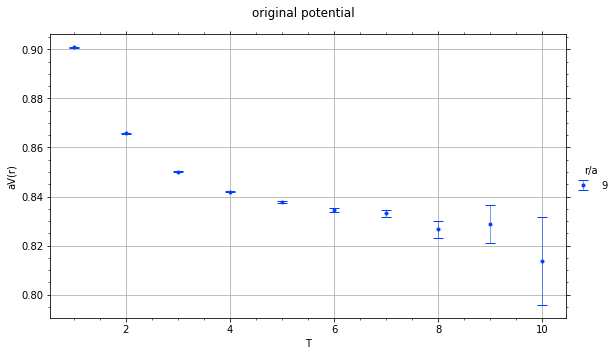

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=9


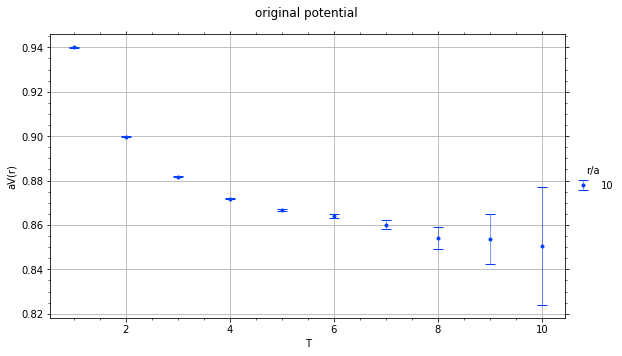

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=10


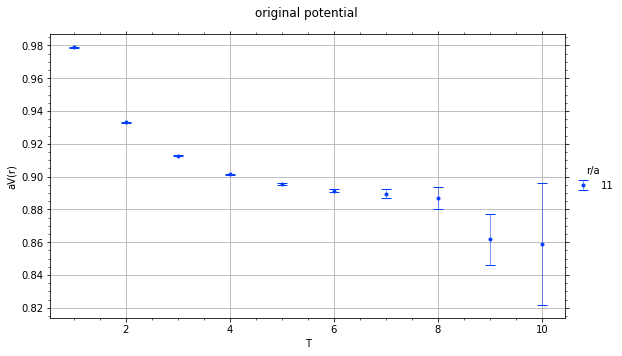

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=11


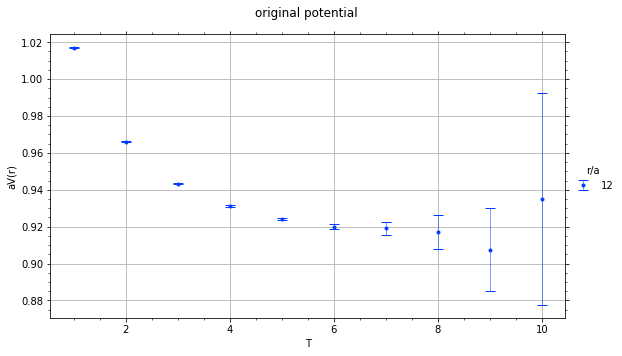

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=12


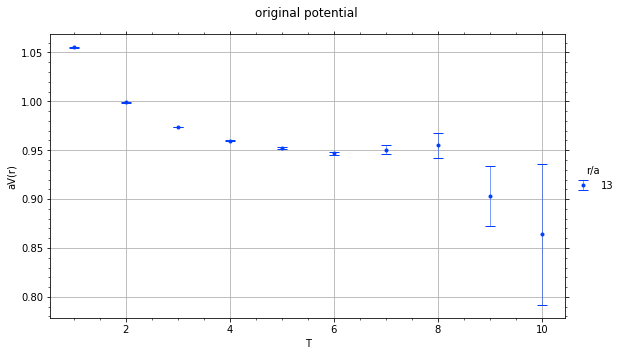

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=13


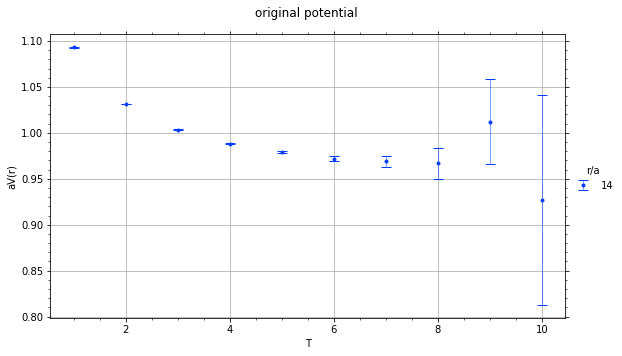

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=14


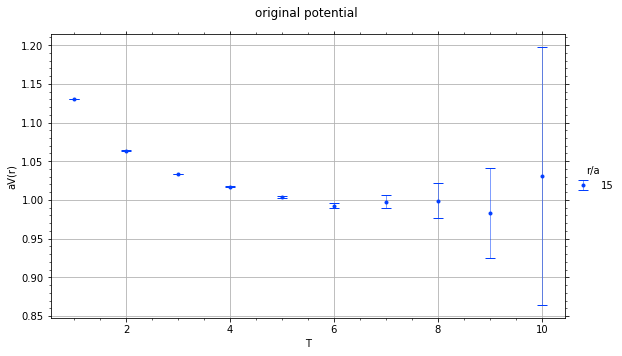

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=15


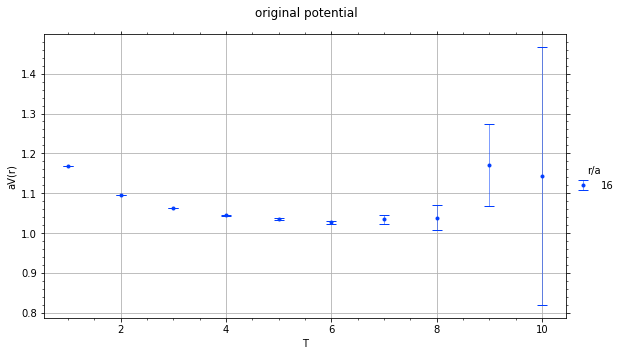

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_original_r=16


In [3]:
show_plot = True
coordinate = 'T'
hue = 'r/a'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'monopole'}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence'
image_name = f'potential_monopole_'
data = potential_data.get_potantial_df(paths)
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'original potential', image_path, f'potential_original_r={r}', show_plot, err='err')

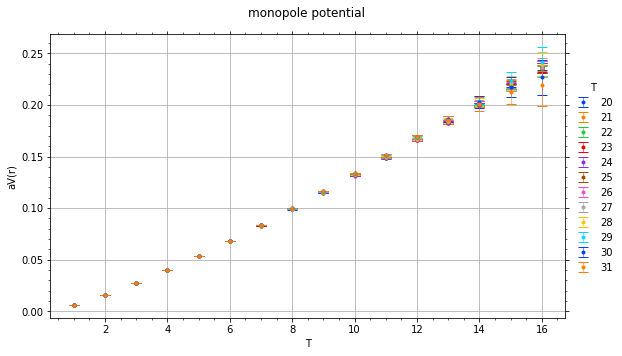

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2//potential_monopole_


In [4]:
show_plot = True
coordinate = 'r/a'
hue = 'T'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'monopole'}, 'constraints': {'r/a': (1, 16), 'T': (20, 31)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/'
image_name = f'potential_monopole_'
data = potential_data.get_potantial_df(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole potential', image_path, image_name, show_plot, err='err')

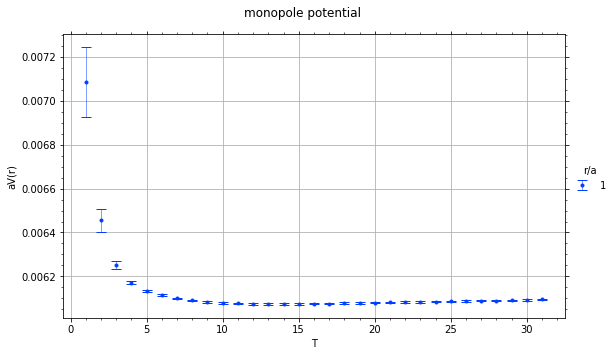

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=1


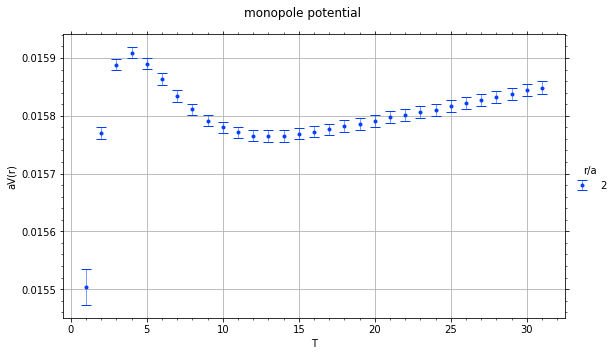

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=2


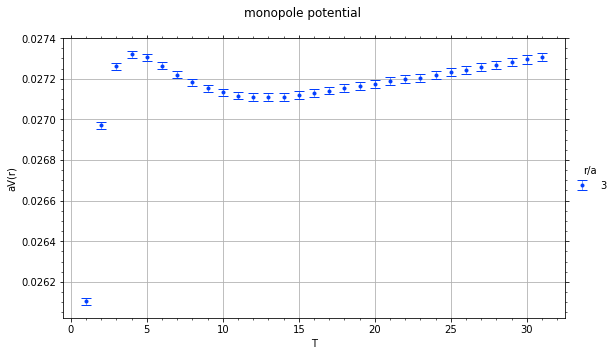

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=3


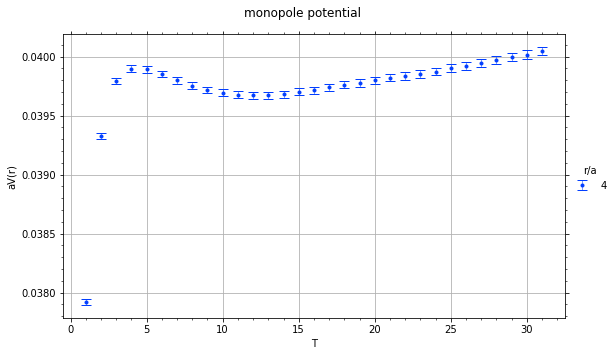

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=4


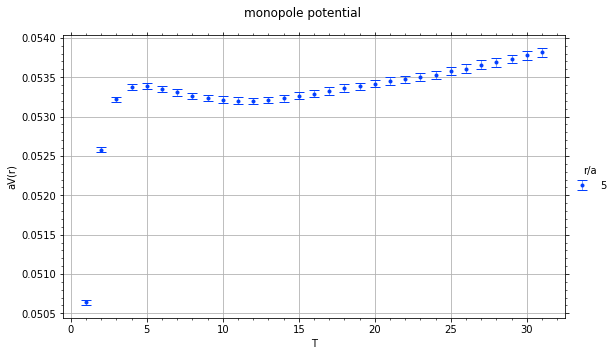

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=5


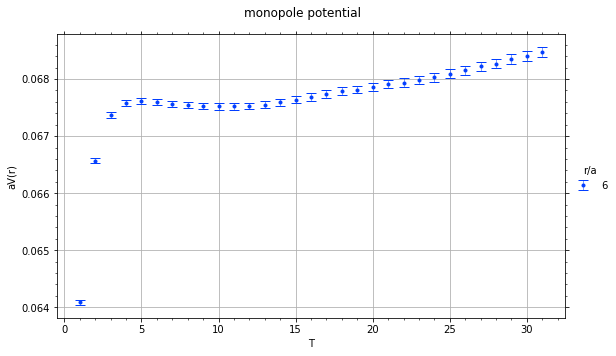

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=6


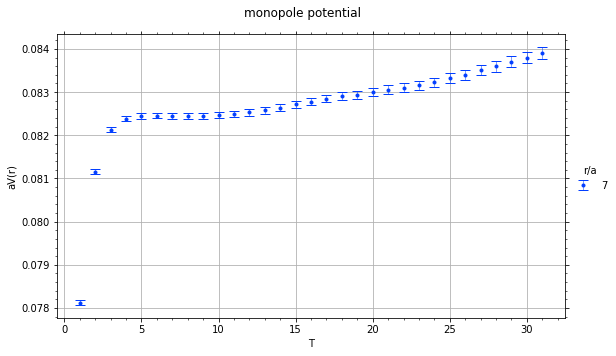

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=7


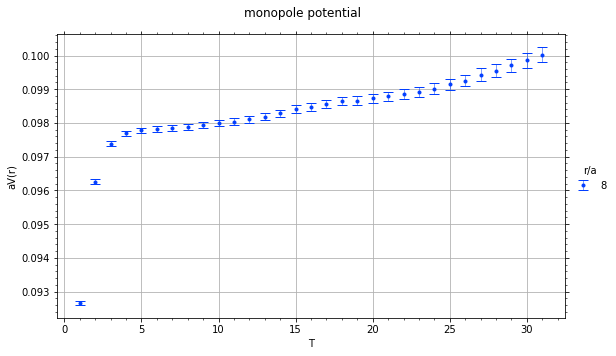

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=8


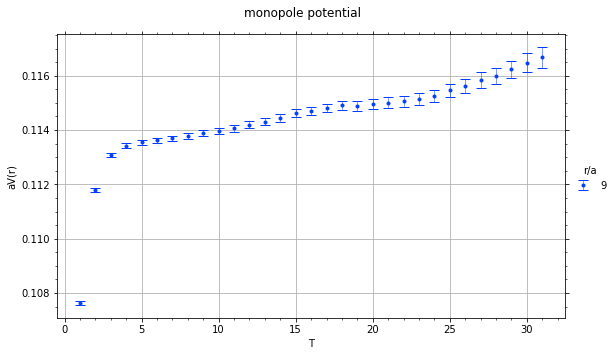

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=9


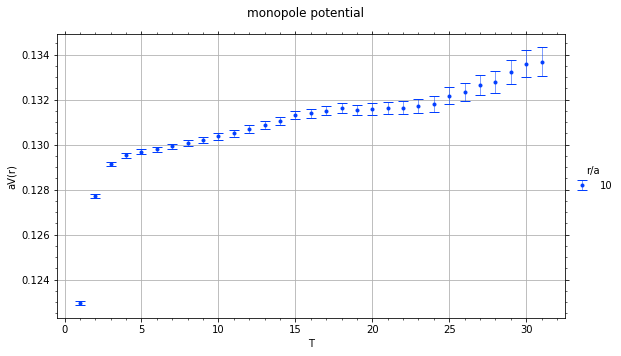

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=10


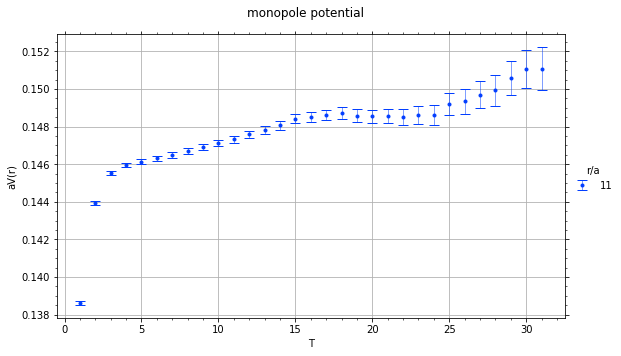

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=11


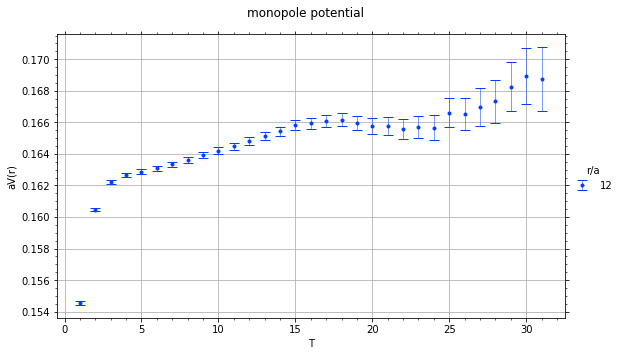

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=12


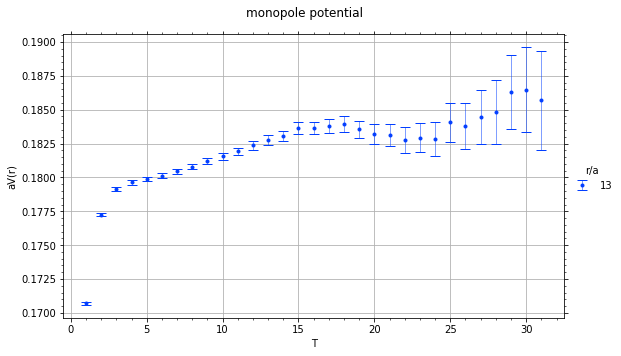

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=13


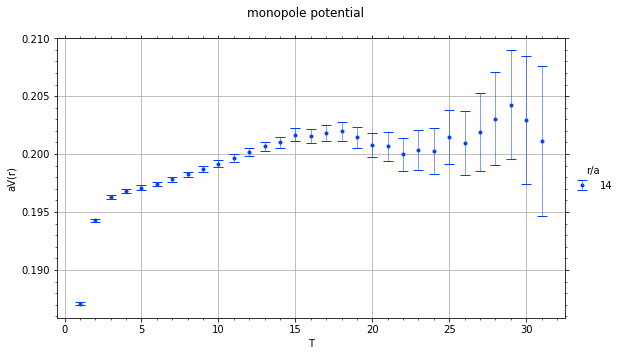

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=14


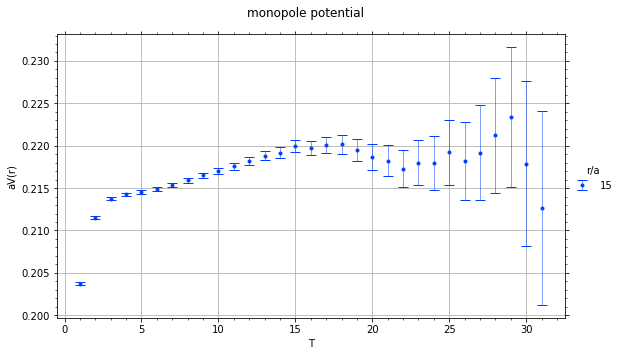

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=15


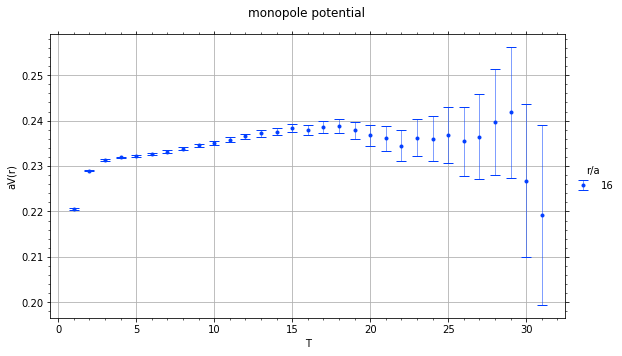

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopole_r=16


In [19]:
show_plot = True
coordinate = 'T'
hue = 'r/a'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'monopole'}, 'constraints': {'r/a': (1, 16), 'T': (1, 31)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence'
image_name = f'potential_monopole_'
data = potential_data.get_potantial_df(paths)
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole potential', image_path, f'potential_monopole_r={r}', show_plot, err='err')

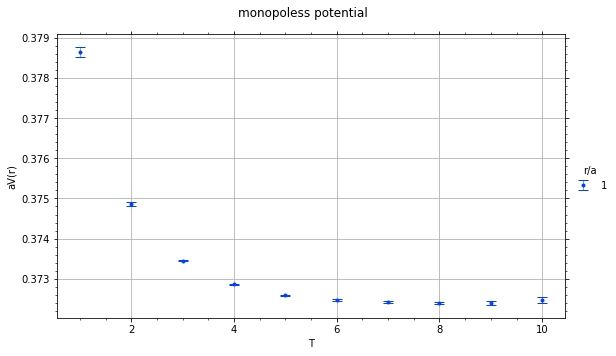

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=1


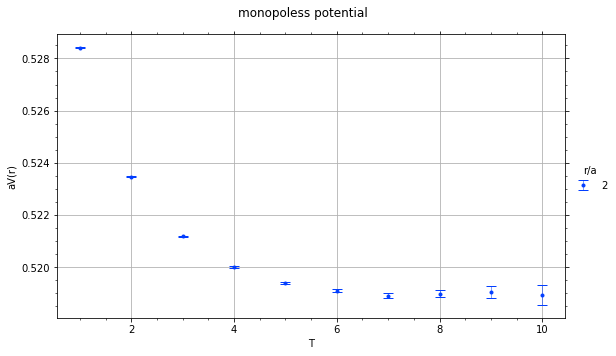

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=2


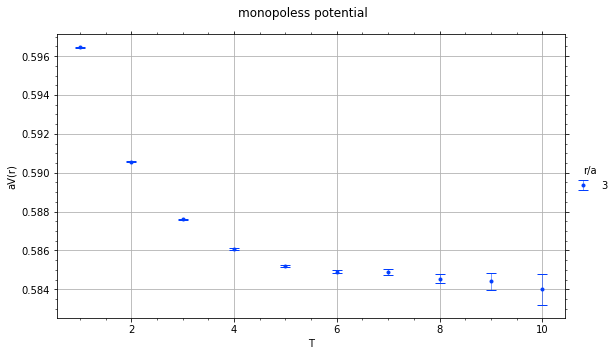

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=3


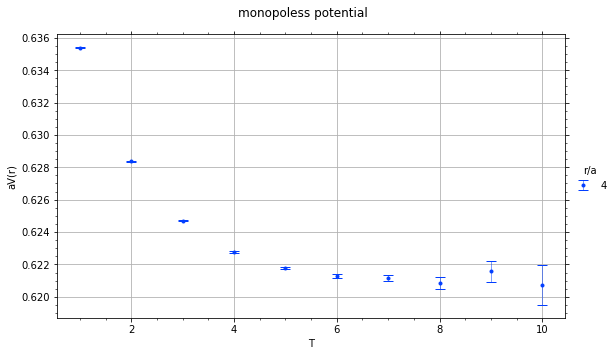

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=4


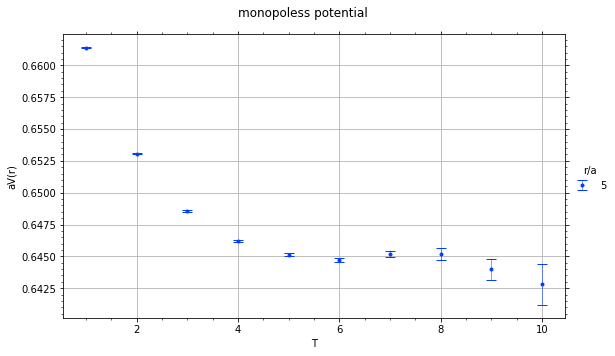

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=5


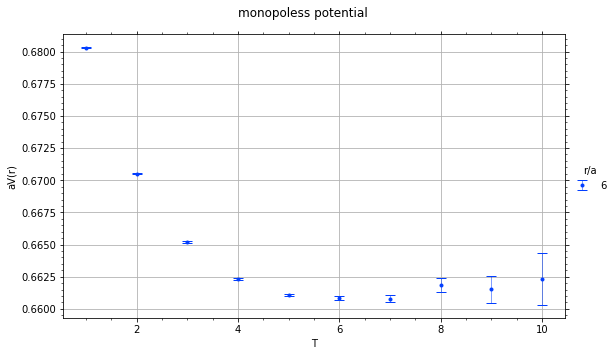

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=6


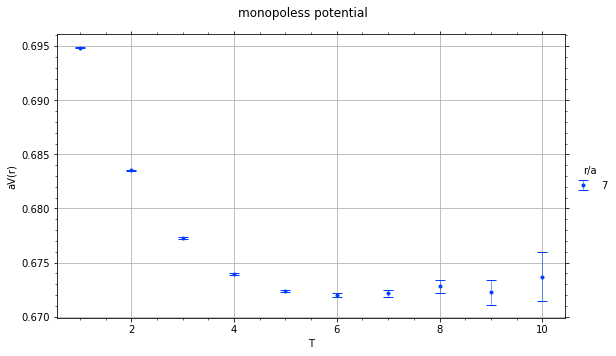

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=7


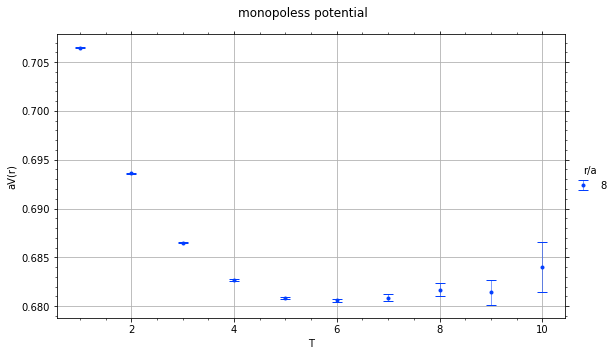

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=8


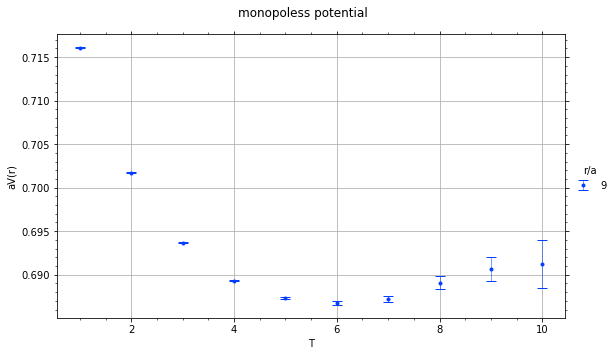

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=9


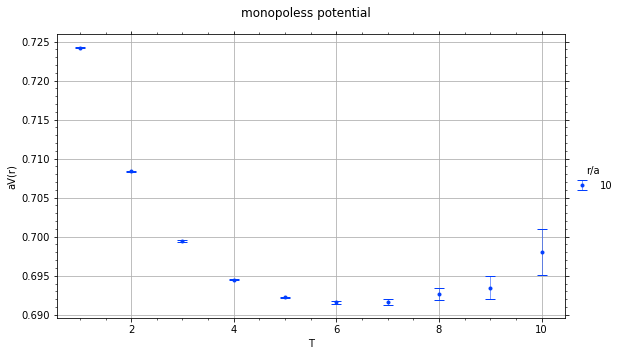

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=10


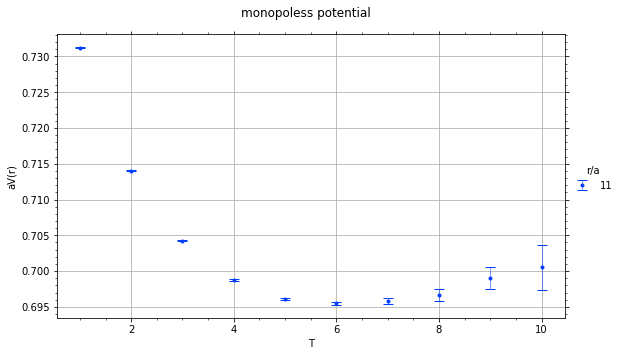

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=11


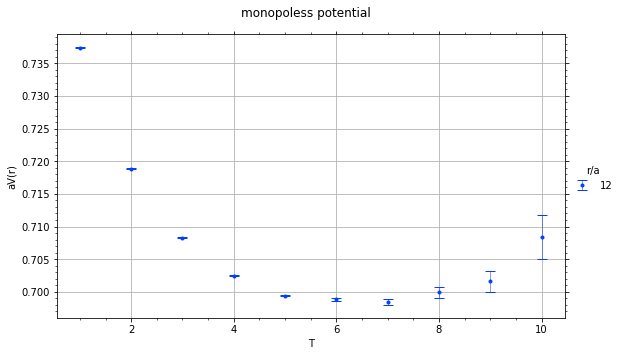

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=12


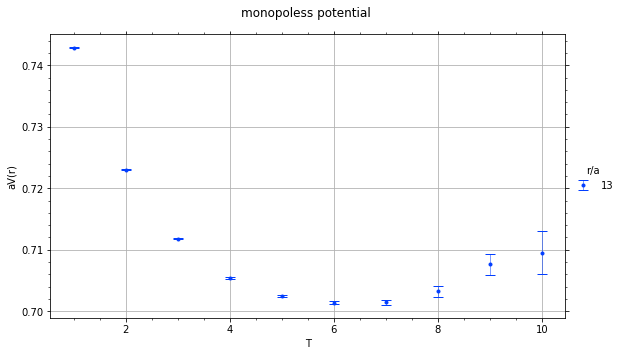

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=13


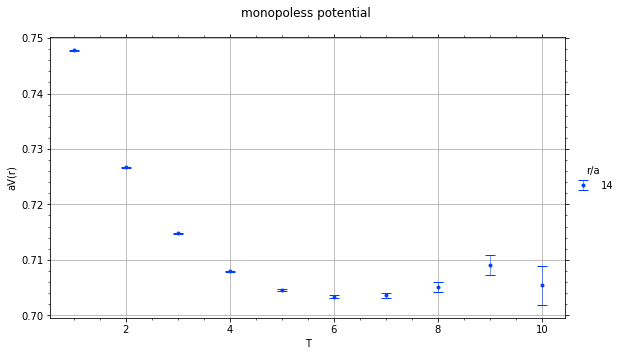

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=14


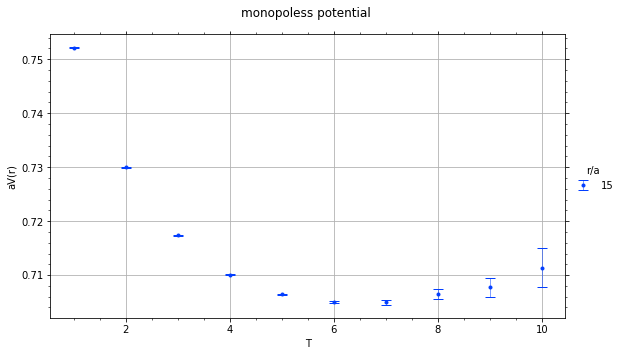

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=15


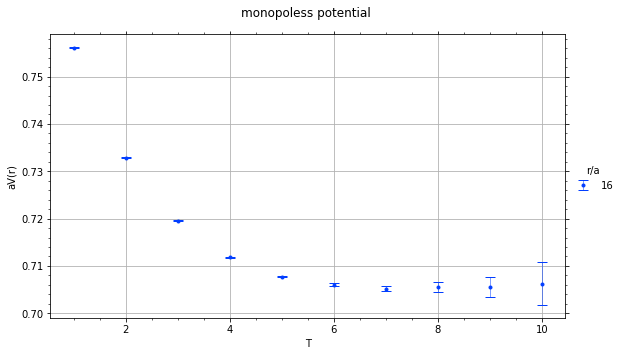

../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence/potential_monopoless_r=16


In [17]:
show_plot = True
coordinate = 'T'
hue = 'r/a'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopoless.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'monopole'}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/32^3x64/beta6.2/T_dependence'
image_name = f'potential_monopole_'
data = potential_data.get_potantial_df(paths)
for r in data['r/a'].unique():
    plots.make_plots_single(data[data['r/a'] == r], coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopoless potential', image_path, f'potential_monopoless_r={r}', show_plot, err='err')

    smearing_step   T  r/a     aV(r)       err projection      beta
0           420.0   1   18  0.173054  0.000328        new  beta=6.0
1           420.0   2   18  0.182883  0.000368        new  beta=6.0
2           420.0   3   18  0.186975  0.000402        new  beta=6.0
3           420.0   4   18  0.188997  0.000434        new  beta=6.0
4           420.0   5   18  0.190372  0.000473        new  beta=6.0
5           420.0   6   18  0.191536  0.000513        new  beta=6.0
6           420.0   7   18  0.192403  0.000559        new  beta=6.0
7           420.0   8   18  0.193748  0.000617        new  beta=6.0
8           420.0   9   18  0.195184  0.000681        new  beta=6.0
9           420.0  10   18  0.196321  0.000751        new  beta=6.0
10          420.0  11   18  0.197328  0.000837        new  beta=6.0
11          420.0  12   18  0.198146  0.000938        new  beta=6.0
12          420.0  13   18  0.199306  0.001069        new  beta=6.0
13          420.0  14   18  0.200267  0.001211  

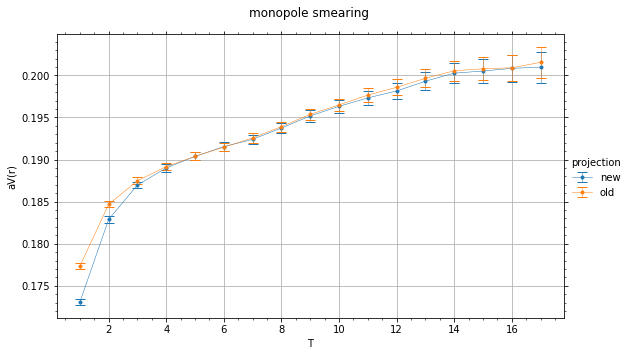

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0//potential_projection_


In [8]:
show_plot = True
coordinate = 'T'
hue = 'projection'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'projection': 'new', 'beta': 'beta=6.0'}, 'constraints': {'r/a': (18, 18), 'smearing_step': (420, 420)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'projection': 'old', 'beta': 'beta=6.0'}, 'constraints': {'r/a': (18, 18)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/'
image_name = f'potential_projection_'
data = potential_data.get_potantial_data(paths)
print(data)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

    smearing_step   T  r/a     aV(r)       err projection      beta
0           420.0  17    1  0.003979  0.000006        new  beta=6.0
1           420.0  17    2  0.010635  0.000018        new  beta=6.0
2           420.0  17    3  0.018610  0.000034        new  beta=6.0
3           420.0  17    4  0.027556  0.000054        new  beta=6.0
4           420.0  17    5  0.037284  0.000078        new  beta=6.0
5           420.0  17    6  0.047667  0.000108        new  beta=6.0
6           420.0  17    7  0.058614  0.000143        new  beta=6.0
7           420.0  17    8  0.070053  0.000187        new  beta=6.0
8           420.0  17    9  0.081926  0.000238        new  beta=6.0
9           420.0  17   10  0.094187  0.000301        new  beta=6.0
10          420.0  17   11  0.106789  0.000378        new  beta=6.0
11          420.0  17   12  0.119696  0.000472        new  beta=6.0
12          420.0  17   13  0.132872  0.000589        new  beta=6.0
13          420.0  17   14  0.146267  0.000735  

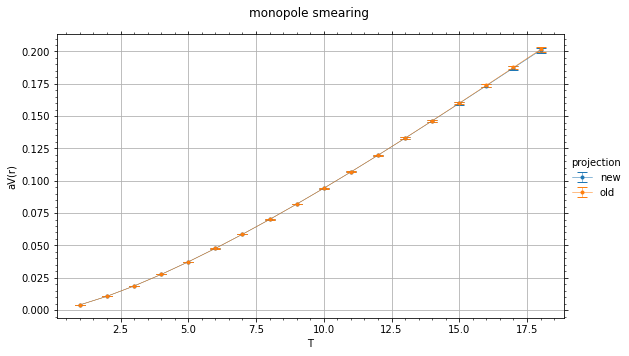

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0//potential_projection_


In [2]:
show_plot = True
coordinate = 'r/a'
hue = 'projection'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'projection': 'new', 'beta': 'beta=6.0'}, 'constraints': {'T': (17, 17), 'smearing_step': (420, 420)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'projection': 'old', 'beta': 'beta=6.0'}, 'constraints': {'T': (17, 17)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/'
image_name = f'potential_projection_'
data = potential_data.get_potantial_data(paths)
print(data)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

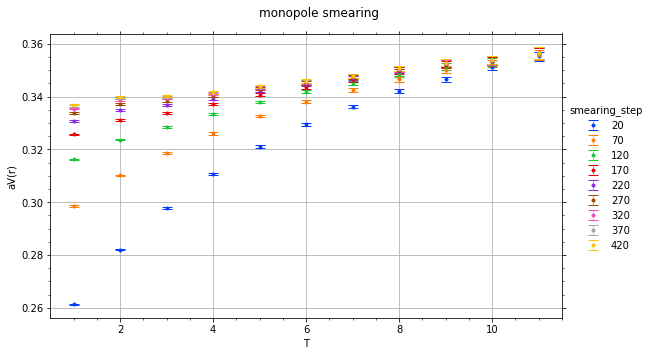

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0//potential_smearing_


In [2]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'monopole'}, 'constraints': {'r/a': (12, 12), 'T': (1, 12), 'smearing_step': (20, 420)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_df(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

In [3]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.25/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'monopole'}, 'constraints': {'r/a': (12, 12), 'T': (1, 12), 'smearing_step': (20, 820)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_df(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

FileNotFoundError: [Errno 2] No such file or directory: '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.25/steps_500/copies=4/potential_monopole.csv'

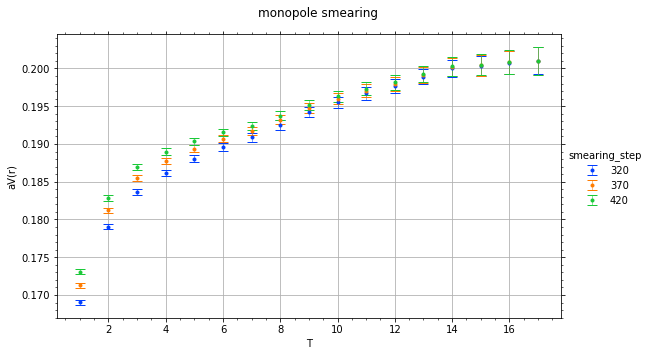

../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3//potential_smearing_


In [10]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.3', 'potential_type': 'monopole'}, 'constraints': {'r/a': (18, 18), 'T': (1, 18), 'smearing_step': (300, 420)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_df(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

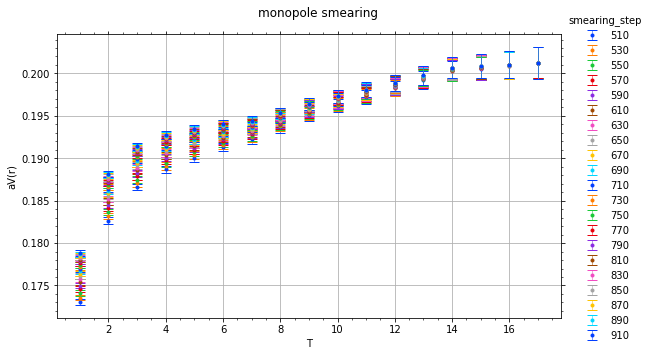

../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3//potential_smearing_


In [9]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.25/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.3', 'potential_type': 'monopole'}, 'constraints': {'r/a': (18, 18), 'T': (1, 18), 'smearing_step': (500, 920)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_df(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

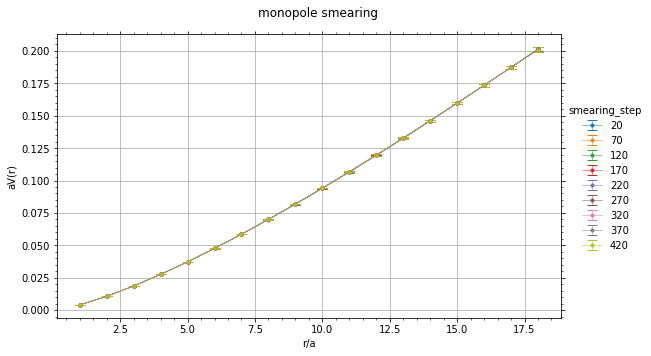

../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3//potential_smearing_


In [8]:
show_plot = True
coordinate = 'r/a'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.3'}, 'constraints': {'r/a': (1, 18), 'T': (17, 17), 'smearing_step': (20, 420)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, coordinate, 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

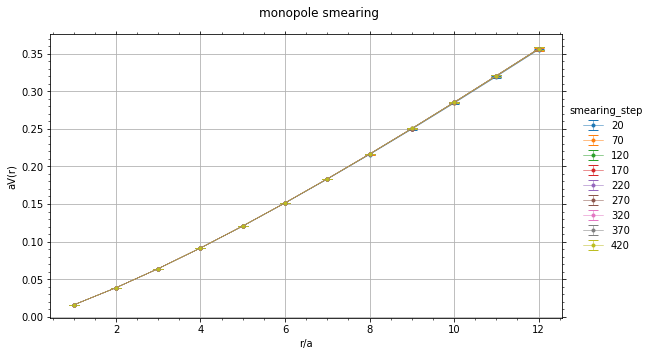

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0//potential_smearing_


In [7]:
show_plot = True
coordinate = 'r/a'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.0'}, 'constraints': {'r/a': (1, 12), 'T': (11, 11), 'smearing_step': (20, 420)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, coordinate, 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

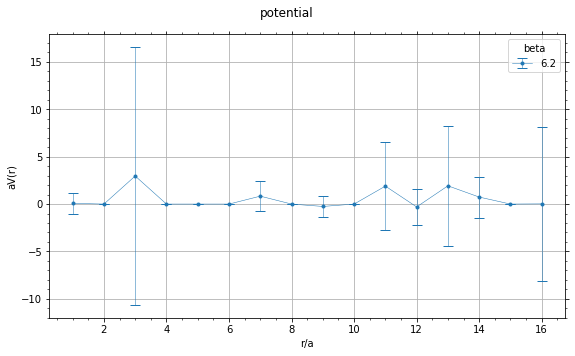

../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential


In [3]:
show_plot = True
coordinate = 'r/a'
hue = 'beta'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.2}, 'constraints': {'T': (4, 4)}}]
image_path = f'../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

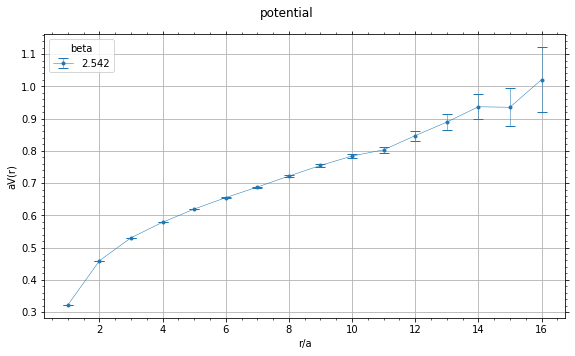

../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential


In [3]:
show_plot = True
coordinate = 'r/a'
hue = 'beta'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential_original.csv',
          'parameters': {'beta': 2.542}, 'constraints': {'T': (6, 6)}}]
image_path = f'../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

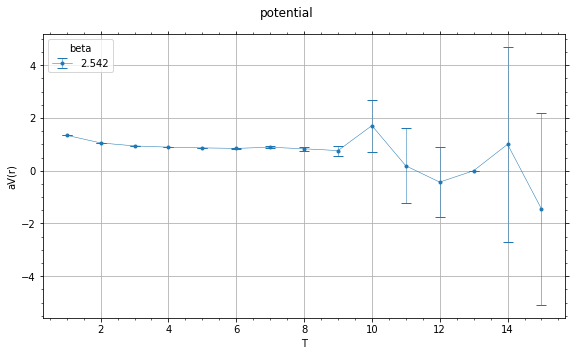

../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential


In [4]:
show_plot = True
coordinate = 'T'
hue = 'beta'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential_original.csv',
          'parameters': {'beta': 2.542}, 'constraints': {'r/a': (12, 12)}}]
image_path = f'../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

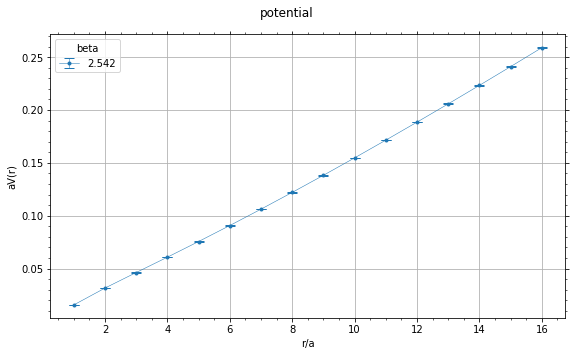

../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential


In [5]:
show_plot = True
coordinate = 'r/a'
hue = 'beta'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/T_step=0.001/potential_monopole.csv',
          'parameters': {'beta': 2.542}, 'constraints': {'T': (6, 6)}}]
image_path = f'../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

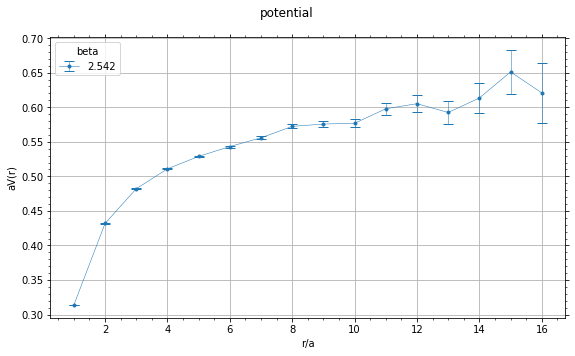

../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential


In [6]:
show_plot = True
coordinate = 'r/a'
hue = 'beta'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/T_step=0.001/potential_monopoless.csv',
          'parameters': {'beta': 2.542}, 'constraints': {'T': (8, 8)}}]
image_path = f'../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

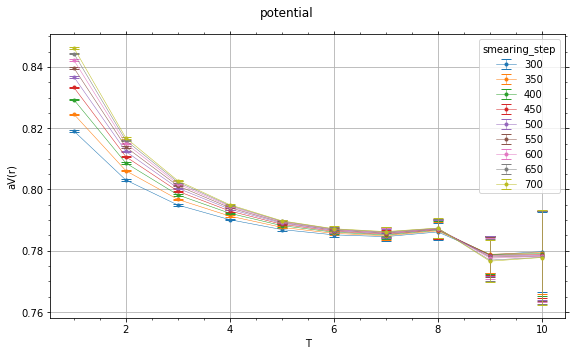

../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3//potential_smearing_


In [2]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.3'}, 'constraints': {'r/a': (10, 10), 'T': (1, 10), 'smearing_step': (300, 700)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

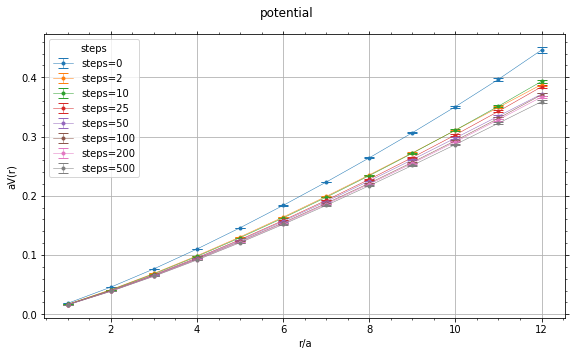

../../images/potential/test/su3/gluodynamics/36^4/beta6.3//potential_smearing_


In [21]:
show_plot = True
coordinate = 'r/a'
hue = 'steps'
groupby = []
t1 = 11
paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_0/copies=1/potential_abelian.csv',
          'parameters': {'steps': 'steps=0'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_2/copies=1/potential_abelian.csv',
          'parameters': {'steps': 'steps=2'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_10/copies=1/potential_abelian.csv',
          'parameters': {'steps': 'steps=10'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_25/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=25'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_50/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=50'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_100/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=100'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_200/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=200'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=500'}, 'constraints': {'T': (t1, t1)}}]
image_path = f'../../images/potential/test/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

In [22]:
show_plot = True
coordinate = 'r/a'
hue = 'steps'
groupby = []
t1 = 11
paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_25/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=25'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_50/copies=2/potential_abelian.csv',
          'parameters': {'steps': 'steps=50_2'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_50/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=50_4'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_100/copies=1/potential_abelian.csv',
          'parameters': {'steps': 'steps=100_1'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_100/copies=2/potential_abelian.csv',
          'parameters': {'steps': 'steps=100_2'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_100/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=100_4'}, 'constraints': {'T': (t1, t1)}}]
image_path = f'../../images/potential/test/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

FileNotFoundError: [Errno 2] No such file or directory: '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_50/copies=2/potential_abelian.csv'

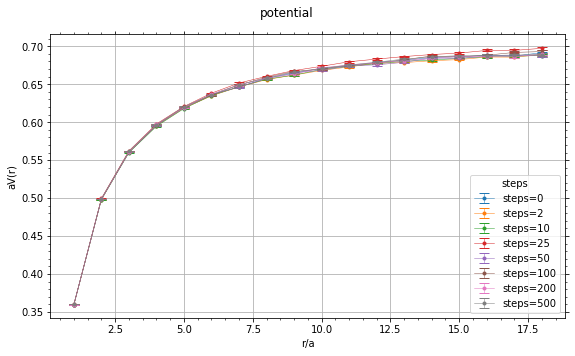

../../images/potential/test/su3/gluodynamics/36^4/beta6.3//potential_smearing_


In [7]:
show_plot = True
coordinate = 'r/a'
hue = 'steps'
groupby = []
t1 = 8
potential_name = 'monopoless'
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_0/copies=1/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=0'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_2/copies=1/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=2'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_10/copies=1/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=10'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_25/copies=4/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=25'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_50/copies=4/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=50'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_100/copies=4/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=100'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_200/copies=4/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=200'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=4/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=500'}, 'constraints': {'T': (t1, t1)}}]
image_path = f'../../images/potential/test/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)